In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

dv001.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023


In [2]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

Using backend: pytorch



True

In [3]:
%autoreload
#bioqic = mre_pinn.data.BIOQICPhantom('../data/BIOQIC/downloads')
#bioqic.download()
bioqic.load_mat()
bioqic.preprocess()
dataset = bioqic.to_dataset()
dataset.save_xarrays('../data/BIOQIC/phantom')

NameError: name 'bioqic' is not defined

In [4]:
%autoreload
frequency = 100
example = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/phantom', frequency, anat=True)
example.metadata

Loading ../data/BIOQIC/phantom/100/wave.nc
Loading ../data/BIOQIC/phantom/100/mre.nc
Loading ../data/BIOQIC/phantom/100/mre_mask.nc
Loading ../data/BIOQIC/phantom/100/anat.nc
Loading ../data/BIOQIC/phantom/100/anat_mask.nc


size  spacing  origin   limit   center  extent
variable dimension                                                
wave     x           128   0.0015     0.0  0.1905  0.09525  0.1920
         y            80   0.0015     0.0  0.1185  0.05925  0.1200
         z            25   0.0015     0.0  0.0360  0.01800  0.0375
mre      x           128   0.0015     0.0  0.1905  0.09525  0.1920
         y            80   0.0015     0.0  0.1185  0.05925  0.1200
         z            25   0.0015     0.0  0.0360  0.01800  0.0375
mre_mask x           128   0.0015     0.0  0.1905  0.09525  0.1920
         y            80   0.0015     0.0  0.1185  0.05925  0.1200
         z            25   0.0015     0.0  0.0360  0.01800  0.0375
anat     x           128   0.0015     0.0  0.1905  0.09525  0.1920
         y            80   0.0015     0.0  0.1185  0.05925  0.1200
         z            25   0.0015     0.0  0.0360  0.01800  0.0375

In [5]:
example.describe()

dtype     count                     mean  \
variable component                                                  
wave     z          complex128  256000.0  -0.00002200+0.00004200j   
         x          complex128  256000.0  -0.00002500-0.00013500j   
         y          complex128  256000.0  -0.00038400-0.00004200j   
mre      scalar     complex128  256000.0  5864.913119+219.578887j   
mre_mask scalar          int64  256000.0   0.63810500+0.00000000j   
anat     z             float64  256000.0   319.0439006+0.0000000j   
         x             float64  256000.0   317.5270004+0.0000000j   
         y             float64  256000.0   317.8602307+0.0000000j   

                            std                 min                 25%  \
variable component                                                        
wave     z             0.004030 -0.013373+0.001929j -0.002311-0.001211j   
         x             0.006145 -0.018721+0.005040j -0.002878+0.000209j   
         y             0.011884 -0.025961-0.006529j -0.005150-0.003336j   
mre      scalar     5603.317710  0.000000+0.000000j  0.000000+0.000000j   
mre_mask scalar        0.727037  0.000000+0.000000j  0.000000+0.000000j   
anat     z           233.646254  0.000000+0.000000j   56.87500+0.00000j   
         x           232.685416  0.000000+0.000000j   56.87500+0.00000j   
         y           232.751227  0.000000+0.000000j   56.87500+0.00000j   

                                         50%                       75%  \
variable component                                                       
wave     z         -0.000003000-0.000731000j  0.002253000-0.002613000j   
         x         -0.000031000-0.001884000j  0.002865000+0.001573000j   
         y         -0.000196000+0.000910000j  0.004307000-0.000360000j   
mre      scalar     10148.713706+360.430730j  10148.713706+360.430730j   
mre_mask scalar     1.000000000+0.000000000j  1.000000000+0.000000000j   
anat     z          465.37000005+0.00000000j  529.37000005+0.00000000j   
         x          463.00000005+0.00000000j  526.37000005+0.00000000j   
         y          463.70000005+0.00000000j  527.70000005+0.00000000j   

                                          max  
variable component                             
wave     z           0.012900000-0.000001000j  
         x           0.018176000-0.006488000j  
         y           0.027633000+0.001393000j  
mre      scalar     35546.805453+2572.971812j  
mre_mask scalar      5.000000000+0.000000000j  
anat     z          2545.87000005+0.00000000j  
         x          2668.87000005+0.00000000j  
         y          2480.12000005+0.00000000j

Evaluating direct baseline


<IPython.core.display.Javascript object>


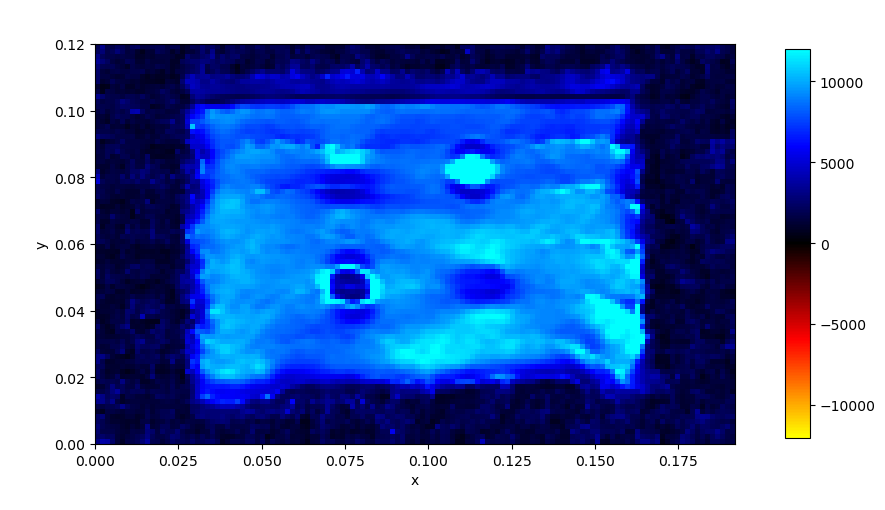

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

In [33]:
%autoreload
mre_pinn.baseline.eval_ahi_baseline(example, frequency)
example.view('direct', polar=True)

Evaluating direct baseline
Evaluating FEM baseline
100%|██████████| 25/25 [01:31<00:00,  3.66s/it]


<IPython.core.display.Javascript object>


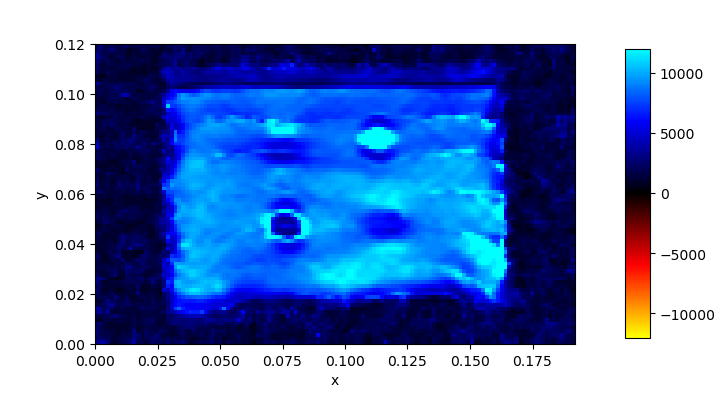

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

<IPython.core.display.Javascript object>


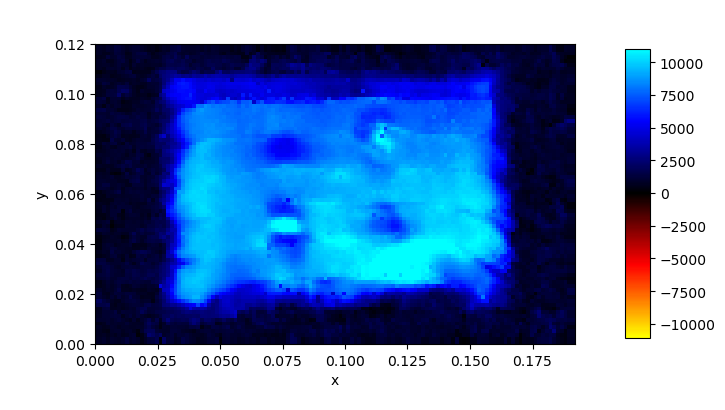

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

In [9]:
%autoreload

mre_pinn.baseline.eval_fem_baseline(example, frequency)
example.view('direct', 'fem', polar=True, ax_height=3)

<IPython.core.display.Javascript object>


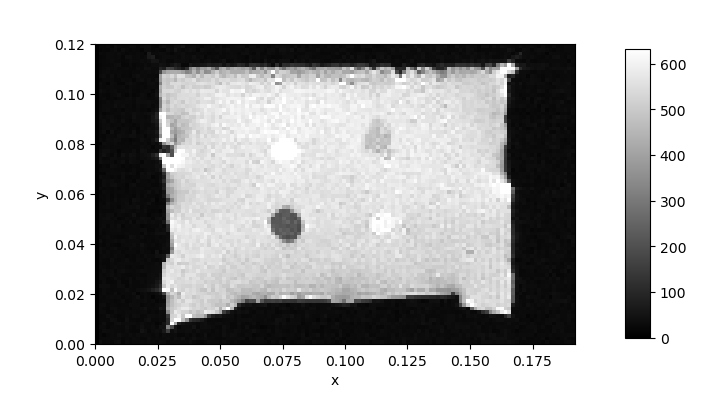

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


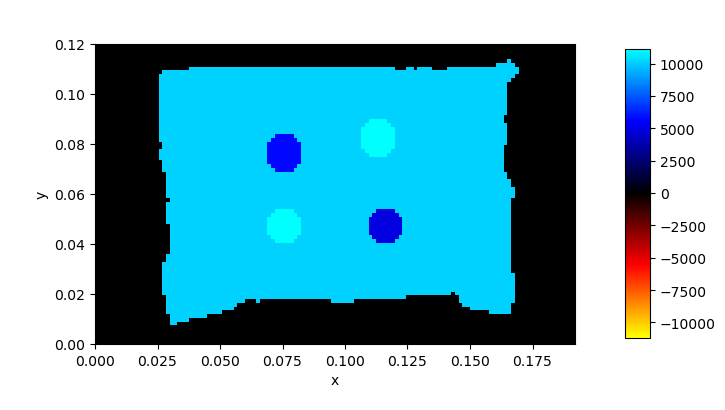

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

In [7]:
%autoreload
example.view('anat', 'mre', ax_height=3, mask=0.5)

In [34]:
pde = mre_pinn.pde.WaveEquation.from_name('hetero', omega=example.wave.frequency.item(), detach=True)

In [36]:
%autoreload
pinn = mre_pinn.model.MREPINN(
    example,
    omega=60,
    n_layers=5,
    n_hidden=128,
    activ_fn='st',
    polar_input=False
)
pinn

MREPINN(
  (u_pinn): PINN(
    (hidden0): Linear(in_features=3, out_features=128, bias=True)
    (hidden1): Linear(in_features=131, out_features=128, bias=True)
    (hidden2): Linear(in_features=259, out_features=128, bias=True)
    (hidden3): Linear(in_features=387, out_features=128, bias=True)
    (output): Linear(in_features=515, out_features=6, bias=True)
  )
  (mu_pinn): PINN(
    (hidden0): Linear(in_features=3, out_features=128, bias=True)
    (hidden1): Linear(in_features=131, out_features=128, bias=True)
    (hidden2): Linear(in_features=259, out_features=128, bias=True)
    (hidden3): Linear(in_features=387, out_features=128, bias=True)
    (output): Linear(in_features=515, out_features=8, bias=True)
  )
)

In [37]:
%autoreload
model = mre_pinn.training.MREPINNModel(
    example, pinn, pde,
    loss_weights=[1, 0, 0, 1e-10],
    pde_warmup_iters=5000,
    pde_step_iters=5000,
    pde_init_weight=1e-12,
    n_points=1024
)
model.compile(optimizer='adam', lr=1e-4, loss=mre_pinn.training.losses.msae_loss)

Compiling model...
'compile' took 0.000211 s



In [38]:
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False
model.benchmark(100)

# iterations: 100
Data time/iter:  0.0212s (17.80%)
Model time/iter: 0.0185s (15.60%)
Loss time/iter:  0.0791s (66.59%)
Total time/iter: 0.1188s
Total time: 11.8795s
1k iters time: 1.98m
10k iters time: 19.80m
100k iters time: 3.30h


<IPython.core.display.Javascript object>


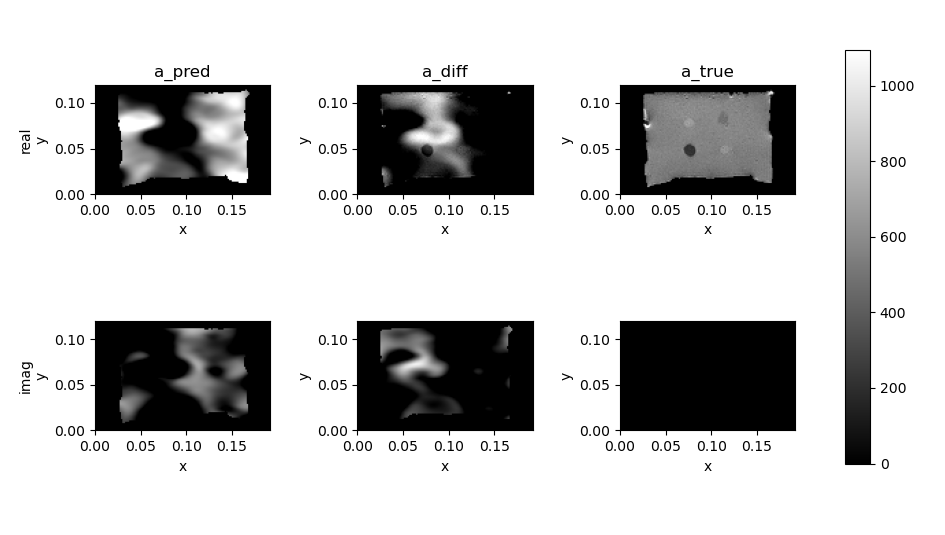

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


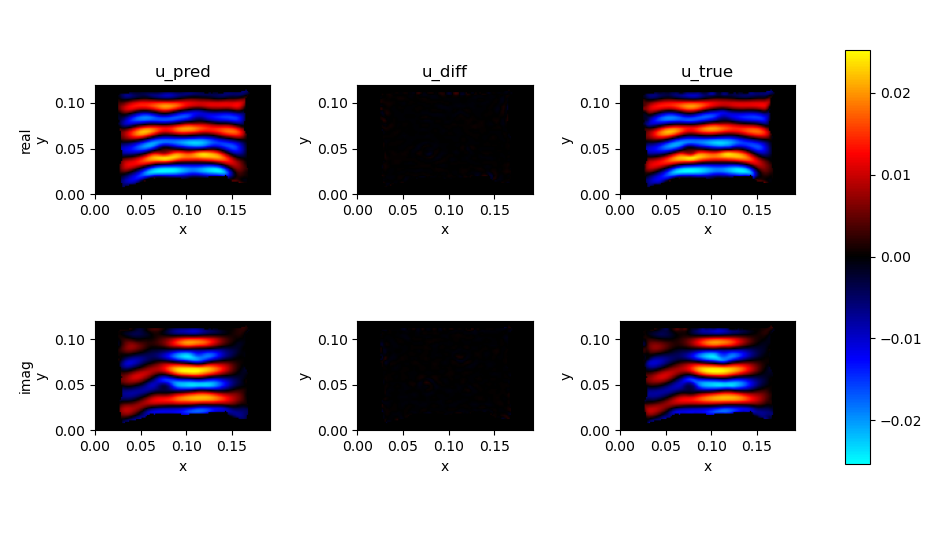

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


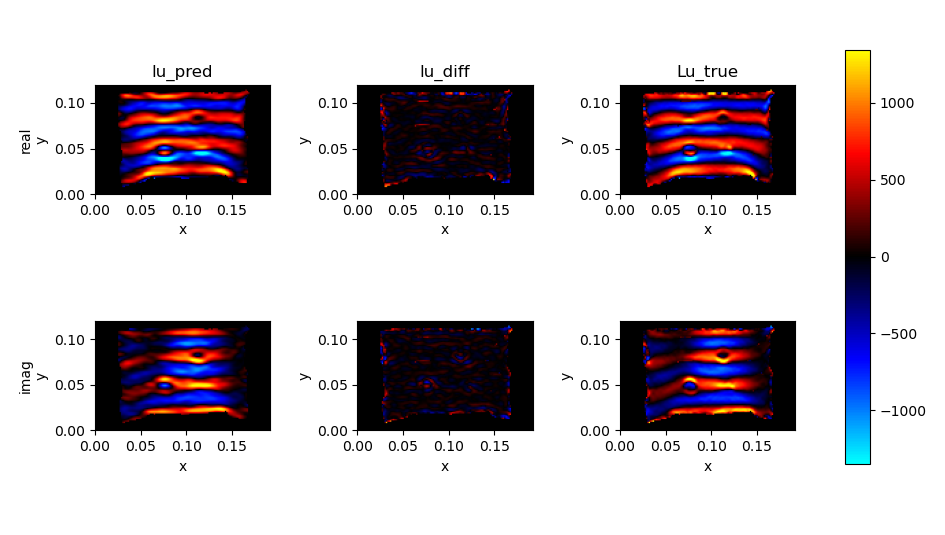

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


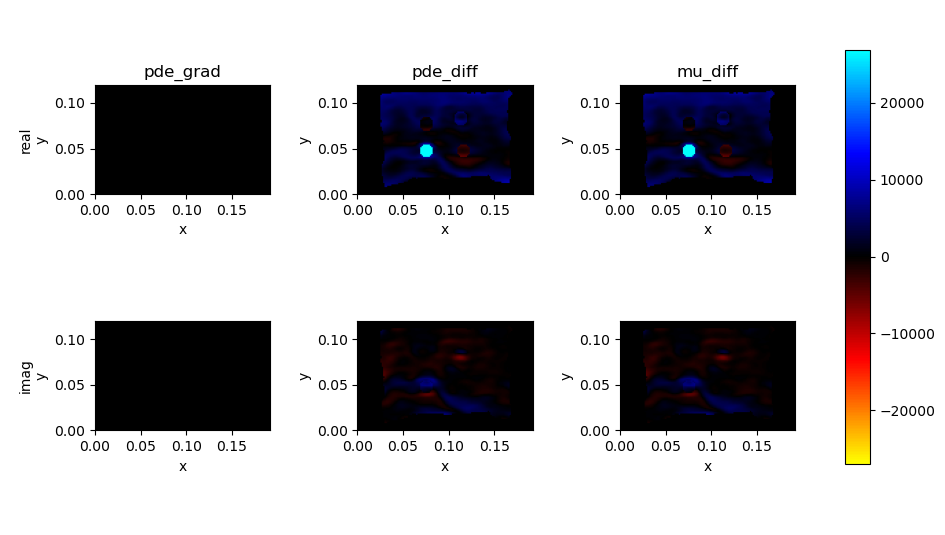

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


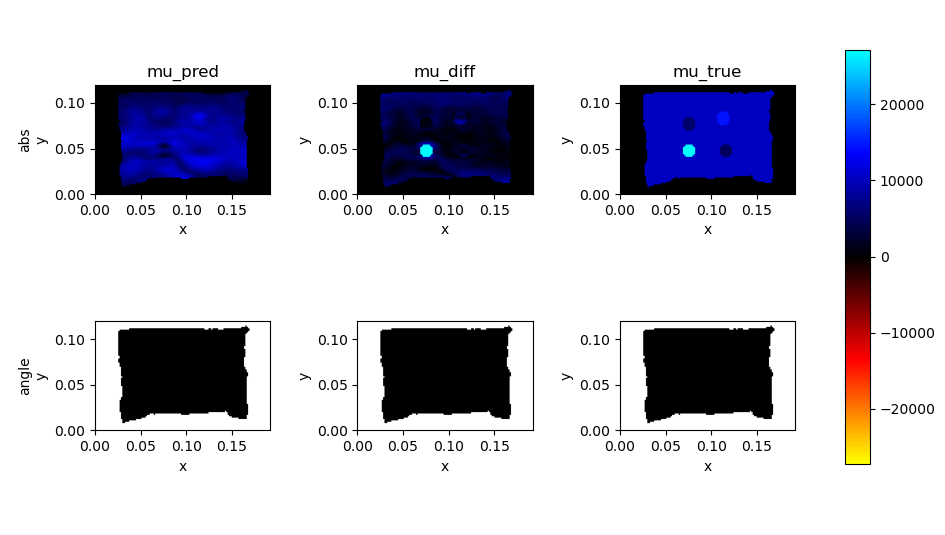

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


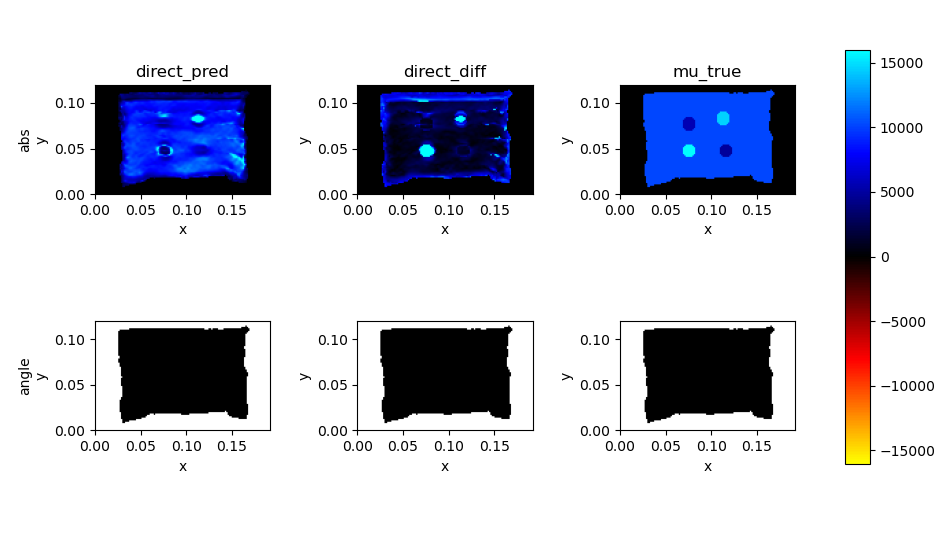

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


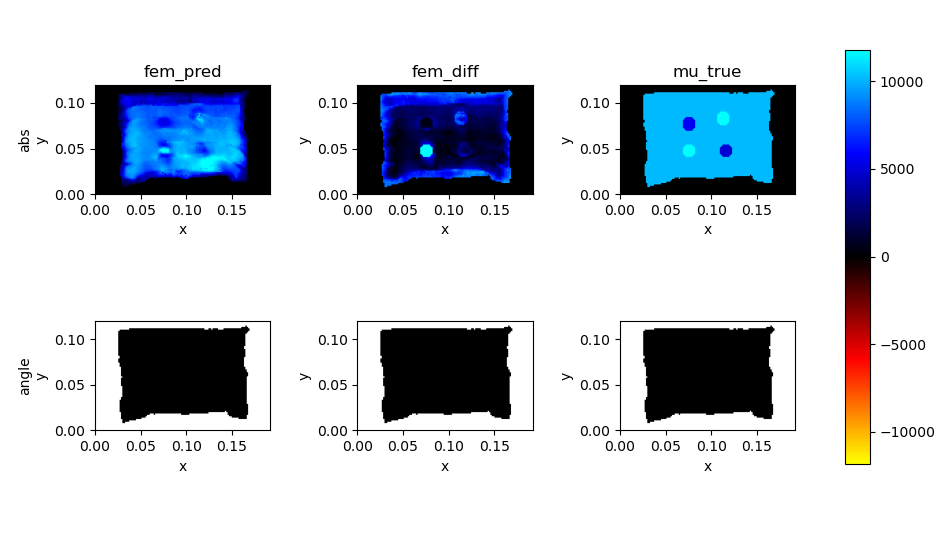

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

In [41]:
%autoreload
test_eval = mre_pinn.testing.TestEvaluator(test_every=100, interact=True)
test_eval.model = model
test_eval.test()

Training model...

1676      [2.23e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.16e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1680      [2.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.15e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1690      [2.16e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1700      [2.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.12e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  


<IPython.core.display.Javascript object>


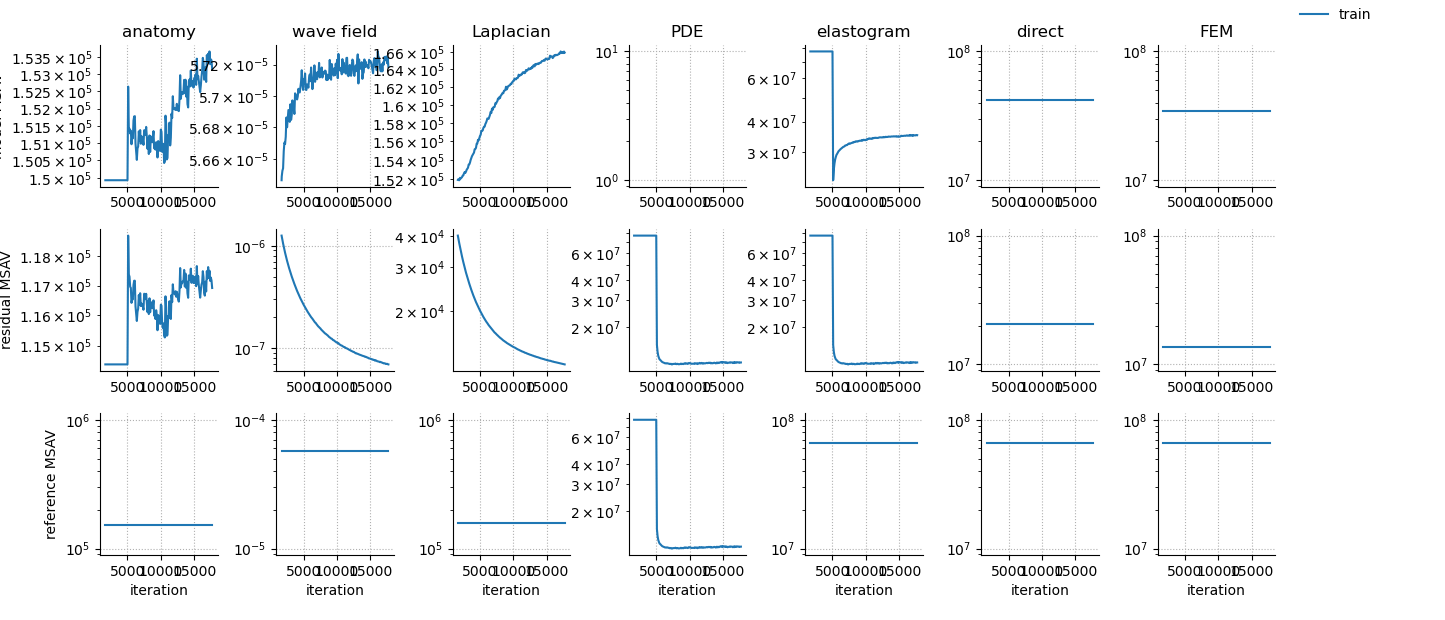

  ax.set_yscale(yscale)



<IPython.core.display.Javascript object>


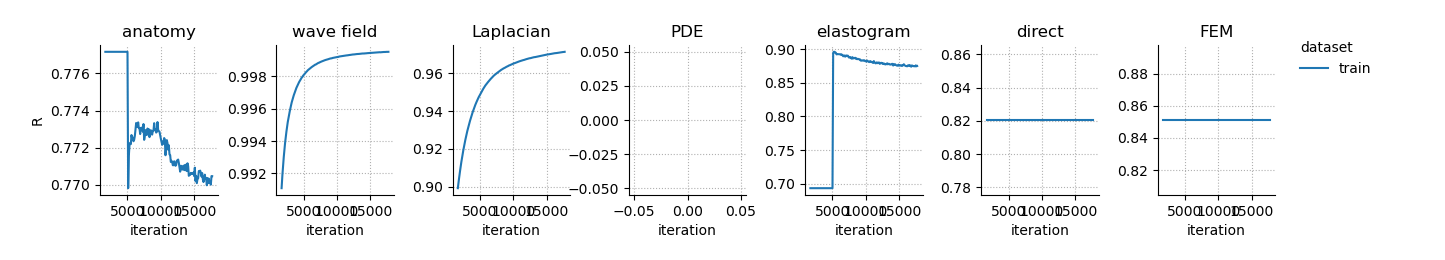

<IPython.core.display.Javascript object>


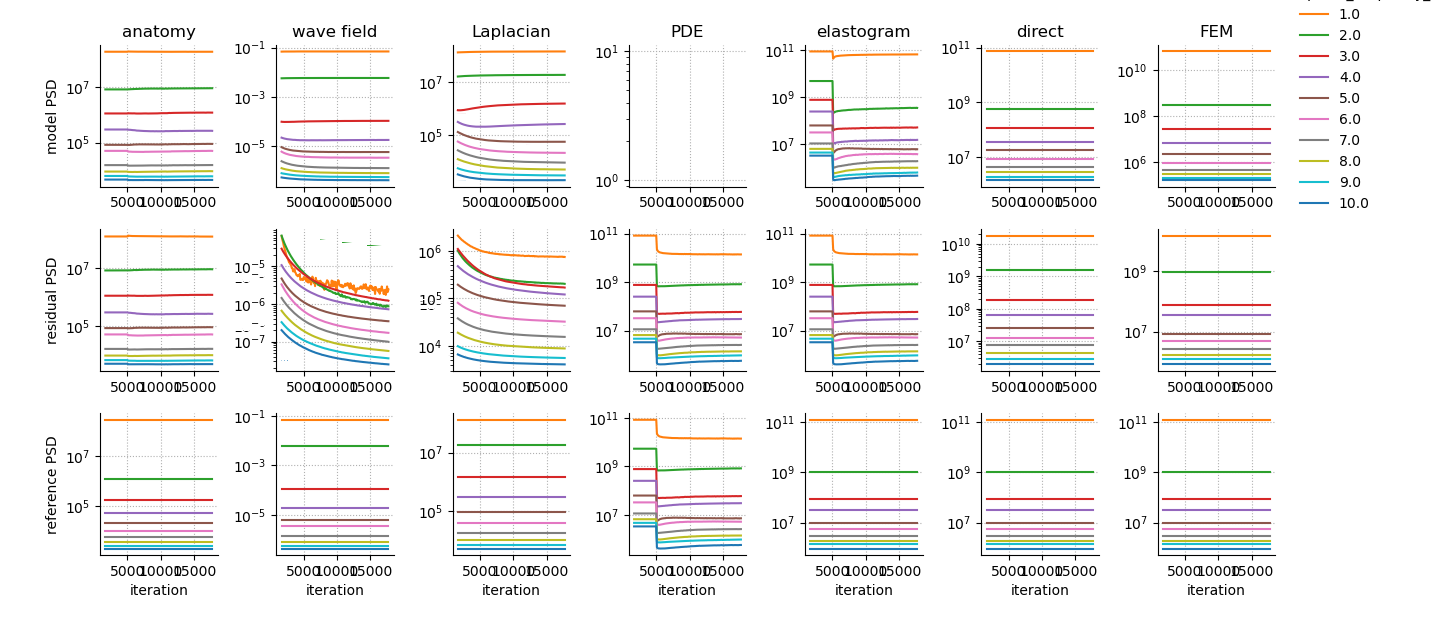

  ax.set_yscale(yscale)



<IPython.core.display.Javascript object>


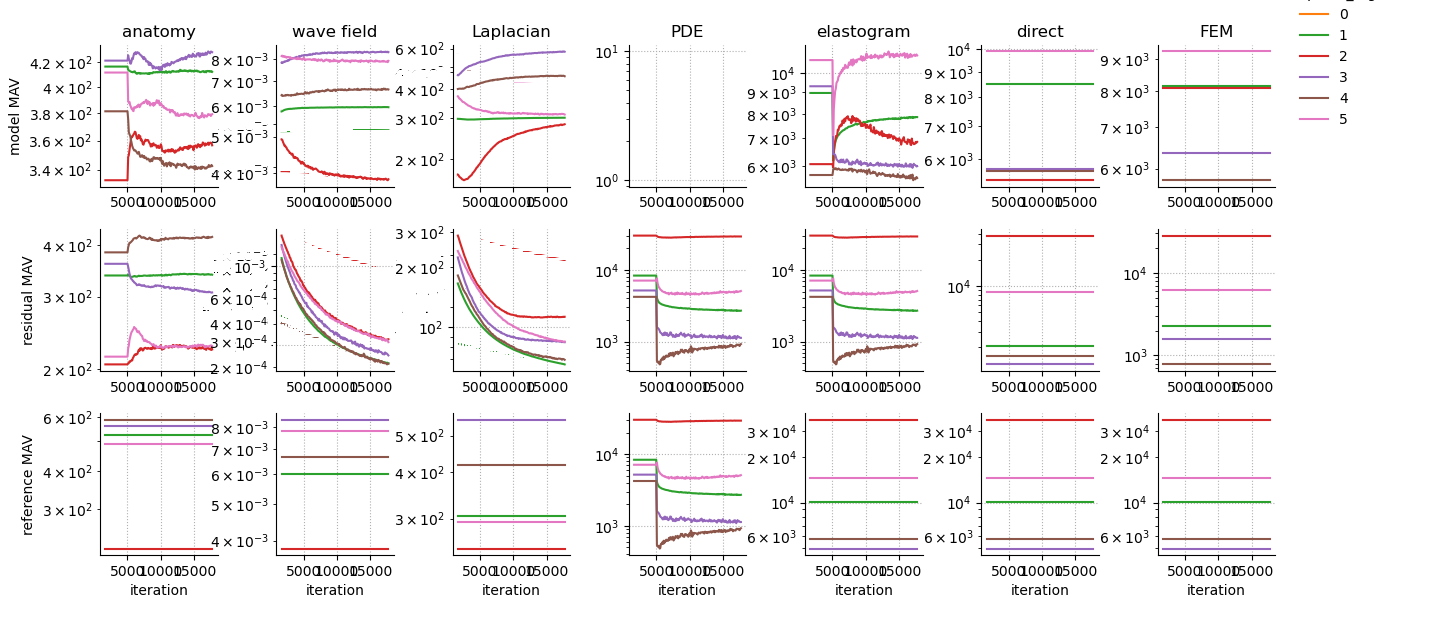

  ax.set_yscale(yscale)



Time spent testing: 57.9200 (36.14%)
1710      [2.21e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.11e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1720      [2.22e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.10e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1730      [2.16e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.07e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1740      [2.08e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.06e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1750      [1.94e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1760      [1.93e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.03e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1770      [2.08e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.01e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1780      [2.00e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [2.00e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1790      [2.07e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.98e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1800      [1.99e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.7602 (50.70%)
1810      [1.98e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.95e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1820      [1.96e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.94e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1830      [1.84e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.92e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1840      [1.92e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.90e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1850      [2.05e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.89e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1860      [1.98e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.87e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1870      [1.91e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.86e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1880      [1.97e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.85e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1890      [1.89e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.84e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1900      [1.86e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.1697 (58.86%)
1910      [1.81e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.80e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1920      [1.79e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.80e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1930      [1.85e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.79e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1940      [1.83e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.76e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1950      [1.72e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.75e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1960      [1.74e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.74e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1970      [1.69e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.73e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1980      [1.79e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.72e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1990      [1.75e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.71e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2000      [1.75e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.8073 (63.83%)
2010      [1.73e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.68e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2020      [1.70e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.69e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2030      [1.68e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.67e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2040      [1.67e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.65e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2050      [1.71e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.64e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2060      [1.63e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.63e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2070      [1.69e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.61e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2080      [1.63e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.60e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2090      [1.62e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.59e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2100      [1.55e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.1481 (67.44%)
2110      [1.61e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.57e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2120      [1.57e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.57e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2130      [1.54e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.56e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2140      [1.64e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.54e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2150      [1.60e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.53e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2160      [1.57e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.52e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2170      [1.53e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.51e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2180      [1.52e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.50e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2190      [1.49e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.50e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2200      [1.51e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.1809 (70.05%)
2210      [1.58e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.47e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2220      [1.46e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.47e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2230      [1.48e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.45e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2240      [1.48e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.45e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2250      [1.46e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.44e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2260      [1.47e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.43e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2270      [1.48e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.42e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2280      [1.40e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.41e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2290      [1.41e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.40e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2300      [1.38e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.6761 (73.80%)
2410      [1.31e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.30e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2420      [1.34e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.29e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2430      [1.34e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.28e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2440      [1.29e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.28e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2450      [1.24e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.27e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2460      [1.23e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.26e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2470      [1.25e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.26e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2480      [1.29e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.25e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2490      [1.25e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.25e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2500      [1.26e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.9560 (75.13%)
2510      [1.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.23e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2520      [1.25e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.22e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2530      [1.23e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.21e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2540      [1.20e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.20e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2550      [1.15e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.20e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2560      [1.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.19e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2570      [1.25e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.19e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2580      [1.19e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2590      [1.15e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.18e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2600      [1.22e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.9189 (76.25%)
2610      [1.15e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.17e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2620      [1.12e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.16e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2630      [1.21e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.15e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2640      [1.13e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.15e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2650      [1.21e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2660      [1.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2670      [1.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2680      [1.10e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.12e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2690      [1.16e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.11e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2700      [1.15e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.0323 (77.13%)
2710      [1.11e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.10e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2720      [1.14e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.09e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2730      [1.03e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.08e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2740      [1.07e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.08e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2750      [1.06e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.08e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2760      [1.09e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.08e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2770      [1.10e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.07e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2780      [1.01e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.06e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2790      [1.06e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.06e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2800      [1.07e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.1341 (77.92%)
2810      [1.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2820      [1.07e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2830      [1.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2840      [1.10e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2850      [1.08e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.03e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2860      [1.06e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.02e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2870      [1.00e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.02e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2880      [1.02e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.01e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2890      [9.99e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [1.01e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2900      [1.03e-06, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.0258 (78.64%)
2910      [1.01e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [1.00e-06, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2920      [1.01e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [9.90e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2930      [9.83e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.84e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2940      [9.51e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.83e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2950      [1.01e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [9.83e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2960      [1.04e-06, 0.00e+00, 0.00e+00, 0.00e+00]    [9.79e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2970      [9.34e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.77e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2980      [9.55e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.72e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2990      [9.93e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.67e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3000      [9.89e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.3808 (79.23%)
3010      [9.11e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.54e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3020      [9.41e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.42e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3030      [9.85e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.36e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3040      [9.76e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.34e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3050      [9.44e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.32e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3060      [9.79e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.31e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3070      [9.56e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.22e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3080      [9.16e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.18e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3090      [9.30e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.15e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3100      [8.55e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.0269 (79.76%)
3110      [9.55e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.09e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3120      [9.23e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [9.00e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3130      [9.69e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.96e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3140      [9.06e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.93e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3150      [9.22e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.92e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3160      [8.66e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.93e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3170      [8.87e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.82e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3180      [8.82e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.78e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3190      [8.45e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.82e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3200      [8.58e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.3392 (80.07%)
3210      [8.60e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.69e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3220      [8.61e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.73e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3230      [9.06e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.64e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3240      [8.28e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.59e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3250      [8.23e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.59e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3260      [8.73e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.51e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3270      [8.25e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.45e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3280      [8.61e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.38e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3290      [7.90e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.32e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3300      [8.16e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.6187 (80.49%)
3310      [8.58e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.34e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3320      [8.47e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.29e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3330      [7.79e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.28e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3340      [8.40e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.20e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3350      [8.60e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.18e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3360      [7.80e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.12e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3370      [7.97e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.10e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3380      [8.38e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.10e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3390      [8.26e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.07e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3400      [8.82e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.7882 (80.70%)
3410      [8.33e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.99e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3420      [8.29e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [8.01e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3430      [7.78e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.92e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3440      [8.69e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.85e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3450      [8.07e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.83e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3460      [8.00e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.81e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3470      [7.82e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.78e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3480      [7.89e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.73e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3490      [7.57e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.69e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3500      [7.71e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.6638 (81.07%)
3510      [7.85e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.70e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3520      [7.71e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.63e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3530      [7.59e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.60e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3540      [7.33e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.61e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3550      [8.18e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.62e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3560      [7.15e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.55e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3570      [7.34e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.50e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3580      [7.30e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.44e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3590      [7.37e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.47e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3600      [7.89e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.3069 (81.39%)
3610      [7.34e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.39e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3620      [6.77e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.40e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3630      [7.28e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.38e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3640      [7.27e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.29e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3650      [6.71e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.28e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3660      [7.13e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.18e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3670      [6.78e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.15e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3680      [6.87e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.15e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3690      [7.31e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.12e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3700      [7.30e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.1432 (81.70%)
3710      [7.25e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.10e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3720      [6.74e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.09e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3730      [7.32e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [7.00e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3740      [7.00e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.99e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3750      [7.50e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.90e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3760      [7.03e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.90e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3770      [7.23e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.84e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3780      [7.07e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.79e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3790      [7.12e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.79e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3800      [7.51e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.5926 (81.99%)
3810      [7.28e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.80e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3820      [6.68e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.71e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3830      [7.03e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.78e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3840      [6.74e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.76e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3850      [7.14e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.75e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3860      [6.47e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.72e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3870      [6.82e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.68e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3880      [6.33e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.60e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3890      [6.59e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.58e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3900      [6.39e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.7252 (82.25%)
3910      [6.67e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.54e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3920      [6.63e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.47e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3930      [7.09e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.49e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3940      [6.35e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.47e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3950      [6.00e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.43e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3960      [6.37e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.42e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3970      [6.22e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.43e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3980      [6.64e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.40e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3990      [6.34e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.36e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4000      [6.54e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.7422 (82.47%)
4010      [6.47e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.32e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4020      [7.20e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.31e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4030      [6.28e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.23e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4040      [6.02e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.23e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4050      [6.47e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.20e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4060      [6.28e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.17e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4070      [6.47e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.18e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4080      [6.36e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.17e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4090      [6.24e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.15e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4100      [6.21e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.1984 (82.70%)
4110      [6.07e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.09e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4120      [6.32e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.10e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4130      [6.27e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.10e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4140      [5.99e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.09e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4150      [6.27e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.07e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4160      [6.07e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.05e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4170      [6.42e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [6.02e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4180      [5.90e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.97e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4190      [5.94e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.96e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4200      [5.92e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.3817 (82.89%)
4210      [5.87e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.97e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4220      [5.75e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.94e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4230      [6.23e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.87e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4240      [5.75e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.88e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4250      [6.48e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.85e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4260      [5.82e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.82e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4270      [5.85e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.77e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4280      [5.37e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.85e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4290      [5.54e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.80e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4300      [6.15e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.9090 (83.10%)
4310      [5.50e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.73e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4320      [5.58e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.74e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4330      [5.41e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.67e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4340      [5.51e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.69e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4350      [5.54e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.68e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4360      [5.63e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.66e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4370      [5.30e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.61e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4380      [5.28e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.59e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4390      [5.26e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.56e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4400      [5.46e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.9295 (83.27%)
4410      [5.43e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.58e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4420      [5.28e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.54e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4430      [5.21e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.52e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4440      [5.54e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.48e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4450      [5.43e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.44e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4460      [5.69e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.41e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4470      [5.43e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.43e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4480      [5.71e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.38e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4490      [5.39e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.39e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4500      [5.60e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.1432 (83.42%)
4510      [5.53e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.37e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4520      [5.28e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.34e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4530      [5.44e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.32e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4540      [5.76e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.32e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4550      [5.17e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.31e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4560      [5.12e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.31e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4570      [5.25e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.31e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4580      [5.30e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.31e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4590      [5.18e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.28e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4600      [5.49e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.2903 (83.41%)
4610      [5.28e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.23e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4620      [4.86e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.27e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4630      [5.30e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.22e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4640      [5.09e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.21e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4650      [4.74e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.19e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4660      [5.38e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.16e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4670      [4.93e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.11e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4680      [5.02e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.10e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4690      [5.14e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.07e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4700      [5.11e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.4454 (83.56%)
4710      [4.67e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.07e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4720      [4.88e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.06e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4730      [5.05e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.07e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4740      [5.17e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.06e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4750      [5.41e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.01e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4760      [4.67e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.92e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4770      [4.94e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.93e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4780      [4.77e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [5.00e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4790      [4.89e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.95e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4800      [4.83e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.4981 (83.71%)
4810      [4.47e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.97e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4820      [4.88e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.95e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4830      [4.91e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.92e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4840      [4.56e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.88e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4850      [5.15e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.89e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4860      [4.99e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.88e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4870      [4.71e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.86e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4880      [4.55e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.89e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4890      [4.88e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.86e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4900      [4.99e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.3789 (83.83%)
4910      [4.91e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.82e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4920      [4.66e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.82e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4930      [4.68e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.78e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4940      [4.57e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.76e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4950      [4.92e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.77e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4960      [4.46e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.72e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4970      [4.54e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.72e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4980      [4.64e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.69e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4990      [4.57e-07, 0.00e+00, 0.00e+00, 0.00e+00]    [4.72e-07, 0.00e+00, 0.00e+00, 0.00e+00]    []  
5000      [4.42e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.6905 (83.98%)
5010      [4.49e-07, 0.00e+00, 0.00e+00, 7.13e+00]    [4.67e-07, 0.00e+00, 0.00e+00, 8.08e+00]    []  
5020      [4.59e-07, 0.00e+00, 0.00e+00, 3.69e+00]    [4.66e-07, 0.00e+00, 0.00e+00, 3.68e+00]    []  
5030      [4.42e-07, 0.00e+00, 0.00e+00, 2.99e+00]    [4.61e-07, 0.00e+00, 0.00e+00, 3.22e+00]    []  
5040      [4.55e-07, 0.00e+00, 0.00e+00, 2.67e+00]    [4.66e-07, 0.00e+00, 0.00e+00, 2.84e+00]    []  
5050      [4.22e-07, 0.00e+00, 0.00e+00, 2.51e+00]    [4.60e-07, 0.00e+00, 0.00e+00, 2.63e+00]    []  
5060      [4.20e-07, 0.00e+00, 0.00e+00, 2.40e+00]    [4.57e-07, 0.00e+00, 0.00e+00, 2.55e+00]    []  
5070      [4.71e-07, 0.00e+00, 0.00e+00, 2.18e+00]    [4.58e-07, 0.00e+00, 0.00e+00, 2.45e+00]    []  
5080      [4.33e-07, 0.00e+00, 0.00e+00, 2.14e+00]    [4.57e-07, 0.00e+00, 0.00e+00, 2.37e+00]    []  
5090      [4.73e-07, 0.00e+00, 0.00e+00, 2.14e+00]    [4.54e-07, 0.00e+00, 0.00e+00, 2.31e+00]    []  
5100      [4.50e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.6149 (84.07%)
5110      [4.64e-07, 0.00e+00, 0.00e+00, 1.94e+00]    [4.53e-07, 0.00e+00, 0.00e+00, 2.24e+00]    []  
5120      [4.33e-07, 0.00e+00, 0.00e+00, 2.02e+00]    [4.54e-07, 0.00e+00, 0.00e+00, 2.19e+00]    []  
5130      [4.79e-07, 0.00e+00, 0.00e+00, 2.14e+00]    [4.49e-07, 0.00e+00, 0.00e+00, 2.14e+00]    []  
5140      [4.54e-07, 0.00e+00, 0.00e+00, 1.94e+00]    [4.51e-07, 0.00e+00, 0.00e+00, 2.11e+00]    []  
5150      [4.53e-07, 0.00e+00, 0.00e+00, 1.97e+00]    [4.47e-07, 0.00e+00, 0.00e+00, 2.09e+00]    []  
5160      [4.84e-07, 0.00e+00, 0.00e+00, 1.87e+00]    [4.50e-07, 0.00e+00, 0.00e+00, 2.06e+00]    []  
5170      [4.49e-07, 0.00e+00, 0.00e+00, 1.83e+00]    [4.50e-07, 0.00e+00, 0.00e+00, 2.04e+00]    []  
5180      [4.46e-07, 0.00e+00, 0.00e+00, 1.81e+00]    [4.46e-07, 0.00e+00, 0.00e+00, 2.00e+00]    []  
5190      [4.48e-07, 0.00e+00, 0.00e+00, 1.77e+00]    [4.47e-07, 0.00e+00, 0.00e+00, 1.98e+00]    []  
5200      [4.10e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.6129 (84.20%)
5210      [4.44e-07, 0.00e+00, 0.00e+00, 1.84e+00]    [4.44e-07, 0.00e+00, 0.00e+00, 1.95e+00]    []  
5220      [4.55e-07, 0.00e+00, 0.00e+00, 1.71e+00]    [4.41e-07, 0.00e+00, 0.00e+00, 1.92e+00]    []  
5230      [4.31e-07, 0.00e+00, 0.00e+00, 1.60e+00]    [4.42e-07, 0.00e+00, 0.00e+00, 1.91e+00]    []  
5240      [4.43e-07, 0.00e+00, 0.00e+00, 1.79e+00]    [4.38e-07, 0.00e+00, 0.00e+00, 1.90e+00]    []  
5250      [4.19e-07, 0.00e+00, 0.00e+00, 1.86e+00]    [4.41e-07, 0.00e+00, 0.00e+00, 1.87e+00]    []  
5260      [4.70e-07, 0.00e+00, 0.00e+00, 1.79e+00]    [4.35e-07, 0.00e+00, 0.00e+00, 1.86e+00]    []  
5270      [4.33e-07, 0.00e+00, 0.00e+00, 1.70e+00]    [4.37e-07, 0.00e+00, 0.00e+00, 1.84e+00]    []  
5280      [4.56e-07, 0.00e+00, 0.00e+00, 1.75e+00]    [4.35e-07, 0.00e+00, 0.00e+00, 1.83e+00]    []  
5290      [4.32e-07, 0.00e+00, 0.00e+00, 1.59e+00]    [4.35e-07, 0.00e+00, 0.00e+00, 1.82e+00]    []  
5300      [4.39e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.0441 (84.28%)
5310      [4.19e-07, 0.00e+00, 0.00e+00, 1.64e+00]    [4.33e-07, 0.00e+00, 0.00e+00, 1.80e+00]    []  
5320      [4.04e-07, 0.00e+00, 0.00e+00, 1.57e+00]    [4.37e-07, 0.00e+00, 0.00e+00, 1.79e+00]    []  
5330      [4.04e-07, 0.00e+00, 0.00e+00, 1.55e+00]    [4.31e-07, 0.00e+00, 0.00e+00, 1.77e+00]    []  
5340      [4.24e-07, 0.00e+00, 0.00e+00, 1.64e+00]    [4.28e-07, 0.00e+00, 0.00e+00, 1.76e+00]    []  
5350      [3.95e-07, 0.00e+00, 0.00e+00, 1.52e+00]    [4.27e-07, 0.00e+00, 0.00e+00, 1.75e+00]    []  
5360      [4.39e-07, 0.00e+00, 0.00e+00, 1.67e+00]    [4.25e-07, 0.00e+00, 0.00e+00, 1.74e+00]    []  
5370      [4.01e-07, 0.00e+00, 0.00e+00, 1.43e+00]    [4.28e-07, 0.00e+00, 0.00e+00, 1.73e+00]    []  
5380      [3.96e-07, 0.00e+00, 0.00e+00, 1.53e+00]    [4.28e-07, 0.00e+00, 0.00e+00, 1.71e+00]    []  
5390      [4.24e-07, 0.00e+00, 0.00e+00, 1.61e+00]    [4.21e-07, 0.00e+00, 0.00e+00, 1.71e+00]    []  
5400      [4.08e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.3734 (84.40%)
5410      [4.20e-07, 0.00e+00, 0.00e+00, 1.52e+00]    [4.22e-07, 0.00e+00, 0.00e+00, 1.70e+00]    []  
5420      [3.80e-07, 0.00e+00, 0.00e+00, 1.48e+00]    [4.17e-07, 0.00e+00, 0.00e+00, 1.68e+00]    []  
5430      [4.17e-07, 0.00e+00, 0.00e+00, 1.45e+00]    [4.17e-07, 0.00e+00, 0.00e+00, 1.68e+00]    []  
5440      [4.33e-07, 0.00e+00, 0.00e+00, 1.50e+00]    [4.17e-07, 0.00e+00, 0.00e+00, 1.66e+00]    []  
5450      [3.80e-07, 0.00e+00, 0.00e+00, 1.54e+00]    [4.12e-07, 0.00e+00, 0.00e+00, 1.66e+00]    []  
5460      [4.22e-07, 0.00e+00, 0.00e+00, 1.49e+00]    [4.12e-07, 0.00e+00, 0.00e+00, 1.65e+00]    []  
5470      [3.91e-07, 0.00e+00, 0.00e+00, 1.49e+00]    [4.10e-07, 0.00e+00, 0.00e+00, 1.65e+00]    []  
5480      [4.36e-07, 0.00e+00, 0.00e+00, 1.49e+00]    [4.14e-07, 0.00e+00, 0.00e+00, 1.64e+00]    []  
5490      [3.73e-07, 0.00e+00, 0.00e+00, 1.53e+00]    [4.10e-07, 0.00e+00, 0.00e+00, 1.64e+00]    []  
5500      [3.98e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.3350 (84.52%)
5510      [4.38e-07, 0.00e+00, 0.00e+00, 1.47e+00]    [4.14e-07, 0.00e+00, 0.00e+00, 1.62e+00]    []  
5520      [3.73e-07, 0.00e+00, 0.00e+00, 1.49e+00]    [4.10e-07, 0.00e+00, 0.00e+00, 1.61e+00]    []  
5530      [3.83e-07, 0.00e+00, 0.00e+00, 1.56e+00]    [4.09e-07, 0.00e+00, 0.00e+00, 1.61e+00]    []  
5540      [4.01e-07, 0.00e+00, 0.00e+00, 1.51e+00]    [4.02e-07, 0.00e+00, 0.00e+00, 1.61e+00]    []  
5550      [3.96e-07, 0.00e+00, 0.00e+00, 1.45e+00]    [4.06e-07, 0.00e+00, 0.00e+00, 1.60e+00]    []  
5560      [3.89e-07, 0.00e+00, 0.00e+00, 1.53e+00]    [4.06e-07, 0.00e+00, 0.00e+00, 1.60e+00]    []  
5570      [4.14e-07, 0.00e+00, 0.00e+00, 1.49e+00]    [4.09e-07, 0.00e+00, 0.00e+00, 1.58e+00]    []  
5580      [3.99e-07, 0.00e+00, 0.00e+00, 1.48e+00]    [4.10e-07, 0.00e+00, 0.00e+00, 1.58e+00]    []  
5590      [3.63e-07, 0.00e+00, 0.00e+00, 1.47e+00]    [4.07e-07, 0.00e+00, 0.00e+00, 1.58e+00]    []  
5600      [3.71e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.4759 (84.52%)
5610      [3.93e-07, 0.00e+00, 0.00e+00, 1.44e+00]    [4.03e-07, 0.00e+00, 0.00e+00, 1.57e+00]    []  
5620      [3.84e-07, 0.00e+00, 0.00e+00, 1.39e+00]    [4.02e-07, 0.00e+00, 0.00e+00, 1.56e+00]    []  
5630      [3.77e-07, 0.00e+00, 0.00e+00, 1.47e+00]    [4.03e-07, 0.00e+00, 0.00e+00, 1.55e+00]    []  
5640      [3.88e-07, 0.00e+00, 0.00e+00, 1.43e+00]    [3.98e-07, 0.00e+00, 0.00e+00, 1.56e+00]    []  
5650      [4.10e-07, 0.00e+00, 0.00e+00, 1.39e+00]    [4.02e-07, 0.00e+00, 0.00e+00, 1.55e+00]    []  
5660      [3.89e-07, 0.00e+00, 0.00e+00, 1.44e+00]    [3.98e-07, 0.00e+00, 0.00e+00, 1.54e+00]    []  
5670      [3.92e-07, 0.00e+00, 0.00e+00, 1.48e+00]    [3.98e-07, 0.00e+00, 0.00e+00, 1.54e+00]    []  
5680      [3.88e-07, 0.00e+00, 0.00e+00, 1.40e+00]    [3.98e-07, 0.00e+00, 0.00e+00, 1.53e+00]    []  
5690      [3.82e-07, 0.00e+00, 0.00e+00, 1.37e+00]    [3.98e-07, 0.00e+00, 0.00e+00, 1.54e+00]    []  
5700      [3.72e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.3481 (84.55%)
5710      [3.72e-07, 0.00e+00, 0.00e+00, 1.47e+00]    [3.94e-07, 0.00e+00, 0.00e+00, 1.53e+00]    []  
5720      [3.78e-07, 0.00e+00, 0.00e+00, 1.39e+00]    [3.94e-07, 0.00e+00, 0.00e+00, 1.53e+00]    []  
5730      [3.82e-07, 0.00e+00, 0.00e+00, 1.36e+00]    [3.96e-07, 0.00e+00, 0.00e+00, 1.52e+00]    []  
5740      [3.71e-07, 0.00e+00, 0.00e+00, 1.43e+00]    [3.97e-07, 0.00e+00, 0.00e+00, 1.52e+00]    []  
5750      [3.52e-07, 0.00e+00, 0.00e+00, 1.42e+00]    [3.94e-07, 0.00e+00, 0.00e+00, 1.52e+00]    []  
5760      [3.55e-07, 0.00e+00, 0.00e+00, 1.35e+00]    [3.90e-07, 0.00e+00, 0.00e+00, 1.50e+00]    []  
5770      [4.06e-07, 0.00e+00, 0.00e+00, 1.48e+00]    [3.92e-07, 0.00e+00, 0.00e+00, 1.51e+00]    []  
5780      [4.14e-07, 0.00e+00, 0.00e+00, 1.43e+00]    [3.93e-07, 0.00e+00, 0.00e+00, 1.50e+00]    []  
5790      [3.45e-07, 0.00e+00, 0.00e+00, 1.33e+00]    [3.89e-07, 0.00e+00, 0.00e+00, 1.50e+00]    []  
5800      [3.83e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.0734 (84.60%)
5810      [3.69e-07, 0.00e+00, 0.00e+00, 1.31e+00]    [3.87e-07, 0.00e+00, 0.00e+00, 1.49e+00]    []  
5820      [3.63e-07, 0.00e+00, 0.00e+00, 1.43e+00]    [3.86e-07, 0.00e+00, 0.00e+00, 1.49e+00]    []  
5830      [3.74e-07, 0.00e+00, 0.00e+00, 1.39e+00]    [3.84e-07, 0.00e+00, 0.00e+00, 1.49e+00]    []  
5840      [4.12e-07, 0.00e+00, 0.00e+00, 1.36e+00]    [3.83e-07, 0.00e+00, 0.00e+00, 1.48e+00]    []  
5850      [3.37e-07, 0.00e+00, 0.00e+00, 1.44e+00]    [3.85e-07, 0.00e+00, 0.00e+00, 1.48e+00]    []  
5860      [3.69e-07, 0.00e+00, 0.00e+00, 1.33e+00]    [3.85e-07, 0.00e+00, 0.00e+00, 1.48e+00]    []  
5870      [3.76e-07, 0.00e+00, 0.00e+00, 1.38e+00]    [3.84e-07, 0.00e+00, 0.00e+00, 1.47e+00]    []  
5880      [3.83e-07, 0.00e+00, 0.00e+00, 1.40e+00]    [3.83e-07, 0.00e+00, 0.00e+00, 1.47e+00]    []  
5890      [3.90e-07, 0.00e+00, 0.00e+00, 1.40e+00]    [3.83e-07, 0.00e+00, 0.00e+00, 1.48e+00]    []  
5900      [3.45e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 59.9754 (84.71%)
5910      [3.51e-07, 0.00e+00, 0.00e+00, 1.38e+00]    [3.77e-07, 0.00e+00, 0.00e+00, 1.47e+00]    []  
5920      [3.58e-07, 0.00e+00, 0.00e+00, 1.34e+00]    [3.80e-07, 0.00e+00, 0.00e+00, 1.47e+00]    []  
5930      [3.18e-07, 0.00e+00, 0.00e+00, 1.31e+00]    [3.84e-07, 0.00e+00, 0.00e+00, 1.46e+00]    []  
5940      [3.53e-07, 0.00e+00, 0.00e+00, 1.38e+00]    [3.81e-07, 0.00e+00, 0.00e+00, 1.45e+00]    []  
5950      [3.77e-07, 0.00e+00, 0.00e+00, 1.29e+00]    [3.78e-07, 0.00e+00, 0.00e+00, 1.45e+00]    []  
5960      [3.45e-07, 0.00e+00, 0.00e+00, 1.32e+00]    [3.80e-07, 0.00e+00, 0.00e+00, 1.45e+00]    []  
5970      [3.60e-07, 0.00e+00, 0.00e+00, 1.33e+00]    [3.80e-07, 0.00e+00, 0.00e+00, 1.44e+00]    []  
5980      [3.84e-07, 0.00e+00, 0.00e+00, 1.36e+00]    [3.79e-07, 0.00e+00, 0.00e+00, 1.44e+00]    []  
5990      [3.62e-07, 0.00e+00, 0.00e+00, 1.38e+00]    [3.78e-07, 0.00e+00, 0.00e+00, 1.45e+00]    []  
6000      [3.27e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.2108 (84.80%)
6010      [3.41e-07, 0.00e+00, 0.00e+00, 1.38e+00]    [3.74e-07, 0.00e+00, 0.00e+00, 1.44e+00]    []  
6020      [3.23e-07, 0.00e+00, 0.00e+00, 1.37e+00]    [3.72e-07, 0.00e+00, 0.00e+00, 1.43e+00]    []  
6030      [3.53e-07, 0.00e+00, 0.00e+00, 1.30e+00]    [3.72e-07, 0.00e+00, 0.00e+00, 1.43e+00]    []  
6040      [3.62e-07, 0.00e+00, 0.00e+00, 1.36e+00]    [3.73e-07, 0.00e+00, 0.00e+00, 1.41e+00]    []  
6050      [3.25e-07, 0.00e+00, 0.00e+00, 1.29e+00]    [3.70e-07, 0.00e+00, 0.00e+00, 1.41e+00]    []  
6060      [3.38e-07, 0.00e+00, 0.00e+00, 1.36e+00]    [3.69e-07, 0.00e+00, 0.00e+00, 1.42e+00]    []  
6070      [3.40e-07, 0.00e+00, 0.00e+00, 1.29e+00]    [3.64e-07, 0.00e+00, 0.00e+00, 1.41e+00]    []  
6080      [3.68e-07, 0.00e+00, 0.00e+00, 1.33e+00]    [3.63e-07, 0.00e+00, 0.00e+00, 1.42e+00]    []  
6090      [4.00e-07, 0.00e+00, 0.00e+00, 1.36e+00]    [3.66e-07, 0.00e+00, 0.00e+00, 1.40e+00]    []  
6100      [3.73e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.6123 (84.86%)
6110      [3.61e-07, 0.00e+00, 0.00e+00, 1.31e+00]    [3.62e-07, 0.00e+00, 0.00e+00, 1.40e+00]    []  
6120      [3.59e-07, 0.00e+00, 0.00e+00, 1.32e+00]    [3.64e-07, 0.00e+00, 0.00e+00, 1.41e+00]    []  
6130      [3.41e-07, 0.00e+00, 0.00e+00, 1.24e+00]    [3.65e-07, 0.00e+00, 0.00e+00, 1.40e+00]    []  
6140      [3.58e-07, 0.00e+00, 0.00e+00, 1.27e+00]    [3.65e-07, 0.00e+00, 0.00e+00, 1.40e+00]    []  
6150      [3.75e-07, 0.00e+00, 0.00e+00, 1.36e+00]    [3.66e-07, 0.00e+00, 0.00e+00, 1.40e+00]    []  
6160      [3.67e-07, 0.00e+00, 0.00e+00, 1.31e+00]    [3.62e-07, 0.00e+00, 0.00e+00, 1.39e+00]    []  
6170      [3.34e-07, 0.00e+00, 0.00e+00, 1.26e+00]    [3.63e-07, 0.00e+00, 0.00e+00, 1.39e+00]    []  
6180      [3.48e-07, 0.00e+00, 0.00e+00, 1.32e+00]    [3.57e-07, 0.00e+00, 0.00e+00, 1.39e+00]    []  
6190      [3.46e-07, 0.00e+00, 0.00e+00, 1.21e+00]    [3.57e-07, 0.00e+00, 0.00e+00, 1.38e+00]    []  
6200      [3.51e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.8705 (84.95%)
6210      [3.27e-07, 0.00e+00, 0.00e+00, 1.23e+00]    [3.54e-07, 0.00e+00, 0.00e+00, 1.39e+00]    []  
6220      [3.33e-07, 0.00e+00, 0.00e+00, 1.17e+00]    [3.50e-07, 0.00e+00, 0.00e+00, 1.37e+00]    []  
6230      [3.16e-07, 0.00e+00, 0.00e+00, 1.24e+00]    [3.54e-07, 0.00e+00, 0.00e+00, 1.37e+00]    []  
6240      [3.08e-07, 0.00e+00, 0.00e+00, 1.27e+00]    [3.52e-07, 0.00e+00, 0.00e+00, 1.37e+00]    []  
6250      [3.30e-07, 0.00e+00, 0.00e+00, 1.28e+00]    [3.49e-07, 0.00e+00, 0.00e+00, 1.37e+00]    []  
6260      [3.59e-07, 0.00e+00, 0.00e+00, 1.27e+00]    [3.50e-07, 0.00e+00, 0.00e+00, 1.36e+00]    []  
6270      [3.27e-07, 0.00e+00, 0.00e+00, 1.23e+00]    [3.50e-07, 0.00e+00, 0.00e+00, 1.37e+00]    []  
6280      [3.23e-07, 0.00e+00, 0.00e+00, 1.28e+00]    [3.48e-07, 0.00e+00, 0.00e+00, 1.37e+00]    []  
6290      [3.46e-07, 0.00e+00, 0.00e+00, 1.30e+00]    [3.44e-07, 0.00e+00, 0.00e+00, 1.37e+00]    []  
6300      [3.49e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.1998 (85.00%)
6310      [3.35e-07, 0.00e+00, 0.00e+00, 1.32e+00]    [3.47e-07, 0.00e+00, 0.00e+00, 1.37e+00]    []  
6320      [3.37e-07, 0.00e+00, 0.00e+00, 1.34e+00]    [3.46e-07, 0.00e+00, 0.00e+00, 1.36e+00]    []  
6330      [3.27e-07, 0.00e+00, 0.00e+00, 1.31e+00]    [3.51e-07, 0.00e+00, 0.00e+00, 1.36e+00]    []  
6340      [3.18e-07, 0.00e+00, 0.00e+00, 1.24e+00]    [3.46e-07, 0.00e+00, 0.00e+00, 1.36e+00]    []  
6350      [3.14e-07, 0.00e+00, 0.00e+00, 1.21e+00]    [3.48e-07, 0.00e+00, 0.00e+00, 1.36e+00]    []  
6360      [3.46e-07, 0.00e+00, 0.00e+00, 1.19e+00]    [3.46e-07, 0.00e+00, 0.00e+00, 1.35e+00]    []  
6370      [3.01e-07, 0.00e+00, 0.00e+00, 1.27e+00]    [3.43e-07, 0.00e+00, 0.00e+00, 1.35e+00]    []  
6380      [3.20e-07, 0.00e+00, 0.00e+00, 1.25e+00]    [3.50e-07, 0.00e+00, 0.00e+00, 1.35e+00]    []  
6390      [3.38e-07, 0.00e+00, 0.00e+00, 1.28e+00]    [3.44e-07, 0.00e+00, 0.00e+00, 1.34e+00]    []  
6400      [3.19e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 59.0219 (85.07%)
6410      [3.24e-07, 0.00e+00, 0.00e+00, 1.27e+00]    [3.44e-07, 0.00e+00, 0.00e+00, 1.34e+00]    []  
6420      [3.33e-07, 0.00e+00, 0.00e+00, 1.32e+00]    [3.42e-07, 0.00e+00, 0.00e+00, 1.34e+00]    []  
6430      [3.33e-07, 0.00e+00, 0.00e+00, 1.18e+00]    [3.41e-07, 0.00e+00, 0.00e+00, 1.34e+00]    []  
6440      [3.22e-07, 0.00e+00, 0.00e+00, 1.33e+00]    [3.39e-07, 0.00e+00, 0.00e+00, 1.33e+00]    []  
6450      [3.20e-07, 0.00e+00, 0.00e+00, 1.23e+00]    [3.38e-07, 0.00e+00, 0.00e+00, 1.33e+00]    []  
6460      [3.18e-07, 0.00e+00, 0.00e+00, 1.24e+00]    [3.42e-07, 0.00e+00, 0.00e+00, 1.32e+00]    []  
6470      [3.51e-07, 0.00e+00, 0.00e+00, 1.25e+00]    [3.42e-07, 0.00e+00, 0.00e+00, 1.32e+00]    []  
6480      [3.34e-07, 0.00e+00, 0.00e+00, 1.22e+00]    [3.37e-07, 0.00e+00, 0.00e+00, 1.32e+00]    []  
6490      [3.24e-07, 0.00e+00, 0.00e+00, 1.17e+00]    [3.40e-07, 0.00e+00, 0.00e+00, 1.33e+00]    []  
6500      [3.13e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.5745 (85.14%)
6510      [3.24e-07, 0.00e+00, 0.00e+00, 1.22e+00]    [3.35e-07, 0.00e+00, 0.00e+00, 1.32e+00]    []  
6520      [3.19e-07, 0.00e+00, 0.00e+00, 1.26e+00]    [3.35e-07, 0.00e+00, 0.00e+00, 1.33e+00]    []  
6530      [3.37e-07, 0.00e+00, 0.00e+00, 1.19e+00]    [3.33e-07, 0.00e+00, 0.00e+00, 1.32e+00]    []  
6540      [3.09e-07, 0.00e+00, 0.00e+00, 1.23e+00]    [3.38e-07, 0.00e+00, 0.00e+00, 1.32e+00]    []  
6550      [3.13e-07, 0.00e+00, 0.00e+00, 1.26e+00]    [3.33e-07, 0.00e+00, 0.00e+00, 1.31e+00]    []  
6560      [3.20e-07, 0.00e+00, 0.00e+00, 1.20e+00]    [3.33e-07, 0.00e+00, 0.00e+00, 1.32e+00]    []  
6570      [2.84e-07, 0.00e+00, 0.00e+00, 1.21e+00]    [3.33e-07, 0.00e+00, 0.00e+00, 1.31e+00]    []  
6580      [3.15e-07, 0.00e+00, 0.00e+00, 1.24e+00]    [3.33e-07, 0.00e+00, 0.00e+00, 1.31e+00]    []  
6590      [3.27e-07, 0.00e+00, 0.00e+00, 1.25e+00]    [3.29e-07, 0.00e+00, 0.00e+00, 1.32e+00]    []  
6600      [3.39e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.9977 (85.19%)
6610      [3.03e-07, 0.00e+00, 0.00e+00, 1.20e+00]    [3.34e-07, 0.00e+00, 0.00e+00, 1.30e+00]    []  
6620      [3.09e-07, 0.00e+00, 0.00e+00, 1.24e+00]    [3.35e-07, 0.00e+00, 0.00e+00, 1.30e+00]    []  
6630      [3.34e-07, 0.00e+00, 0.00e+00, 1.28e+00]    [3.33e-07, 0.00e+00, 0.00e+00, 1.30e+00]    []  
6640      [3.38e-07, 0.00e+00, 0.00e+00, 1.20e+00]    [3.33e-07, 0.00e+00, 0.00e+00, 1.30e+00]    []  
6650      [3.15e-07, 0.00e+00, 0.00e+00, 1.22e+00]    [3.30e-07, 0.00e+00, 0.00e+00, 1.29e+00]    []  
6660      [2.89e-07, 0.00e+00, 0.00e+00, 1.19e+00]    [3.30e-07, 0.00e+00, 0.00e+00, 1.29e+00]    []  
6670      [2.91e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [3.27e-07, 0.00e+00, 0.00e+00, 1.29e+00]    []  
6680      [3.19e-07, 0.00e+00, 0.00e+00, 1.18e+00]    [3.25e-07, 0.00e+00, 0.00e+00, 1.29e+00]    []  
6690      [3.19e-07, 0.00e+00, 0.00e+00, 1.20e+00]    [3.24e-07, 0.00e+00, 0.00e+00, 1.28e+00]    []  
6700      [2.72e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.9438 (85.24%)
6710      [2.80e-07, 0.00e+00, 0.00e+00, 1.18e+00]    [3.28e-07, 0.00e+00, 0.00e+00, 1.28e+00]    []  
6720      [3.19e-07, 0.00e+00, 0.00e+00, 1.23e+00]    [3.27e-07, 0.00e+00, 0.00e+00, 1.28e+00]    []  
6730      [2.95e-07, 0.00e+00, 0.00e+00, 1.21e+00]    [3.25e-07, 0.00e+00, 0.00e+00, 1.28e+00]    []  
6740      [3.06e-07, 0.00e+00, 0.00e+00, 1.21e+00]    [3.24e-07, 0.00e+00, 0.00e+00, 1.28e+00]    []  
6750      [3.09e-07, 0.00e+00, 0.00e+00, 1.22e+00]    [3.25e-07, 0.00e+00, 0.00e+00, 1.28e+00]    []  
6760      [2.84e-07, 0.00e+00, 0.00e+00, 1.20e+00]    [3.24e-07, 0.00e+00, 0.00e+00, 1.27e+00]    []  
6770      [3.03e-07, 0.00e+00, 0.00e+00, 1.20e+00]    [3.23e-07, 0.00e+00, 0.00e+00, 1.27e+00]    []  
6780      [3.21e-07, 0.00e+00, 0.00e+00, 1.24e+00]    [3.21e-07, 0.00e+00, 0.00e+00, 1.27e+00]    []  
6790      [3.34e-07, 0.00e+00, 0.00e+00, 1.28e+00]    [3.20e-07, 0.00e+00, 0.00e+00, 1.26e+00]    []  
6800      [2.89e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 59.3924 (85.26%)
6810      [3.05e-07, 0.00e+00, 0.00e+00, 1.25e+00]    [3.18e-07, 0.00e+00, 0.00e+00, 1.26e+00]    []  
6820      [2.95e-07, 0.00e+00, 0.00e+00, 1.22e+00]    [3.19e-07, 0.00e+00, 0.00e+00, 1.27e+00]    []  
6830      [2.85e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [3.17e-07, 0.00e+00, 0.00e+00, 1.26e+00]    []  
6840      [3.35e-07, 0.00e+00, 0.00e+00, 1.25e+00]    [3.16e-07, 0.00e+00, 0.00e+00, 1.26e+00]    []  
6850      [2.75e-07, 0.00e+00, 0.00e+00, 1.22e+00]    [3.17e-07, 0.00e+00, 0.00e+00, 1.27e+00]    []  
6860      [2.98e-07, 0.00e+00, 0.00e+00, 1.18e+00]    [3.14e-07, 0.00e+00, 0.00e+00, 1.26e+00]    []  
6870      [3.05e-07, 0.00e+00, 0.00e+00, 1.19e+00]    [3.13e-07, 0.00e+00, 0.00e+00, 1.26e+00]    []  
6880      [3.12e-07, 0.00e+00, 0.00e+00, 1.24e+00]    [3.14e-07, 0.00e+00, 0.00e+00, 1.25e+00]    []  
6890      [2.82e-07, 0.00e+00, 0.00e+00, 1.18e+00]    [3.10e-07, 0.00e+00, 0.00e+00, 1.25e+00]    []  
6900      [3.26e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 59.6655 (85.32%)
6910      [2.76e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [3.18e-07, 0.00e+00, 0.00e+00, 1.25e+00]    []  
6920      [2.97e-07, 0.00e+00, 0.00e+00, 1.12e+00]    [3.13e-07, 0.00e+00, 0.00e+00, 1.25e+00]    []  
6930      [3.03e-07, 0.00e+00, 0.00e+00, 1.18e+00]    [3.14e-07, 0.00e+00, 0.00e+00, 1.25e+00]    []  
6940      [2.94e-07, 0.00e+00, 0.00e+00, 1.25e+00]    [3.08e-07, 0.00e+00, 0.00e+00, 1.25e+00]    []  
6950      [2.96e-07, 0.00e+00, 0.00e+00, 1.14e+00]    [3.13e-07, 0.00e+00, 0.00e+00, 1.25e+00]    []  
6960      [3.19e-07, 0.00e+00, 0.00e+00, 1.27e+00]    [3.07e-07, 0.00e+00, 0.00e+00, 1.25e+00]    []  
6970      [2.78e-07, 0.00e+00, 0.00e+00, 1.12e+00]    [3.10e-07, 0.00e+00, 0.00e+00, 1.24e+00]    []  
6980      [3.13e-07, 0.00e+00, 0.00e+00, 1.22e+00]    [3.09e-07, 0.00e+00, 0.00e+00, 1.24e+00]    []  
6990      [2.93e-07, 0.00e+00, 0.00e+00, 1.11e+00]    [3.06e-07, 0.00e+00, 0.00e+00, 1.24e+00]    []  
7000      [3.01e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.9168 (85.31%)
7010      [2.54e-07, 0.00e+00, 0.00e+00, 1.20e+00]    [3.09e-07, 0.00e+00, 0.00e+00, 1.24e+00]    []  
7020      [2.91e-07, 0.00e+00, 0.00e+00, 1.16e+00]    [3.06e-07, 0.00e+00, 0.00e+00, 1.23e+00]    []  
7030      [3.13e-07, 0.00e+00, 0.00e+00, 1.15e+00]    [3.07e-07, 0.00e+00, 0.00e+00, 1.23e+00]    []  
7040      [2.76e-07, 0.00e+00, 0.00e+00, 1.16e+00]    [3.05e-07, 0.00e+00, 0.00e+00, 1.24e+00]    []  
7050      [2.84e-07, 0.00e+00, 0.00e+00, 1.11e+00]    [3.07e-07, 0.00e+00, 0.00e+00, 1.23e+00]    []  
7060      [3.03e-07, 0.00e+00, 0.00e+00, 1.18e+00]    [3.02e-07, 0.00e+00, 0.00e+00, 1.23e+00]    []  
7070      [2.86e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [3.00e-07, 0.00e+00, 0.00e+00, 1.23e+00]    []  
7080      [2.95e-07, 0.00e+00, 0.00e+00, 1.22e+00]    [2.98e-07, 0.00e+00, 0.00e+00, 1.23e+00]    []  
7090      [2.70e-07, 0.00e+00, 0.00e+00, 1.24e+00]    [3.02e-07, 0.00e+00, 0.00e+00, 1.23e+00]    []  
7100      [3.00e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 88.5459 (85.46%)
7110      [3.07e-07, 0.00e+00, 0.00e+00, 1.20e+00]    [3.00e-07, 0.00e+00, 0.00e+00, 1.23e+00]    []  
7120      [2.77e-07, 0.00e+00, 0.00e+00, 1.23e+00]    [3.00e-07, 0.00e+00, 0.00e+00, 1.23e+00]    []  
7130      [2.80e-07, 0.00e+00, 0.00e+00, 1.20e+00]    [3.00e-07, 0.00e+00, 0.00e+00, 1.23e+00]    []  
7140      [2.82e-07, 0.00e+00, 0.00e+00, 1.11e+00]    [3.00e-07, 0.00e+00, 0.00e+00, 1.22e+00]    []  
7150      [2.78e-07, 0.00e+00, 0.00e+00, 1.20e+00]    [3.01e-07, 0.00e+00, 0.00e+00, 1.21e+00]    []  
7160      [2.89e-07, 0.00e+00, 0.00e+00, 1.27e+00]    [3.04e-07, 0.00e+00, 0.00e+00, 1.22e+00]    []  
7170      [2.99e-07, 0.00e+00, 0.00e+00, 1.17e+00]    [3.01e-07, 0.00e+00, 0.00e+00, 1.22e+00]    []  
7180      [2.72e-07, 0.00e+00, 0.00e+00, 1.27e+00]    [2.99e-07, 0.00e+00, 0.00e+00, 1.21e+00]    []  
7190      [2.74e-07, 0.00e+00, 0.00e+00, 1.11e+00]    [3.01e-07, 0.00e+00, 0.00e+00, 1.22e+00]    []  
7200      [2.73e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.5009 (85.42%)
7210      [2.94e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [2.96e-07, 0.00e+00, 0.00e+00, 1.21e+00]    []  
7220      [3.01e-07, 0.00e+00, 0.00e+00, 1.17e+00]    [3.00e-07, 0.00e+00, 0.00e+00, 1.22e+00]    []  
7230      [2.87e-07, 0.00e+00, 0.00e+00, 1.14e+00]    [2.96e-07, 0.00e+00, 0.00e+00, 1.21e+00]    []  
7240      [2.88e-07, 0.00e+00, 0.00e+00, 1.15e+00]    [2.95e-07, 0.00e+00, 0.00e+00, 1.20e+00]    []  
7250      [2.67e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [2.95e-07, 0.00e+00, 0.00e+00, 1.20e+00]    []  
7260      [2.66e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [2.97e-07, 0.00e+00, 0.00e+00, 1.21e+00]    []  
7270      [2.75e-07, 0.00e+00, 0.00e+00, 1.10e+00]    [2.94e-07, 0.00e+00, 0.00e+00, 1.20e+00]    []  
7280      [3.02e-07, 0.00e+00, 0.00e+00, 1.27e+00]    [2.96e-07, 0.00e+00, 0.00e+00, 1.20e+00]    []  
7290      [2.83e-07, 0.00e+00, 0.00e+00, 1.12e+00]    [2.95e-07, 0.00e+00, 0.00e+00, 1.20e+00]    []  
7300      [2.84e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 71.1253 (85.52%)
7310      [3.02e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [2.95e-07, 0.00e+00, 0.00e+00, 1.20e+00]    []  
7320      [2.74e-07, 0.00e+00, 0.00e+00, 1.19e+00]    [2.94e-07, 0.00e+00, 0.00e+00, 1.21e+00]    []  
7330      [2.83e-07, 0.00e+00, 0.00e+00, 1.11e+00]    [2.90e-07, 0.00e+00, 0.00e+00, 1.20e+00]    []  
7340      [2.76e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [2.92e-07, 0.00e+00, 0.00e+00, 1.20e+00]    []  
7350      [2.67e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [2.90e-07, 0.00e+00, 0.00e+00, 1.20e+00]    []  
7360      [2.92e-07, 0.00e+00, 0.00e+00, 1.10e+00]    [2.89e-07, 0.00e+00, 0.00e+00, 1.19e+00]    []  
7370      [2.68e-07, 0.00e+00, 0.00e+00, 1.15e+00]    [2.90e-07, 0.00e+00, 0.00e+00, 1.19e+00]    []  
7380      [2.74e-07, 0.00e+00, 0.00e+00, 1.15e+00]    [2.89e-07, 0.00e+00, 0.00e+00, 1.19e+00]    []  
7390      [2.77e-07, 0.00e+00, 0.00e+00, 1.12e+00]    [2.91e-07, 0.00e+00, 0.00e+00, 1.18e+00]    []  
7400      [2.56e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.0782 (85.54%)
7410      [2.90e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [2.88e-07, 0.00e+00, 0.00e+00, 1.19e+00]    []  
7420      [2.69e-07, 0.00e+00, 0.00e+00, 1.11e+00]    [2.88e-07, 0.00e+00, 0.00e+00, 1.18e+00]    []  
7430      [2.45e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [2.89e-07, 0.00e+00, 0.00e+00, 1.18e+00]    []  
7440      [2.83e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [2.87e-07, 0.00e+00, 0.00e+00, 1.18e+00]    []  
7450      [3.20e-07, 0.00e+00, 0.00e+00, 1.14e+00]    [2.87e-07, 0.00e+00, 0.00e+00, 1.17e+00]    []  
7460      [2.62e-07, 0.00e+00, 0.00e+00, 1.09e+00]    [2.84e-07, 0.00e+00, 0.00e+00, 1.18e+00]    []  
7470      [2.59e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [2.86e-07, 0.00e+00, 0.00e+00, 1.18e+00]    []  
7480      [2.57e-07, 0.00e+00, 0.00e+00, 1.17e+00]    [2.85e-07, 0.00e+00, 0.00e+00, 1.17e+00]    []  
7490      [3.07e-07, 0.00e+00, 0.00e+00, 1.17e+00]    [2.83e-07, 0.00e+00, 0.00e+00, 1.17e+00]    []  
7500      [3.19e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.2740 (85.60%)
7510      [2.73e-07, 0.00e+00, 0.00e+00, 1.19e+00]    [2.82e-07, 0.00e+00, 0.00e+00, 1.18e+00]    []  
7520      [2.81e-07, 0.00e+00, 0.00e+00, 1.15e+00]    [2.80e-07, 0.00e+00, 0.00e+00, 1.18e+00]    []  
7530      [2.70e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [2.78e-07, 0.00e+00, 0.00e+00, 1.17e+00]    []  
7540      [2.64e-07, 0.00e+00, 0.00e+00, 1.10e+00]    [2.78e-07, 0.00e+00, 0.00e+00, 1.16e+00]    []  
7550      [2.67e-07, 0.00e+00, 0.00e+00, 1.14e+00]    [2.78e-07, 0.00e+00, 0.00e+00, 1.17e+00]    []  
7560      [2.91e-07, 0.00e+00, 0.00e+00, 1.17e+00]    [2.79e-07, 0.00e+00, 0.00e+00, 1.17e+00]    []  
7570      [2.71e-07, 0.00e+00, 0.00e+00, 1.21e+00]    [2.77e-07, 0.00e+00, 0.00e+00, 1.17e+00]    []  
7580      [2.71e-07, 0.00e+00, 0.00e+00, 1.11e+00]    [2.80e-07, 0.00e+00, 0.00e+00, 1.17e+00]    []  
7590      [2.76e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [2.78e-07, 0.00e+00, 0.00e+00, 1.17e+00]    []  
7600      [2.54e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.7256 (85.62%)
7610      [3.00e-07, 0.00e+00, 0.00e+00, 1.14e+00]    [2.76e-07, 0.00e+00, 0.00e+00, 1.17e+00]    []  
7620      [2.61e-07, 0.00e+00, 0.00e+00, 1.09e+00]    [2.77e-07, 0.00e+00, 0.00e+00, 1.18e+00]    []  
7630      [2.90e-07, 0.00e+00, 0.00e+00, 1.07e+00]    [2.76e-07, 0.00e+00, 0.00e+00, 1.17e+00]    []  
7640      [2.39e-07, 0.00e+00, 0.00e+00, 1.12e+00]    [2.78e-07, 0.00e+00, 0.00e+00, 1.17e+00]    []  
7650      [2.50e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [2.77e-07, 0.00e+00, 0.00e+00, 1.16e+00]    []  
7660      [2.65e-07, 0.00e+00, 0.00e+00, 1.22e+00]    [2.79e-07, 0.00e+00, 0.00e+00, 1.16e+00]    []  
7670      [2.63e-07, 0.00e+00, 0.00e+00, 1.18e+00]    [2.76e-07, 0.00e+00, 0.00e+00, 1.16e+00]    []  
7680      [2.77e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [2.76e-07, 0.00e+00, 0.00e+00, 1.16e+00]    []  
7690      [2.86e-07, 0.00e+00, 0.00e+00, 1.02e+00]    [2.79e-07, 0.00e+00, 0.00e+00, 1.16e+00]    []  
7700      [2.64e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.0649 (85.67%)
7710      [2.80e-07, 0.00e+00, 0.00e+00, 1.15e+00]    [2.74e-07, 0.00e+00, 0.00e+00, 1.16e+00]    []  
7720      [2.51e-07, 0.00e+00, 0.00e+00, 1.12e+00]    [2.74e-07, 0.00e+00, 0.00e+00, 1.16e+00]    []  
7730      [2.31e-07, 0.00e+00, 0.00e+00, 1.07e+00]    [2.74e-07, 0.00e+00, 0.00e+00, 1.17e+00]    []  
7740      [2.46e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [2.71e-07, 0.00e+00, 0.00e+00, 1.15e+00]    []  
7750      [2.84e-07, 0.00e+00, 0.00e+00, 1.14e+00]    [2.74e-07, 0.00e+00, 0.00e+00, 1.15e+00]    []  
7760      [2.60e-07, 0.00e+00, 0.00e+00, 1.01e+00]    [2.75e-07, 0.00e+00, 0.00e+00, 1.15e+00]    []  
7770      [2.72e-07, 0.00e+00, 0.00e+00, 1.14e+00]    [2.73e-07, 0.00e+00, 0.00e+00, 1.15e+00]    []  
7780      [2.62e-07, 0.00e+00, 0.00e+00, 1.09e+00]    [2.74e-07, 0.00e+00, 0.00e+00, 1.16e+00]    []  
7790      [2.64e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [2.74e-07, 0.00e+00, 0.00e+00, 1.16e+00]    []  
7800      [2.50e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.7097 (85.69%)
7810      [2.87e-07, 0.00e+00, 0.00e+00, 1.15e+00]    [2.74e-07, 0.00e+00, 0.00e+00, 1.16e+00]    []  
7820      [2.88e-07, 0.00e+00, 0.00e+00, 1.21e+00]    [2.73e-07, 0.00e+00, 0.00e+00, 1.16e+00]    []  
7830      [2.48e-07, 0.00e+00, 0.00e+00, 1.07e+00]    [2.71e-07, 0.00e+00, 0.00e+00, 1.16e+00]    []  
7840      [2.82e-07, 0.00e+00, 0.00e+00, 1.14e+00]    [2.71e-07, 0.00e+00, 0.00e+00, 1.15e+00]    []  
7850      [2.34e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [2.69e-07, 0.00e+00, 0.00e+00, 1.14e+00]    []  
7860      [2.48e-07, 0.00e+00, 0.00e+00, 1.10e+00]    [2.70e-07, 0.00e+00, 0.00e+00, 1.16e+00]    []  
7870      [2.56e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [2.67e-07, 0.00e+00, 0.00e+00, 1.15e+00]    []  
7880      [2.57e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [2.68e-07, 0.00e+00, 0.00e+00, 1.14e+00]    []  
7890      [2.34e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.68e-07, 0.00e+00, 0.00e+00, 1.15e+00]    []  
7900      [2.55e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.4259 (85.71%)
7910      [2.51e-07, 0.00e+00, 0.00e+00, 1.00e+00]    [2.67e-07, 0.00e+00, 0.00e+00, 1.15e+00]    []  
7920      [2.49e-07, 0.00e+00, 0.00e+00, 1.12e+00]    [2.66e-07, 0.00e+00, 0.00e+00, 1.14e+00]    []  
7930      [2.45e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [2.68e-07, 0.00e+00, 0.00e+00, 1.15e+00]    []  
7940      [2.58e-07, 0.00e+00, 0.00e+00, 1.11e+00]    [2.72e-07, 0.00e+00, 0.00e+00, 1.14e+00]    []  
7950      [2.57e-07, 0.00e+00, 0.00e+00, 1.10e+00]    [2.64e-07, 0.00e+00, 0.00e+00, 1.15e+00]    []  
7960      [2.22e-07, 0.00e+00, 0.00e+00, 1.11e+00]    [2.64e-07, 0.00e+00, 0.00e+00, 1.14e+00]    []  
7970      [2.53e-07, 0.00e+00, 0.00e+00, 1.11e+00]    [2.63e-07, 0.00e+00, 0.00e+00, 1.13e+00]    []  
7980      [2.38e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [2.65e-07, 0.00e+00, 0.00e+00, 1.13e+00]    []  
7990      [2.72e-07, 0.00e+00, 0.00e+00, 1.14e+00]    [2.63e-07, 0.00e+00, 0.00e+00, 1.13e+00]    []  
8000      [2.55e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.2754 (85.73%)
8010      [2.57e-07, 0.00e+00, 0.00e+00, 1.11e+00]    [2.62e-07, 0.00e+00, 0.00e+00, 1.15e+00]    []  
8020      [2.43e-07, 0.00e+00, 0.00e+00, 1.02e+00]    [2.61e-07, 0.00e+00, 0.00e+00, 1.14e+00]    []  
8030      [2.27e-07, 0.00e+00, 0.00e+00, 1.14e+00]    [2.61e-07, 0.00e+00, 0.00e+00, 1.15e+00]    []  
8040      [2.56e-07, 0.00e+00, 0.00e+00, 1.07e+00]    [2.60e-07, 0.00e+00, 0.00e+00, 1.15e+00]    []  
8050      [2.63e-07, 0.00e+00, 0.00e+00, 1.16e+00]    [2.63e-07, 0.00e+00, 0.00e+00, 1.14e+00]    []  
8060      [2.41e-07, 0.00e+00, 0.00e+00, 1.11e+00]    [2.62e-07, 0.00e+00, 0.00e+00, 1.14e+00]    []  
8070      [2.45e-07, 0.00e+00, 0.00e+00, 1.05e+00]    [2.60e-07, 0.00e+00, 0.00e+00, 1.13e+00]    []  
8080      [2.72e-07, 0.00e+00, 0.00e+00, 1.12e+00]    [2.59e-07, 0.00e+00, 0.00e+00, 1.13e+00]    []  
8090      [2.19e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [2.60e-07, 0.00e+00, 0.00e+00, 1.13e+00]    []  
8100      [2.27e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.6084 (85.77%)
8110      [2.38e-07, 0.00e+00, 0.00e+00, 1.17e+00]    [2.60e-07, 0.00e+00, 0.00e+00, 1.13e+00]    []  
8120      [2.51e-07, 0.00e+00, 0.00e+00, 1.09e+00]    [2.58e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8130      [2.22e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [2.63e-07, 0.00e+00, 0.00e+00, 1.13e+00]    []  
8140      [2.48e-07, 0.00e+00, 0.00e+00, 1.05e+00]    [2.58e-07, 0.00e+00, 0.00e+00, 1.13e+00]    []  
8150      [2.42e-07, 0.00e+00, 0.00e+00, 1.10e+00]    [2.60e-07, 0.00e+00, 0.00e+00, 1.12e+00]    []  
8160      [2.54e-07, 0.00e+00, 0.00e+00, 1.15e+00]    [2.59e-07, 0.00e+00, 0.00e+00, 1.13e+00]    []  
8170      [2.40e-07, 0.00e+00, 0.00e+00, 1.10e+00]    [2.61e-07, 0.00e+00, 0.00e+00, 1.13e+00]    []  
8180      [2.63e-07, 0.00e+00, 0.00e+00, 1.10e+00]    [2.56e-07, 0.00e+00, 0.00e+00, 1.12e+00]    []  
8190      [2.15e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.57e-07, 0.00e+00, 0.00e+00, 1.12e+00]    []  
8200      [2.57e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.5429 (85.81%)
8210      [2.45e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.58e-07, 0.00e+00, 0.00e+00, 1.13e+00]    []  
8220      [2.33e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.57e-07, 0.00e+00, 0.00e+00, 1.12e+00]    []  
8230      [2.35e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [2.56e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8240      [2.44e-07, 0.00e+00, 0.00e+00, 1.14e+00]    [2.55e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8250      [2.67e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.54e-07, 0.00e+00, 0.00e+00, 1.12e+00]    []  
8260      [2.42e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [2.54e-07, 0.00e+00, 0.00e+00, 1.12e+00]    []  
8270      [2.33e-07, 0.00e+00, 0.00e+00, 1.01e+00]    [2.54e-07, 0.00e+00, 0.00e+00, 1.12e+00]    []  
8280      [2.48e-07, 0.00e+00, 0.00e+00, 1.15e+00]    [2.56e-07, 0.00e+00, 0.00e+00, 1.13e+00]    []  
8290      [2.41e-07, 0.00e+00, 0.00e+00, 1.11e+00]    [2.53e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8300      [2.33e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.5932 (85.85%)
8310      [2.37e-07, 0.00e+00, 0.00e+00, 1.09e+00]    [2.56e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8320      [2.48e-07, 0.00e+00, 0.00e+00, 1.07e+00]    [2.54e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8330      [2.56e-07, 0.00e+00, 0.00e+00, 1.10e+00]    [2.51e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8340      [2.45e-07, 0.00e+00, 0.00e+00, 1.01e+00]    [2.49e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8350      [2.34e-07, 0.00e+00, 0.00e+00, 1.09e+00]    [2.51e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8360      [2.41e-07, 0.00e+00, 0.00e+00, 1.07e+00]    [2.49e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8370      [2.47e-07, 0.00e+00, 0.00e+00, 1.11e+00]    [2.50e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8380      [2.18e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.50e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8390      [2.58e-07, 0.00e+00, 0.00e+00, 1.12e+00]    [2.52e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8400      [2.51e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.6690 (85.88%)
8410      [2.30e-07, 0.00e+00, 0.00e+00, 1.05e+00]    [2.50e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8420      [2.43e-07, 0.00e+00, 0.00e+00, 1.01e+00]    [2.50e-07, 0.00e+00, 0.00e+00, 1.12e+00]    []  
8430      [2.28e-07, 0.00e+00, 0.00e+00, 1.07e+00]    [2.48e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8440      [2.20e-07, 0.00e+00, 0.00e+00, 1.05e+00]    [2.47e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8450      [2.22e-07, 0.00e+00, 0.00e+00, 1.05e+00]    [2.48e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8460      [2.18e-07, 0.00e+00, 0.00e+00, 1.07e+00]    [2.46e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8470      [2.34e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.46e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8480      [2.36e-07, 0.00e+00, 0.00e+00, 1.07e+00]    [2.43e-07, 0.00e+00, 0.00e+00, 1.12e+00]    []  
8490      [2.36e-07, 0.00e+00, 0.00e+00, 1.15e+00]    [2.42e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8500      [2.05e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.0830 (85.92%)
8510      [2.36e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.44e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8520      [2.37e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.46e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8530      [2.16e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.45e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8540      [2.38e-07, 0.00e+00, 0.00e+00, 1.02e+00]    [2.45e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8550      [2.37e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [2.45e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8560      [2.18e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [2.47e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8570      [2.39e-07, 0.00e+00, 0.00e+00, 1.12e+00]    [2.44e-07, 0.00e+00, 0.00e+00, 1.12e+00]    []  
8580      [2.42e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.43e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8590      [2.54e-07, 0.00e+00, 0.00e+00, 1.07e+00]    [2.45e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8600      [2.26e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.2108 (85.94%)
8610      [2.49e-07, 0.00e+00, 0.00e+00, 1.10e+00]    [2.43e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8620      [2.49e-07, 0.00e+00, 0.00e+00, 1.14e+00]    [2.43e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8630      [2.37e-07, 0.00e+00, 0.00e+00, 1.02e+00]    [2.45e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8640      [2.29e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.42e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8650      [2.23e-07, 0.00e+00, 0.00e+00, 1.07e+00]    [2.40e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8660      [2.34e-07, 0.00e+00, 0.00e+00, 1.09e+00]    [2.39e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8670      [2.36e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.40e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8680      [2.34e-07, 0.00e+00, 0.00e+00, 1.13e+00]    [2.43e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8690      [1.94e-07, 0.00e+00, 0.00e+00, 1.03e+00]    [2.39e-07, 0.00e+00, 0.00e+00, 1.11e+00]    []  
8700      [2.16e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.2405 (85.98%)
8710      [2.43e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.40e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8720      [2.26e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [2.38e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8730      [2.36e-07, 0.00e+00, 0.00e+00, 1.01e+00]    [2.40e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
8740      [2.40e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.41e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8750      [2.12e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.38e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8760      [2.15e-07, 0.00e+00, 0.00e+00, 9.92e-01]    [2.38e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8770      [2.61e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.34e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8780      [2.14e-07, 0.00e+00, 0.00e+00, 1.02e+00]    [2.37e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8790      [2.16e-07, 0.00e+00, 0.00e+00, 9.81e-01]    [2.36e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8800      [2.22e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.3617 (86.00%)
8810      [2.47e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [2.34e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8820      [2.11e-07, 0.00e+00, 0.00e+00, 1.07e+00]    [2.37e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8830      [2.23e-07, 0.00e+00, 0.00e+00, 1.00e+00]    [2.41e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8840      [2.36e-07, 0.00e+00, 0.00e+00, 1.05e+00]    [2.34e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8850      [2.33e-07, 0.00e+00, 0.00e+00, 1.09e+00]    [2.34e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8860      [1.88e-07, 0.00e+00, 0.00e+00, 1.01e+00]    [2.37e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8870      [2.40e-07, 0.00e+00, 0.00e+00, 1.03e+00]    [2.40e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8880      [2.19e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.34e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8890      [2.03e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.40e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8900      [2.02e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.8345 (86.04%)
8910      [1.98e-07, 0.00e+00, 0.00e+00, 1.07e+00]    [2.32e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8920      [1.94e-07, 0.00e+00, 0.00e+00, 1.03e+00]    [2.34e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8930      [2.31e-07, 0.00e+00, 0.00e+00, 1.10e+00]    [2.33e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8940      [2.08e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.34e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8950      [2.41e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.35e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8960      [2.08e-07, 0.00e+00, 0.00e+00, 9.58e-01]    [2.33e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8970      [2.13e-07, 0.00e+00, 0.00e+00, 1.01e+00]    [2.34e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
8980      [2.36e-07, 0.00e+00, 0.00e+00, 1.09e+00]    [2.33e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
8990      [2.11e-07, 0.00e+00, 0.00e+00, 1.03e+00]    [2.32e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
9000      [2.27e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.8681 (86.07%)
9010      [2.21e-07, 0.00e+00, 0.00e+00, 1.03e+00]    [2.31e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9020      [2.23e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.29e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9030      [2.18e-07, 0.00e+00, 0.00e+00, 1.02e+00]    [2.28e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9040      [2.36e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [2.25e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9050      [2.09e-07, 0.00e+00, 0.00e+00, 1.03e+00]    [2.26e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9060      [2.27e-07, 0.00e+00, 0.00e+00, 9.85e-01]    [2.30e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9070      [2.11e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.29e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9080      [2.14e-07, 0.00e+00, 0.00e+00, 1.07e+00]    [2.30e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9090      [2.00e-07, 0.00e+00, 0.00e+00, 1.03e+00]    [2.30e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9100      [2.00e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.8144 (86.10%)
9110      [2.59e-07, 0.00e+00, 0.00e+00, 1.01e+00]    [2.28e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9120      [1.99e-07, 0.00e+00, 0.00e+00, 9.77e-01]    [2.28e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9130      [1.95e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.25e-07, 0.00e+00, 0.00e+00, 1.10e+00]    []  
9140      [2.06e-07, 0.00e+00, 0.00e+00, 9.84e-01]    [2.28e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9150      [2.12e-07, 0.00e+00, 0.00e+00, 9.84e-01]    [2.27e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9160      [2.20e-07, 0.00e+00, 0.00e+00, 1.10e+00]    [2.26e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9170      [2.25e-07, 0.00e+00, 0.00e+00, 1.03e+00]    [2.28e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9180      [1.97e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.29e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9190      [2.18e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.31e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9200      [2.39e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.6546 (86.13%)
9210      [2.31e-07, 0.00e+00, 0.00e+00, 1.05e+00]    [2.23e-07, 0.00e+00, 0.00e+00, 1.09e+00]    []  
9220      [1.92e-07, 0.00e+00, 0.00e+00, 9.86e-01]    [2.28e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9230      [2.05e-07, 0.00e+00, 0.00e+00, 1.05e+00]    [2.29e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9240      [2.16e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.28e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9250      [2.30e-07, 0.00e+00, 0.00e+00, 1.02e+00]    [2.28e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9260      [1.98e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.32e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9270      [2.20e-07, 0.00e+00, 0.00e+00, 9.85e-01]    [2.28e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9280      [1.89e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.26e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9290      [2.36e-07, 0.00e+00, 0.00e+00, 9.76e-01]    [2.24e-07, 0.00e+00, 0.00e+00, 1.06e+00]    []  
9300      [2.03e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.8538 (86.16%)
9310      [2.03e-07, 0.00e+00, 0.00e+00, 1.05e+00]    [2.27e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9320      [2.04e-07, 0.00e+00, 0.00e+00, 1.02e+00]    [2.24e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9330      [1.97e-07, 0.00e+00, 0.00e+00, 9.62e-01]    [2.24e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9340      [2.11e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.23e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9350      [1.91e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.24e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9360      [2.04e-07, 0.00e+00, 0.00e+00, 1.05e+00]    [2.26e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9370      [2.02e-07, 0.00e+00, 0.00e+00, 9.89e-01]    [2.21e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9380      [1.83e-07, 0.00e+00, 0.00e+00, 9.83e-01]    [2.26e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9390      [2.34e-07, 0.00e+00, 0.00e+00, 1.02e+00]    [2.25e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9400      [2.06e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.7918 (86.19%)
9410      [1.99e-07, 0.00e+00, 0.00e+00, 9.94e-01]    [2.23e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9420      [1.96e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.23e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9430      [2.13e-07, 0.00e+00, 0.00e+00, 1.05e+00]    [2.22e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9440      [2.15e-07, 0.00e+00, 0.00e+00, 1.01e+00]    [2.21e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9450      [1.98e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.20e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9460      [2.11e-07, 0.00e+00, 0.00e+00, 1.02e+00]    [2.22e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9470      [2.09e-07, 0.00e+00, 0.00e+00, 1.05e+00]    [2.20e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9480      [2.05e-07, 0.00e+00, 0.00e+00, 1.03e+00]    [2.23e-07, 0.00e+00, 0.00e+00, 1.07e+00]    []  
9490      [2.08e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.22e-07, 0.00e+00, 0.00e+00, 1.08e+00]    []  
9500      [2.22e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.8861 (86.21%)
9510      [1.97e-07, 0.00e+00, 0.00e+00, 1.11e+00]    [2.19e-07, 0.00e+00, 0.00e+00, 1.06e+00]    []  
9520      [2.02e-07, 0.00e+00, 0.00e+00, 1.07e+00]    [2.18e-07, 0.00e+00, 0.00e+00, 1.06e+00]    []  
9530      [2.11e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.20e-07, 0.00e+00, 0.00e+00, 1.06e+00]    []  
9540      [1.88e-07, 0.00e+00, 0.00e+00, 1.01e+00]    [2.22e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9550      [1.85e-07, 0.00e+00, 0.00e+00, 9.43e-01]    [2.19e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9560      [1.99e-07, 0.00e+00, 0.00e+00, 9.95e-01]    [2.19e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9570      [2.03e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.20e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9580      [1.95e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.20e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9590      [2.21e-07, 0.00e+00, 0.00e+00, 9.50e-01]    [2.15e-07, 0.00e+00, 0.00e+00, 1.04e+00]    []  
9600      [2.14e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.8917 (86.24%)
9610      [2.12e-07, 0.00e+00, 0.00e+00, 9.82e-01]    [2.15e-07, 0.00e+00, 0.00e+00, 1.06e+00]    []  
9620      [2.06e-07, 0.00e+00, 0.00e+00, 1.04e+00]    [2.17e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9630      [1.86e-07, 0.00e+00, 0.00e+00, 9.63e-01]    [2.16e-07, 0.00e+00, 0.00e+00, 1.06e+00]    []  
9640      [2.24e-07, 0.00e+00, 0.00e+00, 9.66e-01]    [2.12e-07, 0.00e+00, 0.00e+00, 1.06e+00]    []  
9650      [2.08e-07, 0.00e+00, 0.00e+00, 1.01e+00]    [2.15e-07, 0.00e+00, 0.00e+00, 1.06e+00]    []  
9660      [1.96e-07, 0.00e+00, 0.00e+00, 1.02e+00]    [2.12e-07, 0.00e+00, 0.00e+00, 1.06e+00]    []  
9670      [1.91e-07, 0.00e+00, 0.00e+00, 9.88e-01]    [2.10e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9680      [1.95e-07, 0.00e+00, 0.00e+00, 9.97e-01]    [2.10e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9690      [1.86e-07, 0.00e+00, 0.00e+00, 1.07e+00]    [2.14e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9700      [2.16e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.9481 (86.27%)
9710      [1.96e-07, 0.00e+00, 0.00e+00, 1.02e+00]    [2.13e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9720      [1.97e-07, 0.00e+00, 0.00e+00, 1.07e+00]    [2.14e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9730      [1.81e-07, 0.00e+00, 0.00e+00, 1.01e+00]    [2.17e-07, 0.00e+00, 0.00e+00, 1.06e+00]    []  
9740      [2.04e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.16e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9750      [2.03e-07, 0.00e+00, 0.00e+00, 1.05e+00]    [2.13e-07, 0.00e+00, 0.00e+00, 1.04e+00]    []  
9760      [1.97e-07, 0.00e+00, 0.00e+00, 1.03e+00]    [2.12e-07, 0.00e+00, 0.00e+00, 1.04e+00]    []  
9770      [2.02e-07, 0.00e+00, 0.00e+00, 1.05e+00]    [2.14e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9780      [2.03e-07, 0.00e+00, 0.00e+00, 1.05e+00]    [2.14e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9790      [1.86e-07, 0.00e+00, 0.00e+00, 9.97e-01]    [2.13e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9800      [1.69e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.9362 (86.29%)
9810      [2.00e-07, 0.00e+00, 0.00e+00, 9.93e-01]    [2.15e-07, 0.00e+00, 0.00e+00, 1.04e+00]    []  
9820      [1.73e-07, 0.00e+00, 0.00e+00, 9.51e-01]    [2.14e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9830      [1.95e-07, 0.00e+00, 0.00e+00, 9.61e-01]    [2.15e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9840      [2.11e-07, 0.00e+00, 0.00e+00, 1.01e+00]    [2.10e-07, 0.00e+00, 0.00e+00, 1.06e+00]    []  
9850      [2.09e-07, 0.00e+00, 0.00e+00, 1.03e+00]    [2.09e-07, 0.00e+00, 0.00e+00, 1.06e+00]    []  
9860      [1.97e-07, 0.00e+00, 0.00e+00, 1.08e+00]    [2.13e-07, 0.00e+00, 0.00e+00, 1.06e+00]    []  
9870      [1.91e-07, 0.00e+00, 0.00e+00, 1.01e+00]    [2.13e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9880      [1.94e-07, 0.00e+00, 0.00e+00, 1.00e+00]    [2.12e-07, 0.00e+00, 0.00e+00, 1.06e+00]    []  
9890      [2.04e-07, 0.00e+00, 0.00e+00, 9.87e-01]    [2.09e-07, 0.00e+00, 0.00e+00, 1.06e+00]    []  
9900      [1.97e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.1271 (86.32%)
9910      [1.93e-07, 0.00e+00, 0.00e+00, 1.09e+00]    [2.10e-07, 0.00e+00, 0.00e+00, 1.06e+00]    []  
9920      [1.83e-07, 0.00e+00, 0.00e+00, 1.02e+00]    [2.08e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9930      [1.94e-07, 0.00e+00, 0.00e+00, 1.06e+00]    [2.07e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9940      [1.92e-07, 0.00e+00, 0.00e+00, 9.78e-01]    [2.04e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9950      [2.07e-07, 0.00e+00, 0.00e+00, 1.00e+00]    [2.04e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9960      [1.97e-07, 0.00e+00, 0.00e+00, 1.01e+00]    [2.09e-07, 0.00e+00, 0.00e+00, 1.04e+00]    []  
9970      [1.95e-07, 0.00e+00, 0.00e+00, 9.83e-01]    [2.07e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
9980      [1.86e-07, 0.00e+00, 0.00e+00, 1.01e+00]    [2.06e-07, 0.00e+00, 0.00e+00, 1.04e+00]    []  
9990      [1.94e-07, 0.00e+00, 0.00e+00, 1.01e+00]    [2.07e-07, 0.00e+00, 0.00e+00, 1.05e+00]    []  
10000     [2.07e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.0470 (86.34%)
10010     [2.10e-07, 0.00e+00, 0.00e+00, 1.10e+01]    [2.08e-07, 0.00e+00, 0.00e+00, 1.08e+01]    []  
10020     [1.97e-07, 0.00e+00, 0.00e+00, 1.07e+01]    [2.09e-07, 0.00e+00, 0.00e+00, 1.09e+01]    []  
10030     [1.88e-07, 0.00e+00, 0.00e+00, 1.08e+01]    [2.08e-07, 0.00e+00, 0.00e+00, 1.07e+01]    []  
10040     [1.86e-07, 0.00e+00, 0.00e+00, 9.93e+00]    [2.02e-07, 0.00e+00, 0.00e+00, 1.07e+01]    []  
10050     [2.05e-07, 0.00e+00, 0.00e+00, 1.00e+01]    [2.05e-07, 0.00e+00, 0.00e+00, 1.07e+01]    []  
10060     [1.95e-07, 0.00e+00, 0.00e+00, 1.03e+01]    [2.06e-07, 0.00e+00, 0.00e+00, 1.06e+01]    []  
10070     [1.88e-07, 0.00e+00, 0.00e+00, 9.75e+00]    [2.06e-07, 0.00e+00, 0.00e+00, 1.05e+01]    []  
10080     [2.15e-07, 0.00e+00, 0.00e+00, 9.97e+00]    [2.06e-07, 0.00e+00, 0.00e+00, 1.04e+01]    []  
10090     [1.94e-07, 0.00e+00, 0.00e+00, 9.70e+00]    [2.05e-07, 0.00e+00, 0.00e+00, 1.04e+01]    []  
10100     [1.76e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.3807 (86.38%)
10110     [1.96e-07, 0.00e+00, 0.00e+00, 9.91e+00]    [2.04e-07, 0.00e+00, 0.00e+00, 1.06e+01]    []  
10120     [2.13e-07, 0.00e+00, 0.00e+00, 1.05e+01]    [2.05e-07, 0.00e+00, 0.00e+00, 1.08e+01]    []  
10130     [1.72e-07, 0.00e+00, 0.00e+00, 1.01e+01]    [2.05e-07, 0.00e+00, 0.00e+00, 1.07e+01]    []  
10140     [1.89e-07, 0.00e+00, 0.00e+00, 9.90e+00]    [2.02e-07, 0.00e+00, 0.00e+00, 1.05e+01]    []  
10150     [1.96e-07, 0.00e+00, 0.00e+00, 1.01e+01]    [2.05e-07, 0.00e+00, 0.00e+00, 1.06e+01]    []  
10160     [1.96e-07, 0.00e+00, 0.00e+00, 1.02e+01]    [2.03e-07, 0.00e+00, 0.00e+00, 1.06e+01]    []  
10170     [1.75e-07, 0.00e+00, 0.00e+00, 1.02e+01]    [2.02e-07, 0.00e+00, 0.00e+00, 1.06e+01]    []  
10180     [1.94e-07, 0.00e+00, 0.00e+00, 1.04e+01]    [2.03e-07, 0.00e+00, 0.00e+00, 1.04e+01]    []  
10190     [1.71e-07, 0.00e+00, 0.00e+00, 9.59e+00]    [2.01e-07, 0.00e+00, 0.00e+00, 1.06e+01]    []  
10200     [1.80e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.3769 (86.39%)
10210     [1.98e-07, 0.00e+00, 0.00e+00, 9.93e+00]    [2.02e-07, 0.00e+00, 0.00e+00, 1.05e+01]    []  
10220     [1.81e-07, 0.00e+00, 0.00e+00, 1.09e+01]    [2.03e-07, 0.00e+00, 0.00e+00, 1.04e+01]    []  
10230     [2.01e-07, 0.00e+00, 0.00e+00, 9.86e+00]    [2.02e-07, 0.00e+00, 0.00e+00, 1.06e+01]    []  
10240     [1.91e-07, 0.00e+00, 0.00e+00, 1.03e+01]    [2.00e-07, 0.00e+00, 0.00e+00, 1.04e+01]    []  
10250     [2.02e-07, 0.00e+00, 0.00e+00, 1.02e+01]    [2.05e-07, 0.00e+00, 0.00e+00, 1.04e+01]    []  
10260     [2.02e-07, 0.00e+00, 0.00e+00, 9.90e+00]    [2.05e-07, 0.00e+00, 0.00e+00, 1.04e+01]    []  
10270     [1.72e-07, 0.00e+00, 0.00e+00, 9.74e+00]    [2.05e-07, 0.00e+00, 0.00e+00, 1.04e+01]    []  
10280     [1.78e-07, 0.00e+00, 0.00e+00, 1.03e+01]    [2.04e-07, 0.00e+00, 0.00e+00, 1.04e+01]    []  
10290     [1.90e-07, 0.00e+00, 0.00e+00, 9.73e+00]    [2.03e-07, 0.00e+00, 0.00e+00, 1.05e+01]    []  
10300     [1.88e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.5565 (86.41%)
10310     [1.83e-07, 0.00e+00, 0.00e+00, 1.04e+01]    [2.00e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10320     [1.94e-07, 0.00e+00, 0.00e+00, 9.58e+00]    [2.00e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10330     [1.74e-07, 0.00e+00, 0.00e+00, 1.03e+01]    [2.02e-07, 0.00e+00, 0.00e+00, 1.03e+01]    []  
10340     [1.96e-07, 0.00e+00, 0.00e+00, 9.62e+00]    [2.04e-07, 0.00e+00, 0.00e+00, 1.03e+01]    []  
10350     [1.93e-07, 0.00e+00, 0.00e+00, 1.06e+01]    [2.01e-07, 0.00e+00, 0.00e+00, 1.03e+01]    []  
10360     [1.69e-07, 0.00e+00, 0.00e+00, 9.55e+00]    [2.02e-07, 0.00e+00, 0.00e+00, 1.03e+01]    []  
10370     [1.61e-07, 0.00e+00, 0.00e+00, 9.46e+00]    [2.00e-07, 0.00e+00, 0.00e+00, 1.04e+01]    []  
10380     [1.90e-07, 0.00e+00, 0.00e+00, 1.02e+01]    [2.02e-07, 0.00e+00, 0.00e+00, 1.03e+01]    []  
10390     [1.75e-07, 0.00e+00, 0.00e+00, 9.71e+00]    [2.01e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10400     [2.01e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.4318 (86.43%)
10410     [1.96e-07, 0.00e+00, 0.00e+00, 1.01e+01]    [2.00e-07, 0.00e+00, 0.00e+00, 1.03e+01]    []  
10420     [1.69e-07, 0.00e+00, 0.00e+00, 9.50e+00]    [2.00e-07, 0.00e+00, 0.00e+00, 1.03e+01]    []  
10430     [1.90e-07, 0.00e+00, 0.00e+00, 9.65e+00]    [1.99e-07, 0.00e+00, 0.00e+00, 1.04e+01]    []  
10440     [1.79e-07, 0.00e+00, 0.00e+00, 9.31e+00]    [1.99e-07, 0.00e+00, 0.00e+00, 1.04e+01]    []  
10450     [2.09e-07, 0.00e+00, 0.00e+00, 9.46e+00]    [1.99e-07, 0.00e+00, 0.00e+00, 1.03e+01]    []  
10460     [1.98e-07, 0.00e+00, 0.00e+00, 1.01e+01]    [1.99e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10470     [1.84e-07, 0.00e+00, 0.00e+00, 9.70e+00]    [1.97e-07, 0.00e+00, 0.00e+00, 1.03e+01]    []  
10480     [1.88e-07, 0.00e+00, 0.00e+00, 9.91e+00]    [1.99e-07, 0.00e+00, 0.00e+00, 1.04e+01]    []  
10490     [1.79e-07, 0.00e+00, 0.00e+00, 9.74e+00]    [1.99e-07, 0.00e+00, 0.00e+00, 1.03e+01]    []  
10500     [1.79e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.2199 (86.44%)
10510     [1.76e-07, 0.00e+00, 0.00e+00, 1.00e+01]    [1.98e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10520     [1.82e-07, 0.00e+00, 0.00e+00, 9.11e+00]    [2.02e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10530     [1.93e-07, 0.00e+00, 0.00e+00, 1.02e+01]    [2.02e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10540     [1.89e-07, 0.00e+00, 0.00e+00, 9.74e+00]    [1.98e-07, 0.00e+00, 0.00e+00, 1.03e+01]    []  
10550     [1.76e-07, 0.00e+00, 0.00e+00, 9.03e+00]    [1.96e-07, 0.00e+00, 0.00e+00, 1.03e+01]    []  
10560     [2.05e-07, 0.00e+00, 0.00e+00, 9.73e+00]    [2.01e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10570     [1.94e-07, 0.00e+00, 0.00e+00, 1.03e+01]    [1.98e-07, 0.00e+00, 0.00e+00, 1.03e+01]    []  
10580     [1.82e-07, 0.00e+00, 0.00e+00, 9.81e+00]    [1.98e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10590     [1.67e-07, 0.00e+00, 0.00e+00, 9.55e+00]    [1.99e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10600     [1.77e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.1863 (86.45%)
10610     [1.85e-07, 0.00e+00, 0.00e+00, 9.85e+00]    [1.98e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10620     [1.87e-07, 0.00e+00, 0.00e+00, 9.54e+00]    [1.98e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10630     [1.67e-07, 0.00e+00, 0.00e+00, 9.15e+00]    [1.95e-07, 0.00e+00, 0.00e+00, 1.00e+01]    []  
10640     [1.70e-07, 0.00e+00, 0.00e+00, 9.56e+00]    [1.98e-07, 0.00e+00, 0.00e+00, 1.00e+01]    []  
10650     [1.95e-07, 0.00e+00, 0.00e+00, 9.04e+00]    [1.99e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10660     [1.98e-07, 0.00e+00, 0.00e+00, 9.74e+00]    [1.99e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10670     [1.91e-07, 0.00e+00, 0.00e+00, 9.71e+00]    [1.96e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10680     [1.81e-07, 0.00e+00, 0.00e+00, 9.42e+00]    [1.95e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10690     [1.82e-07, 0.00e+00, 0.00e+00, 9.86e+00]    [1.94e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10700     [1.93e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.0080 (86.47%)
10710     [1.81e-07, 0.00e+00, 0.00e+00, 9.66e+00]    [1.93e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10720     [1.60e-07, 0.00e+00, 0.00e+00, 1.00e+01]    [1.93e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10730     [1.73e-07, 0.00e+00, 0.00e+00, 9.89e+00]    [1.95e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10740     [1.86e-07, 0.00e+00, 0.00e+00, 9.81e+00]    [1.95e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10750     [1.67e-07, 0.00e+00, 0.00e+00, 9.67e+00]    [1.94e-07, 0.00e+00, 0.00e+00, 1.00e+01]    []  
10760     [1.70e-07, 0.00e+00, 0.00e+00, 8.54e+00]    [1.96e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10770     [1.78e-07, 0.00e+00, 0.00e+00, 9.13e+00]    [1.96e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10780     [1.73e-07, 0.00e+00, 0.00e+00, 9.89e+00]    [1.96e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10790     [1.68e-07, 0.00e+00, 0.00e+00, 9.64e+00]    [1.95e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10800     [1.72e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.8813 (86.50%)
10810     [1.79e-07, 0.00e+00, 0.00e+00, 9.82e+00]    [1.97e-07, 0.00e+00, 0.00e+00, 1.03e+01]    []  
10820     [2.04e-07, 0.00e+00, 0.00e+00, 9.67e+00]    [1.95e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10830     [1.83e-07, 0.00e+00, 0.00e+00, 9.11e+00]    [1.94e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10840     [1.77e-07, 0.00e+00, 0.00e+00, 1.01e+01]    [1.95e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10850     [1.94e-07, 0.00e+00, 0.00e+00, 9.44e+00]    [1.94e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10860     [1.65e-07, 0.00e+00, 0.00e+00, 9.27e+00]    [1.92e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10870     [1.89e-07, 0.00e+00, 0.00e+00, 9.99e+00]    [1.94e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10880     [1.68e-07, 0.00e+00, 0.00e+00, 9.55e+00]    [1.93e-07, 0.00e+00, 0.00e+00, 9.99e+00]    []  
10890     [1.88e-07, 0.00e+00, 0.00e+00, 9.90e+00]    [1.92e-07, 0.00e+00, 0.00e+00, 9.99e+00]    []  
10900     [1.67e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.1111 (86.52%)
10910     [1.63e-07, 0.00e+00, 0.00e+00, 9.94e+00]    [1.91e-07, 0.00e+00, 0.00e+00, 9.96e+00]    []  
10920     [1.86e-07, 0.00e+00, 0.00e+00, 9.04e+00]    [1.89e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10930     [1.86e-07, 0.00e+00, 0.00e+00, 9.80e+00]    [1.92e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10940     [1.79e-07, 0.00e+00, 0.00e+00, 1.01e+01]    [1.91e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10950     [1.89e-07, 0.00e+00, 0.00e+00, 9.80e+00]    [1.92e-07, 0.00e+00, 0.00e+00, 1.02e+01]    []  
10960     [1.74e-07, 0.00e+00, 0.00e+00, 9.17e+00]    [1.91e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
10970     [1.77e-07, 0.00e+00, 0.00e+00, 9.52e+00]    [1.89e-07, 0.00e+00, 0.00e+00, 9.91e+00]    []  
10980     [1.63e-07, 0.00e+00, 0.00e+00, 9.87e+00]    [1.90e-07, 0.00e+00, 0.00e+00, 1.00e+01]    []  
10990     [1.80e-07, 0.00e+00, 0.00e+00, 9.40e+00]    [1.91e-07, 0.00e+00, 0.00e+00, 9.97e+00]    []  
11000     [1.82e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.5902 (86.53%)
11010     [1.74e-07, 0.00e+00, 0.00e+00, 9.44e+00]    [1.89e-07, 0.00e+00, 0.00e+00, 9.99e+00]    []  
11020     [1.90e-07, 0.00e+00, 0.00e+00, 9.72e+00]    [1.90e-07, 0.00e+00, 0.00e+00, 9.99e+00]    []  
11030     [1.67e-07, 0.00e+00, 0.00e+00, 9.56e+00]    [1.89e-07, 0.00e+00, 0.00e+00, 1.00e+01]    []  
11040     [1.74e-07, 0.00e+00, 0.00e+00, 9.44e+00]    [1.92e-07, 0.00e+00, 0.00e+00, 9.95e+00]    []  
11050     [1.81e-07, 0.00e+00, 0.00e+00, 9.43e+00]    [1.90e-07, 0.00e+00, 0.00e+00, 9.96e+00]    []  
11060     [1.86e-07, 0.00e+00, 0.00e+00, 1.01e+01]    [1.89e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
11070     [1.57e-07, 0.00e+00, 0.00e+00, 1.04e+01]    [1.90e-07, 0.00e+00, 0.00e+00, 1.00e+01]    []  
11080     [1.46e-07, 0.00e+00, 0.00e+00, 9.71e+00]    [1.90e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
11090     [1.70e-07, 0.00e+00, 0.00e+00, 1.01e+01]    [1.90e-07, 0.00e+00, 0.00e+00, 1.00e+01]    []  
11100     [1.79e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.4785 (86.55%)
11110     [1.93e-07, 0.00e+00, 0.00e+00, 9.53e+00]    [1.90e-07, 0.00e+00, 0.00e+00, 1.00e+01]    []  
11120     [1.75e-07, 0.00e+00, 0.00e+00, 9.84e+00]    [1.90e-07, 0.00e+00, 0.00e+00, 9.89e+00]    []  
11130     [1.82e-07, 0.00e+00, 0.00e+00, 9.64e+00]    [1.90e-07, 0.00e+00, 0.00e+00, 9.98e+00]    []  
11140     [1.88e-07, 0.00e+00, 0.00e+00, 9.29e+00]    [1.91e-07, 0.00e+00, 0.00e+00, 1.00e+01]    []  
11150     [1.56e-07, 0.00e+00, 0.00e+00, 9.72e+00]    [1.90e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
11160     [1.96e-07, 0.00e+00, 0.00e+00, 9.11e+00]    [1.92e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
11170     [1.88e-07, 0.00e+00, 0.00e+00, 9.37e+00]    [1.91e-07, 0.00e+00, 0.00e+00, 9.99e+00]    []  
11180     [1.59e-07, 0.00e+00, 0.00e+00, 8.79e+00]    [1.88e-07, 0.00e+00, 0.00e+00, 1.00e+01]    []  
11190     [1.91e-07, 0.00e+00, 0.00e+00, 9.71e+00]    [1.90e-07, 0.00e+00, 0.00e+00, 1.00e+01]    []  
11200     [1.80e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.2303 (86.57%)
11210     [1.64e-07, 0.00e+00, 0.00e+00, 9.35e+00]    [1.91e-07, 0.00e+00, 0.00e+00, 9.90e+00]    []  
11220     [1.69e-07, 0.00e+00, 0.00e+00, 9.31e+00]    [1.88e-07, 0.00e+00, 0.00e+00, 9.94e+00]    []  
11230     [1.90e-07, 0.00e+00, 0.00e+00, 9.75e+00]    [1.87e-07, 0.00e+00, 0.00e+00, 9.95e+00]    []  
11240     [1.85e-07, 0.00e+00, 0.00e+00, 9.25e+00]    [1.88e-07, 0.00e+00, 0.00e+00, 9.91e+00]    []  
11250     [1.73e-07, 0.00e+00, 0.00e+00, 9.63e+00]    [1.85e-07, 0.00e+00, 0.00e+00, 9.86e+00]    []  
11260     [1.63e-07, 0.00e+00, 0.00e+00, 9.70e+00]    [1.87e-07, 0.00e+00, 0.00e+00, 9.82e+00]    []  
11270     [1.67e-07, 0.00e+00, 0.00e+00, 9.64e+00]    [1.85e-07, 0.00e+00, 0.00e+00, 9.93e+00]    []  
11280     [1.66e-07, 0.00e+00, 0.00e+00, 9.31e+00]    [1.86e-07, 0.00e+00, 0.00e+00, 9.90e+00]    []  
11290     [1.67e-07, 0.00e+00, 0.00e+00, 9.24e+00]    [1.86e-07, 0.00e+00, 0.00e+00, 9.90e+00]    []  
11300     [1.61e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.9892 (86.60%)
11310     [1.84e-07, 0.00e+00, 0.00e+00, 9.59e+00]    [1.88e-07, 0.00e+00, 0.00e+00, 1.00e+01]    []  
11320     [1.80e-07, 0.00e+00, 0.00e+00, 9.22e+00]    [1.90e-07, 0.00e+00, 0.00e+00, 9.93e+00]    []  
11330     [1.64e-07, 0.00e+00, 0.00e+00, 9.20e+00]    [1.88e-07, 0.00e+00, 0.00e+00, 9.87e+00]    []  
11340     [1.68e-07, 0.00e+00, 0.00e+00, 9.02e+00]    [1.90e-07, 0.00e+00, 0.00e+00, 9.89e+00]    []  
11350     [1.89e-07, 0.00e+00, 0.00e+00, 1.04e+01]    [1.90e-07, 0.00e+00, 0.00e+00, 1.00e+01]    []  
11360     [1.72e-07, 0.00e+00, 0.00e+00, 9.71e+00]    [1.89e-07, 0.00e+00, 0.00e+00, 9.97e+00]    []  
11370     [1.70e-07, 0.00e+00, 0.00e+00, 9.67e+00]    [1.85e-07, 0.00e+00, 0.00e+00, 1.01e+01]    []  
11380     [1.87e-07, 0.00e+00, 0.00e+00, 9.92e+00]    [1.85e-07, 0.00e+00, 0.00e+00, 9.98e+00]    []  
11390     [1.71e-07, 0.00e+00, 0.00e+00, 9.50e+00]    [1.85e-07, 0.00e+00, 0.00e+00, 9.95e+00]    []  
11400     [1.92e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.9267 (86.62%)
11410     [1.65e-07, 0.00e+00, 0.00e+00, 1.00e+01]    [1.88e-07, 0.00e+00, 0.00e+00, 9.95e+00]    []  
11420     [1.76e-07, 0.00e+00, 0.00e+00, 9.38e+00]    [1.87e-07, 0.00e+00, 0.00e+00, 9.88e+00]    []  
11430     [1.68e-07, 0.00e+00, 0.00e+00, 9.23e+00]    [1.86e-07, 0.00e+00, 0.00e+00, 9.88e+00]    []  
11440     [1.62e-07, 0.00e+00, 0.00e+00, 9.62e+00]    [1.85e-07, 0.00e+00, 0.00e+00, 9.83e+00]    []  
11450     [1.76e-07, 0.00e+00, 0.00e+00, 9.51e+00]    [1.86e-07, 0.00e+00, 0.00e+00, 9.91e+00]    []  
11460     [1.81e-07, 0.00e+00, 0.00e+00, 9.46e+00]    [1.83e-07, 0.00e+00, 0.00e+00, 9.84e+00]    []  
11470     [1.65e-07, 0.00e+00, 0.00e+00, 9.25e+00]    [1.83e-07, 0.00e+00, 0.00e+00, 9.89e+00]    []  
11480     [1.67e-07, 0.00e+00, 0.00e+00, 1.01e+01]    [1.87e-07, 0.00e+00, 0.00e+00, 9.95e+00]    []  
11490     [1.65e-07, 0.00e+00, 0.00e+00, 9.53e+00]    [1.85e-07, 0.00e+00, 0.00e+00, 9.93e+00]    []  
11500     [1.64e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.5928 (86.63%)
11510     [1.89e-07, 0.00e+00, 0.00e+00, 9.28e+00]    [1.84e-07, 0.00e+00, 0.00e+00, 9.80e+00]    []  
11520     [1.57e-07, 0.00e+00, 0.00e+00, 9.54e+00]    [1.83e-07, 0.00e+00, 0.00e+00, 9.82e+00]    []  
11530     [1.50e-07, 0.00e+00, 0.00e+00, 9.52e+00]    [1.85e-07, 0.00e+00, 0.00e+00, 9.76e+00]    []  
11540     [1.66e-07, 0.00e+00, 0.00e+00, 8.83e+00]    [1.83e-07, 0.00e+00, 0.00e+00, 9.80e+00]    []  
11550     [1.68e-07, 0.00e+00, 0.00e+00, 9.72e+00]    [1.81e-07, 0.00e+00, 0.00e+00, 9.80e+00]    []  
11560     [1.63e-07, 0.00e+00, 0.00e+00, 9.31e+00]    [1.84e-07, 0.00e+00, 0.00e+00, 9.85e+00]    []  
11570     [1.57e-07, 0.00e+00, 0.00e+00, 8.92e+00]    [1.81e-07, 0.00e+00, 0.00e+00, 9.93e+00]    []  
11580     [1.58e-07, 0.00e+00, 0.00e+00, 9.18e+00]    [1.78e-07, 0.00e+00, 0.00e+00, 9.94e+00]    []  
11590     [1.75e-07, 0.00e+00, 0.00e+00, 9.38e+00]    [1.79e-07, 0.00e+00, 0.00e+00, 9.85e+00]    []  
11600     [1.71e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.5863 (86.65%)
11610     [1.70e-07, 0.00e+00, 0.00e+00, 9.49e+00]    [1.77e-07, 0.00e+00, 0.00e+00, 9.89e+00]    []  
11620     [1.77e-07, 0.00e+00, 0.00e+00, 9.23e+00]    [1.78e-07, 0.00e+00, 0.00e+00, 9.90e+00]    []  
11630     [1.50e-07, 0.00e+00, 0.00e+00, 1.03e+01]    [1.81e-07, 0.00e+00, 0.00e+00, 9.83e+00]    []  
11640     [1.76e-07, 0.00e+00, 0.00e+00, 9.37e+00]    [1.81e-07, 0.00e+00, 0.00e+00, 9.91e+00]    []  
11650     [1.57e-07, 0.00e+00, 0.00e+00, 9.21e+00]    [1.83e-07, 0.00e+00, 0.00e+00, 9.90e+00]    []  
11660     [1.74e-07, 0.00e+00, 0.00e+00, 9.51e+00]    [1.81e-07, 0.00e+00, 0.00e+00, 9.71e+00]    []  
11670     [1.63e-07, 0.00e+00, 0.00e+00, 9.70e+00]    [1.81e-07, 0.00e+00, 0.00e+00, 9.79e+00]    []  
11680     [1.58e-07, 0.00e+00, 0.00e+00, 9.31e+00]    [1.82e-07, 0.00e+00, 0.00e+00, 9.85e+00]    []  
11690     [1.72e-07, 0.00e+00, 0.00e+00, 9.48e+00]    [1.79e-07, 0.00e+00, 0.00e+00, 9.82e+00]    []  
11700     [1.71e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.6034 (86.66%)
11710     [1.74e-07, 0.00e+00, 0.00e+00, 9.86e+00]    [1.80e-07, 0.00e+00, 0.00e+00, 9.76e+00]    []  
11720     [1.61e-07, 0.00e+00, 0.00e+00, 9.43e+00]    [1.81e-07, 0.00e+00, 0.00e+00, 9.74e+00]    []  
11730     [1.82e-07, 0.00e+00, 0.00e+00, 9.80e+00]    [1.82e-07, 0.00e+00, 0.00e+00, 9.72e+00]    []  
11740     [1.64e-07, 0.00e+00, 0.00e+00, 9.43e+00]    [1.80e-07, 0.00e+00, 0.00e+00, 9.90e+00]    []  
11750     [1.47e-07, 0.00e+00, 0.00e+00, 9.70e+00]    [1.79e-07, 0.00e+00, 0.00e+00, 9.89e+00]    []  
11760     [1.78e-07, 0.00e+00, 0.00e+00, 9.56e+00]    [1.78e-07, 0.00e+00, 0.00e+00, 9.74e+00]    []  
11770     [1.67e-07, 0.00e+00, 0.00e+00, 9.07e+00]    [1.77e-07, 0.00e+00, 0.00e+00, 9.78e+00]    []  
11780     [1.47e-07, 0.00e+00, 0.00e+00, 9.67e+00]    [1.77e-07, 0.00e+00, 0.00e+00, 9.82e+00]    []  
11790     [1.58e-07, 0.00e+00, 0.00e+00, 9.19e+00]    [1.77e-07, 0.00e+00, 0.00e+00, 9.90e+00]    []  
11800     [1.76e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.7326 (86.67%)
11810     [1.57e-07, 0.00e+00, 0.00e+00, 9.54e+00]    [1.76e-07, 0.00e+00, 0.00e+00, 9.82e+00]    []  
11820     [1.53e-07, 0.00e+00, 0.00e+00, 9.11e+00]    [1.79e-07, 0.00e+00, 0.00e+00, 9.89e+00]    []  
11830     [1.53e-07, 0.00e+00, 0.00e+00, 9.31e+00]    [1.79e-07, 0.00e+00, 0.00e+00, 9.84e+00]    []  
11840     [1.59e-07, 0.00e+00, 0.00e+00, 9.39e+00]    [1.75e-07, 0.00e+00, 0.00e+00, 9.90e+00]    []  
11850     [1.58e-07, 0.00e+00, 0.00e+00, 9.83e+00]    [1.76e-07, 0.00e+00, 0.00e+00, 9.96e+00]    []  
11860     [1.61e-07, 0.00e+00, 0.00e+00, 9.50e+00]    [1.76e-07, 0.00e+00, 0.00e+00, 9.91e+00]    []  
11870     [1.65e-07, 0.00e+00, 0.00e+00, 9.25e+00]    [1.78e-07, 0.00e+00, 0.00e+00, 9.83e+00]    []  
11880     [1.76e-07, 0.00e+00, 0.00e+00, 9.65e+00]    [1.78e-07, 0.00e+00, 0.00e+00, 9.87e+00]    []  
11890     [1.77e-07, 0.00e+00, 0.00e+00, 9.44e+00]    [1.79e-07, 0.00e+00, 0.00e+00, 9.90e+00]    []  
11900     [1.62e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.7893 (86.69%)
11910     [1.77e-07, 0.00e+00, 0.00e+00, 1.02e+01]    [1.79e-07, 0.00e+00, 0.00e+00, 9.83e+00]    []  
11920     [1.55e-07, 0.00e+00, 0.00e+00, 9.60e+00]    [1.78e-07, 0.00e+00, 0.00e+00, 1.00e+01]    []  
11930     [1.62e-07, 0.00e+00, 0.00e+00, 9.05e+00]    [1.78e-07, 0.00e+00, 0.00e+00, 9.87e+00]    []  
11940     [1.79e-07, 0.00e+00, 0.00e+00, 9.16e+00]    [1.78e-07, 0.00e+00, 0.00e+00, 9.82e+00]    []  
11950     [1.68e-07, 0.00e+00, 0.00e+00, 8.92e+00]    [1.76e-07, 0.00e+00, 0.00e+00, 9.79e+00]    []  
11960     [1.71e-07, 0.00e+00, 0.00e+00, 1.01e+01]    [1.76e-07, 0.00e+00, 0.00e+00, 9.77e+00]    []  
11970     [1.77e-07, 0.00e+00, 0.00e+00, 8.82e+00]    [1.78e-07, 0.00e+00, 0.00e+00, 9.83e+00]    []  
11980     [1.74e-07, 0.00e+00, 0.00e+00, 9.58e+00]    [1.79e-07, 0.00e+00, 0.00e+00, 9.83e+00]    []  
11990     [1.70e-07, 0.00e+00, 0.00e+00, 1.02e+01]    [1.78e-07, 0.00e+00, 0.00e+00, 9.83e+00]    []  
12000     [1.63e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.7891 (86.70%)
12010     [1.70e-07, 0.00e+00, 0.00e+00, 9.25e+00]    [1.79e-07, 0.00e+00, 0.00e+00, 9.62e+00]    []  
12020     [1.79e-07, 0.00e+00, 0.00e+00, 9.96e+00]    [1.78e-07, 0.00e+00, 0.00e+00, 9.60e+00]    []  
12030     [1.61e-07, 0.00e+00, 0.00e+00, 9.70e+00]    [1.76e-07, 0.00e+00, 0.00e+00, 9.57e+00]    []  
12040     [1.70e-07, 0.00e+00, 0.00e+00, 9.20e+00]    [1.77e-07, 0.00e+00, 0.00e+00, 9.70e+00]    []  
12050     [1.59e-07, 0.00e+00, 0.00e+00, 9.26e+00]    [1.78e-07, 0.00e+00, 0.00e+00, 9.75e+00]    []  
12060     [1.68e-07, 0.00e+00, 0.00e+00, 9.01e+00]    [1.75e-07, 0.00e+00, 0.00e+00, 9.63e+00]    []  
12070     [1.54e-07, 0.00e+00, 0.00e+00, 9.63e+00]    [1.76e-07, 0.00e+00, 0.00e+00, 9.58e+00]    []  
12080     [1.57e-07, 0.00e+00, 0.00e+00, 9.46e+00]    [1.74e-07, 0.00e+00, 0.00e+00, 9.54e+00]    []  
12090     [1.71e-07, 0.00e+00, 0.00e+00, 9.04e+00]    [1.73e-07, 0.00e+00, 0.00e+00, 9.63e+00]    []  
12100     [1.65e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.6943 (86.71%)
12110     [1.53e-07, 0.00e+00, 0.00e+00, 9.63e+00]    [1.76e-07, 0.00e+00, 0.00e+00, 9.53e+00]    []  
12120     [1.62e-07, 0.00e+00, 0.00e+00, 9.26e+00]    [1.73e-07, 0.00e+00, 0.00e+00, 9.58e+00]    []  
12130     [1.50e-07, 0.00e+00, 0.00e+00, 9.03e+00]    [1.74e-07, 0.00e+00, 0.00e+00, 9.66e+00]    []  
12140     [1.64e-07, 0.00e+00, 0.00e+00, 1.01e+01]    [1.74e-07, 0.00e+00, 0.00e+00, 9.73e+00]    []  
12150     [1.61e-07, 0.00e+00, 0.00e+00, 9.67e+00]    [1.75e-07, 0.00e+00, 0.00e+00, 9.66e+00]    []  
12160     [1.55e-07, 0.00e+00, 0.00e+00, 8.83e+00]    [1.77e-07, 0.00e+00, 0.00e+00, 9.72e+00]    []  
12170     [1.48e-07, 0.00e+00, 0.00e+00, 8.91e+00]    [1.74e-07, 0.00e+00, 0.00e+00, 9.71e+00]    []  
12180     [1.71e-07, 0.00e+00, 0.00e+00, 9.70e+00]    [1.74e-07, 0.00e+00, 0.00e+00, 9.71e+00]    []  
12190     [1.70e-07, 0.00e+00, 0.00e+00, 9.26e+00]    [1.74e-07, 0.00e+00, 0.00e+00, 9.73e+00]    []  
12200     [1.65e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.6301 (86.72%)
12210     [1.71e-07, 0.00e+00, 0.00e+00, 9.12e+00]    [1.74e-07, 0.00e+00, 0.00e+00, 9.74e+00]    []  
12220     [1.54e-07, 0.00e+00, 0.00e+00, 9.82e+00]    [1.75e-07, 0.00e+00, 0.00e+00, 9.64e+00]    []  
12230     [1.80e-07, 0.00e+00, 0.00e+00, 8.96e+00]    [1.77e-07, 0.00e+00, 0.00e+00, 9.64e+00]    []  
12240     [1.75e-07, 0.00e+00, 0.00e+00, 9.70e+00]    [1.73e-07, 0.00e+00, 0.00e+00, 9.69e+00]    []  
12250     [1.52e-07, 0.00e+00, 0.00e+00, 9.37e+00]    [1.74e-07, 0.00e+00, 0.00e+00, 9.72e+00]    []  
12260     [1.63e-07, 0.00e+00, 0.00e+00, 8.65e+00]    [1.73e-07, 0.00e+00, 0.00e+00, 9.74e+00]    []  
12270     [1.68e-07, 0.00e+00, 0.00e+00, 9.20e+00]    [1.73e-07, 0.00e+00, 0.00e+00, 9.62e+00]    []  
12280     [1.50e-07, 0.00e+00, 0.00e+00, 9.56e+00]    [1.72e-07, 0.00e+00, 0.00e+00, 9.64e+00]    []  
12290     [1.57e-07, 0.00e+00, 0.00e+00, 9.34e+00]    [1.74e-07, 0.00e+00, 0.00e+00, 9.60e+00]    []  
12300     [1.44e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.7401 (86.73%)
12310     [1.44e-07, 0.00e+00, 0.00e+00, 9.49e+00]    [1.74e-07, 0.00e+00, 0.00e+00, 9.70e+00]    []  
12320     [1.51e-07, 0.00e+00, 0.00e+00, 9.27e+00]    [1.73e-07, 0.00e+00, 0.00e+00, 9.61e+00]    []  
12330     [1.62e-07, 0.00e+00, 0.00e+00, 9.01e+00]    [1.72e-07, 0.00e+00, 0.00e+00, 9.69e+00]    []  
12340     [1.73e-07, 0.00e+00, 0.00e+00, 8.89e+00]    [1.74e-07, 0.00e+00, 0.00e+00, 9.70e+00]    []  
12350     [1.29e-07, 0.00e+00, 0.00e+00, 8.91e+00]    [1.71e-07, 0.00e+00, 0.00e+00, 9.72e+00]    []  
12360     [1.59e-07, 0.00e+00, 0.00e+00, 9.02e+00]    [1.74e-07, 0.00e+00, 0.00e+00, 9.64e+00]    []  
12370     [1.54e-07, 0.00e+00, 0.00e+00, 8.94e+00]    [1.72e-07, 0.00e+00, 0.00e+00, 9.52e+00]    []  
12380     [1.48e-07, 0.00e+00, 0.00e+00, 8.82e+00]    [1.70e-07, 0.00e+00, 0.00e+00, 9.60e+00]    []  
12390     [1.78e-07, 0.00e+00, 0.00e+00, 9.12e+00]    [1.71e-07, 0.00e+00, 0.00e+00, 9.52e+00]    []  
12400     [1.73e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.6597 (86.75%)
12410     [1.47e-07, 0.00e+00, 0.00e+00, 9.49e+00]    [1.72e-07, 0.00e+00, 0.00e+00, 9.59e+00]    []  
12420     [1.70e-07, 0.00e+00, 0.00e+00, 9.31e+00]    [1.69e-07, 0.00e+00, 0.00e+00, 9.63e+00]    []  
12430     [1.45e-07, 0.00e+00, 0.00e+00, 9.96e+00]    [1.69e-07, 0.00e+00, 0.00e+00, 9.76e+00]    []  
12440     [1.71e-07, 0.00e+00, 0.00e+00, 9.33e+00]    [1.69e-07, 0.00e+00, 0.00e+00, 9.67e+00]    []  
12450     [1.72e-07, 0.00e+00, 0.00e+00, 9.04e+00]    [1.69e-07, 0.00e+00, 0.00e+00, 9.64e+00]    []  
12460     [1.62e-07, 0.00e+00, 0.00e+00, 9.42e+00]    [1.69e-07, 0.00e+00, 0.00e+00, 9.60e+00]    []  
12470     [1.46e-07, 0.00e+00, 0.00e+00, 9.28e+00]    [1.69e-07, 0.00e+00, 0.00e+00, 9.50e+00]    []  
12480     [1.53e-07, 0.00e+00, 0.00e+00, 9.03e+00]    [1.70e-07, 0.00e+00, 0.00e+00, 9.60e+00]    []  
12490     [1.64e-07, 0.00e+00, 0.00e+00, 8.96e+00]    [1.70e-07, 0.00e+00, 0.00e+00, 9.52e+00]    []  
12500     [1.70e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.4542 (86.76%)
12510     [1.54e-07, 0.00e+00, 0.00e+00, 9.40e+00]    [1.72e-07, 0.00e+00, 0.00e+00, 9.52e+00]    []  
12520     [1.59e-07, 0.00e+00, 0.00e+00, 9.75e+00]    [1.73e-07, 0.00e+00, 0.00e+00, 9.58e+00]    []  
12530     [1.49e-07, 0.00e+00, 0.00e+00, 8.88e+00]    [1.71e-07, 0.00e+00, 0.00e+00, 9.54e+00]    []  
12540     [1.73e-07, 0.00e+00, 0.00e+00, 9.06e+00]    [1.67e-07, 0.00e+00, 0.00e+00, 9.64e+00]    []  
12550     [1.54e-07, 0.00e+00, 0.00e+00, 9.32e+00]    [1.66e-07, 0.00e+00, 0.00e+00, 9.65e+00]    []  
12560     [1.53e-07, 0.00e+00, 0.00e+00, 9.33e+00]    [1.67e-07, 0.00e+00, 0.00e+00, 9.55e+00]    []  
12570     [1.56e-07, 0.00e+00, 0.00e+00, 1.01e+01]    [1.69e-07, 0.00e+00, 0.00e+00, 9.48e+00]    []  
12580     [1.85e-07, 0.00e+00, 0.00e+00, 9.31e+00]    [1.67e-07, 0.00e+00, 0.00e+00, 9.54e+00]    []  
12590     [1.56e-07, 0.00e+00, 0.00e+00, 9.39e+00]    [1.69e-07, 0.00e+00, 0.00e+00, 9.63e+00]    []  
12600     [1.53e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.6090 (86.77%)
12610     [1.40e-07, 0.00e+00, 0.00e+00, 8.82e+00]    [1.67e-07, 0.00e+00, 0.00e+00, 9.66e+00]    []  
12620     [1.54e-07, 0.00e+00, 0.00e+00, 8.56e+00]    [1.70e-07, 0.00e+00, 0.00e+00, 9.62e+00]    []  
12630     [1.63e-07, 0.00e+00, 0.00e+00, 8.84e+00]    [1.69e-07, 0.00e+00, 0.00e+00, 9.56e+00]    []  
12640     [1.54e-07, 0.00e+00, 0.00e+00, 9.33e+00]    [1.71e-07, 0.00e+00, 0.00e+00, 9.61e+00]    []  
12650     [1.60e-07, 0.00e+00, 0.00e+00, 9.24e+00]    [1.70e-07, 0.00e+00, 0.00e+00, 9.67e+00]    []  
12660     [1.67e-07, 0.00e+00, 0.00e+00, 9.17e+00]    [1.68e-07, 0.00e+00, 0.00e+00, 9.73e+00]    []  
12670     [1.56e-07, 0.00e+00, 0.00e+00, 9.32e+00]    [1.69e-07, 0.00e+00, 0.00e+00, 9.61e+00]    []  
12680     [1.47e-07, 0.00e+00, 0.00e+00, 9.30e+00]    [1.68e-07, 0.00e+00, 0.00e+00, 9.49e+00]    []  
12690     [1.58e-07, 0.00e+00, 0.00e+00, 9.41e+00]    [1.65e-07, 0.00e+00, 0.00e+00, 9.50e+00]    []  
12700     [1.74e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 54.9679 (86.78%)
12710     [1.46e-07, 0.00e+00, 0.00e+00, 9.27e+00]    [1.65e-07, 0.00e+00, 0.00e+00, 9.52e+00]    []  
12720     [1.62e-07, 0.00e+00, 0.00e+00, 9.53e+00]    [1.67e-07, 0.00e+00, 0.00e+00, 9.57e+00]    []  
12730     [1.76e-07, 0.00e+00, 0.00e+00, 8.91e+00]    [1.68e-07, 0.00e+00, 0.00e+00, 9.57e+00]    []  
12740     [1.53e-07, 0.00e+00, 0.00e+00, 9.70e+00]    [1.69e-07, 0.00e+00, 0.00e+00, 9.63e+00]    []  
12750     [1.55e-07, 0.00e+00, 0.00e+00, 9.33e+00]    [1.68e-07, 0.00e+00, 0.00e+00, 9.54e+00]    []  
12760     [1.48e-07, 0.00e+00, 0.00e+00, 8.87e+00]    [1.69e-07, 0.00e+00, 0.00e+00, 9.59e+00]    []  
12770     [1.40e-07, 0.00e+00, 0.00e+00, 9.54e+00]    [1.70e-07, 0.00e+00, 0.00e+00, 9.62e+00]    []  
12780     [1.52e-07, 0.00e+00, 0.00e+00, 9.30e+00]    [1.70e-07, 0.00e+00, 0.00e+00, 9.56e+00]    []  
12790     [1.55e-07, 0.00e+00, 0.00e+00, 9.74e+00]    [1.70e-07, 0.00e+00, 0.00e+00, 9.50e+00]    []  
12800     [1.66e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.7129 (86.79%)
12810     [1.69e-07, 0.00e+00, 0.00e+00, 9.35e+00]    [1.70e-07, 0.00e+00, 0.00e+00, 9.68e+00]    []  
12820     [1.61e-07, 0.00e+00, 0.00e+00, 9.17e+00]    [1.68e-07, 0.00e+00, 0.00e+00, 9.50e+00]    []  
12830     [1.57e-07, 0.00e+00, 0.00e+00, 9.35e+00]    [1.65e-07, 0.00e+00, 0.00e+00, 9.53e+00]    []  
12840     [1.63e-07, 0.00e+00, 0.00e+00, 9.29e+00]    [1.69e-07, 0.00e+00, 0.00e+00, 9.51e+00]    []  
12850     [1.78e-07, 0.00e+00, 0.00e+00, 9.37e+00]    [1.67e-07, 0.00e+00, 0.00e+00, 9.39e+00]    []  
12860     [1.51e-07, 0.00e+00, 0.00e+00, 8.97e+00]    [1.67e-07, 0.00e+00, 0.00e+00, 9.48e+00]    []  
12870     [1.50e-07, 0.00e+00, 0.00e+00, 8.63e+00]    [1.69e-07, 0.00e+00, 0.00e+00, 9.49e+00]    []  
12880     [1.52e-07, 0.00e+00, 0.00e+00, 9.32e+00]    [1.66e-07, 0.00e+00, 0.00e+00, 9.49e+00]    []  
12890     [1.54e-07, 0.00e+00, 0.00e+00, 8.95e+00]    [1.66e-07, 0.00e+00, 0.00e+00, 9.52e+00]    []  
12900     [1.41e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.2252 (86.81%)
12910     [1.52e-07, 0.00e+00, 0.00e+00, 9.15e+00]    [1.66e-07, 0.00e+00, 0.00e+00, 9.42e+00]    []  
12920     [1.49e-07, 0.00e+00, 0.00e+00, 9.27e+00]    [1.65e-07, 0.00e+00, 0.00e+00, 9.35e+00]    []  
12930     [1.53e-07, 0.00e+00, 0.00e+00, 9.40e+00]    [1.64e-07, 0.00e+00, 0.00e+00, 9.47e+00]    []  
12940     [1.58e-07, 0.00e+00, 0.00e+00, 8.22e+00]    [1.66e-07, 0.00e+00, 0.00e+00, 9.49e+00]    []  
12950     [1.39e-07, 0.00e+00, 0.00e+00, 9.86e+00]    [1.65e-07, 0.00e+00, 0.00e+00, 9.54e+00]    []  
12960     [1.44e-07, 0.00e+00, 0.00e+00, 8.76e+00]    [1.64e-07, 0.00e+00, 0.00e+00, 9.56e+00]    []  
12970     [1.58e-07, 0.00e+00, 0.00e+00, 9.00e+00]    [1.65e-07, 0.00e+00, 0.00e+00, 9.55e+00]    []  
12980     [1.76e-07, 0.00e+00, 0.00e+00, 9.35e+00]    [1.65e-07, 0.00e+00, 0.00e+00, 9.48e+00]    []  
12990     [1.39e-07, 0.00e+00, 0.00e+00, 9.43e+00]    [1.63e-07, 0.00e+00, 0.00e+00, 9.49e+00]    []  
13000     [1.65e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.8172 (86.83%)
13010     [1.62e-07, 0.00e+00, 0.00e+00, 8.86e+00]    [1.65e-07, 0.00e+00, 0.00e+00, 9.61e+00]    []  
13020     [1.81e-07, 0.00e+00, 0.00e+00, 9.52e+00]    [1.61e-07, 0.00e+00, 0.00e+00, 9.52e+00]    []  
13030     [1.43e-07, 0.00e+00, 0.00e+00, 8.90e+00]    [1.61e-07, 0.00e+00, 0.00e+00, 9.53e+00]    []  
13040     [1.61e-07, 0.00e+00, 0.00e+00, 9.44e+00]    [1.64e-07, 0.00e+00, 0.00e+00, 9.49e+00]    []  
13050     [1.47e-07, 0.00e+00, 0.00e+00, 8.99e+00]    [1.66e-07, 0.00e+00, 0.00e+00, 9.55e+00]    []  
13060     [1.55e-07, 0.00e+00, 0.00e+00, 9.11e+00]    [1.63e-07, 0.00e+00, 0.00e+00, 9.60e+00]    []  
13070     [1.49e-07, 0.00e+00, 0.00e+00, 9.13e+00]    [1.62e-07, 0.00e+00, 0.00e+00, 9.65e+00]    []  
13080     [1.52e-07, 0.00e+00, 0.00e+00, 9.11e+00]    [1.63e-07, 0.00e+00, 0.00e+00, 9.65e+00]    []  
13090     [1.53e-07, 0.00e+00, 0.00e+00, 8.91e+00]    [1.62e-07, 0.00e+00, 0.00e+00, 9.48e+00]    []  
13100     [1.63e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.7560 (86.84%)
13110     [1.53e-07, 0.00e+00, 0.00e+00, 9.97e+00]    [1.66e-07, 0.00e+00, 0.00e+00, 9.58e+00]    []  
13120     [1.67e-07, 0.00e+00, 0.00e+00, 9.24e+00]    [1.64e-07, 0.00e+00, 0.00e+00, 9.52e+00]    []  
13130     [1.49e-07, 0.00e+00, 0.00e+00, 9.88e+00]    [1.67e-07, 0.00e+00, 0.00e+00, 9.47e+00]    []  
13140     [1.44e-07, 0.00e+00, 0.00e+00, 8.70e+00]    [1.65e-07, 0.00e+00, 0.00e+00, 9.39e+00]    []  
13150     [1.34e-07, 0.00e+00, 0.00e+00, 8.99e+00]    [1.64e-07, 0.00e+00, 0.00e+00, 9.43e+00]    []  
13160     [1.37e-07, 0.00e+00, 0.00e+00, 9.00e+00]    [1.63e-07, 0.00e+00, 0.00e+00, 9.62e+00]    []  
13170     [1.57e-07, 0.00e+00, 0.00e+00, 9.14e+00]    [1.64e-07, 0.00e+00, 0.00e+00, 9.41e+00]    []  
13180     [1.47e-07, 0.00e+00, 0.00e+00, 9.47e+00]    [1.65e-07, 0.00e+00, 0.00e+00, 9.47e+00]    []  
13190     [1.66e-07, 0.00e+00, 0.00e+00, 9.22e+00]    [1.66e-07, 0.00e+00, 0.00e+00, 9.60e+00]    []  
13200     [1.47e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.5751 (86.85%)
13210     [1.51e-07, 0.00e+00, 0.00e+00, 9.14e+00]    [1.64e-07, 0.00e+00, 0.00e+00, 9.54e+00]    []  
13220     [1.58e-07, 0.00e+00, 0.00e+00, 9.27e+00]    [1.65e-07, 0.00e+00, 0.00e+00, 9.54e+00]    []  
13230     [1.38e-07, 0.00e+00, 0.00e+00, 8.46e+00]    [1.64e-07, 0.00e+00, 0.00e+00, 9.50e+00]    []  
13240     [1.44e-07, 0.00e+00, 0.00e+00, 9.49e+00]    [1.64e-07, 0.00e+00, 0.00e+00, 9.57e+00]    []  
13250     [1.43e-07, 0.00e+00, 0.00e+00, 9.07e+00]    [1.62e-07, 0.00e+00, 0.00e+00, 9.47e+00]    []  
13260     [1.57e-07, 0.00e+00, 0.00e+00, 9.32e+00]    [1.63e-07, 0.00e+00, 0.00e+00, 9.46e+00]    []  
13270     [1.53e-07, 0.00e+00, 0.00e+00, 9.61e+00]    [1.63e-07, 0.00e+00, 0.00e+00, 9.49e+00]    []  
13280     [1.41e-07, 0.00e+00, 0.00e+00, 9.08e+00]    [1.64e-07, 0.00e+00, 0.00e+00, 9.51e+00]    []  
13290     [1.57e-07, 0.00e+00, 0.00e+00, 9.82e+00]    [1.65e-07, 0.00e+00, 0.00e+00, 9.50e+00]    []  
13300     [1.62e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.5316 (86.86%)
13310     [1.53e-07, 0.00e+00, 0.00e+00, 8.94e+00]    [1.67e-07, 0.00e+00, 0.00e+00, 9.44e+00]    []  
13320     [1.55e-07, 0.00e+00, 0.00e+00, 9.05e+00]    [1.65e-07, 0.00e+00, 0.00e+00, 9.51e+00]    []  
13330     [1.56e-07, 0.00e+00, 0.00e+00, 9.31e+00]    [1.62e-07, 0.00e+00, 0.00e+00, 9.56e+00]    []  
13340     [1.41e-07, 0.00e+00, 0.00e+00, 9.86e+00]    [1.62e-07, 0.00e+00, 0.00e+00, 9.55e+00]    []  
13350     [1.51e-07, 0.00e+00, 0.00e+00, 8.88e+00]    [1.61e-07, 0.00e+00, 0.00e+00, 9.44e+00]    []  
13360     [1.45e-07, 0.00e+00, 0.00e+00, 8.65e+00]    [1.64e-07, 0.00e+00, 0.00e+00, 9.44e+00]    []  
13370     [1.61e-07, 0.00e+00, 0.00e+00, 8.80e+00]    [1.60e-07, 0.00e+00, 0.00e+00, 9.52e+00]    []  
13380     [1.58e-07, 0.00e+00, 0.00e+00, 9.62e+00]    [1.63e-07, 0.00e+00, 0.00e+00, 9.58e+00]    []  
13390     [1.47e-07, 0.00e+00, 0.00e+00, 9.01e+00]    [1.61e-07, 0.00e+00, 0.00e+00, 9.60e+00]    []  
13400     [1.57e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.5034 (86.87%)
13410     [1.59e-07, 0.00e+00, 0.00e+00, 9.51e+00]    [1.62e-07, 0.00e+00, 0.00e+00, 9.53e+00]    []  
13420     [1.63e-07, 0.00e+00, 0.00e+00, 9.00e+00]    [1.61e-07, 0.00e+00, 0.00e+00, 9.62e+00]    []  
13430     [1.45e-07, 0.00e+00, 0.00e+00, 9.07e+00]    [1.61e-07, 0.00e+00, 0.00e+00, 9.60e+00]    []  
13440     [1.52e-07, 0.00e+00, 0.00e+00, 9.39e+00]    [1.64e-07, 0.00e+00, 0.00e+00, 9.62e+00]    []  
13450     [1.57e-07, 0.00e+00, 0.00e+00, 9.40e+00]    [1.61e-07, 0.00e+00, 0.00e+00, 9.54e+00]    []  
13460     [1.35e-07, 0.00e+00, 0.00e+00, 9.01e+00]    [1.59e-07, 0.00e+00, 0.00e+00, 9.46e+00]    []  
13470     [1.50e-07, 0.00e+00, 0.00e+00, 8.81e+00]    [1.61e-07, 0.00e+00, 0.00e+00, 9.41e+00]    []  
13480     [1.43e-07, 0.00e+00, 0.00e+00, 8.88e+00]    [1.61e-07, 0.00e+00, 0.00e+00, 9.49e+00]    []  
13490     [1.40e-07, 0.00e+00, 0.00e+00, 9.06e+00]    [1.62e-07, 0.00e+00, 0.00e+00, 9.58e+00]    []  
13500     [1.65e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 61.4730 (86.89%)
13510     [1.46e-07, 0.00e+00, 0.00e+00, 8.91e+00]    [1.62e-07, 0.00e+00, 0.00e+00, 9.41e+00]    []  
13520     [1.56e-07, 0.00e+00, 0.00e+00, 9.42e+00]    [1.61e-07, 0.00e+00, 0.00e+00, 9.39e+00]    []  
13530     [1.47e-07, 0.00e+00, 0.00e+00, 9.44e+00]    [1.61e-07, 0.00e+00, 0.00e+00, 9.45e+00]    []  
13540     [1.47e-07, 0.00e+00, 0.00e+00, 8.74e+00]    [1.60e-07, 0.00e+00, 0.00e+00, 9.47e+00]    []  
13550     [1.49e-07, 0.00e+00, 0.00e+00, 9.23e+00]    [1.61e-07, 0.00e+00, 0.00e+00, 9.40e+00]    []  
13560     [1.45e-07, 0.00e+00, 0.00e+00, 9.30e+00]    [1.60e-07, 0.00e+00, 0.00e+00, 9.49e+00]    []  
13570     [1.51e-07, 0.00e+00, 0.00e+00, 9.30e+00]    [1.57e-07, 0.00e+00, 0.00e+00, 9.41e+00]    []  
13580     [1.50e-07, 0.00e+00, 0.00e+00, 8.63e+00]    [1.60e-07, 0.00e+00, 0.00e+00, 9.47e+00]    []  
13590     [1.43e-07, 0.00e+00, 0.00e+00, 9.63e+00]    [1.60e-07, 0.00e+00, 0.00e+00, 9.46e+00]    []  
13600     [1.75e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 59.9459 (86.90%)
13610     [1.37e-07, 0.00e+00, 0.00e+00, 9.30e+00]    [1.60e-07, 0.00e+00, 0.00e+00, 9.44e+00]    []  
13620     [1.41e-07, 0.00e+00, 0.00e+00, 9.85e+00]    [1.60e-07, 0.00e+00, 0.00e+00, 9.34e+00]    []  
13630     [1.49e-07, 0.00e+00, 0.00e+00, 8.97e+00]    [1.60e-07, 0.00e+00, 0.00e+00, 9.36e+00]    []  
13640     [1.60e-07, 0.00e+00, 0.00e+00, 9.06e+00]    [1.62e-07, 0.00e+00, 0.00e+00, 9.36e+00]    []  
13650     [1.44e-07, 0.00e+00, 0.00e+00, 1.02e+01]    [1.61e-07, 0.00e+00, 0.00e+00, 9.42e+00]    []  
13660     [1.38e-07, 0.00e+00, 0.00e+00, 8.66e+00]    [1.59e-07, 0.00e+00, 0.00e+00, 9.34e+00]    []  
13670     [1.33e-07, 0.00e+00, 0.00e+00, 9.41e+00]    [1.56e-07, 0.00e+00, 0.00e+00, 9.40e+00]    []  
13680     [1.51e-07, 0.00e+00, 0.00e+00, 9.09e+00]    [1.58e-07, 0.00e+00, 0.00e+00, 9.40e+00]    []  
13690     [1.43e-07, 0.00e+00, 0.00e+00, 8.94e+00]    [1.57e-07, 0.00e+00, 0.00e+00, 9.45e+00]    []  
13700     [1.33e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.7194 (86.88%)
13710     [1.63e-07, 0.00e+00, 0.00e+00, 9.32e+00]    [1.55e-07, 0.00e+00, 0.00e+00, 9.40e+00]    []  
13720     [1.38e-07, 0.00e+00, 0.00e+00, 8.82e+00]    [1.57e-07, 0.00e+00, 0.00e+00, 9.43e+00]    []  
13730     [1.44e-07, 0.00e+00, 0.00e+00, 9.09e+00]    [1.57e-07, 0.00e+00, 0.00e+00, 9.36e+00]    []  
13740     [1.74e-07, 0.00e+00, 0.00e+00, 9.01e+00]    [1.59e-07, 0.00e+00, 0.00e+00, 9.34e+00]    []  
13750     [1.38e-07, 0.00e+00, 0.00e+00, 8.58e+00]    [1.60e-07, 0.00e+00, 0.00e+00, 9.36e+00]    []  
13760     [1.54e-07, 0.00e+00, 0.00e+00, 9.83e+00]    [1.59e-07, 0.00e+00, 0.00e+00, 9.34e+00]    []  
13770     [1.41e-07, 0.00e+00, 0.00e+00, 9.35e+00]    [1.56e-07, 0.00e+00, 0.00e+00, 9.38e+00]    []  
13780     [1.41e-07, 0.00e+00, 0.00e+00, 8.78e+00]    [1.56e-07, 0.00e+00, 0.00e+00, 9.33e+00]    []  
13790     [1.55e-07, 0.00e+00, 0.00e+00, 9.54e+00]    [1.59e-07, 0.00e+00, 0.00e+00, 9.28e+00]    []  
13800     [1.33e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.7938 (86.89%)
13810     [1.34e-07, 0.00e+00, 0.00e+00, 8.82e+00]    [1.55e-07, 0.00e+00, 0.00e+00, 9.38e+00]    []  
13820     [1.36e-07, 0.00e+00, 0.00e+00, 9.46e+00]    [1.56e-07, 0.00e+00, 0.00e+00, 9.50e+00]    []  
13830     [1.38e-07, 0.00e+00, 0.00e+00, 9.00e+00]    [1.59e-07, 0.00e+00, 0.00e+00, 9.38e+00]    []  
13840     [1.41e-07, 0.00e+00, 0.00e+00, 9.21e+00]    [1.56e-07, 0.00e+00, 0.00e+00, 9.36e+00]    []  
13850     [1.51e-07, 0.00e+00, 0.00e+00, 9.23e+00]    [1.56e-07, 0.00e+00, 0.00e+00, 9.35e+00]    []  
13860     [1.47e-07, 0.00e+00, 0.00e+00, 9.44e+00]    [1.56e-07, 0.00e+00, 0.00e+00, 9.32e+00]    []  
13870     [1.44e-07, 0.00e+00, 0.00e+00, 9.44e+00]    [1.56e-07, 0.00e+00, 0.00e+00, 9.31e+00]    []  
13880     [1.41e-07, 0.00e+00, 0.00e+00, 9.08e+00]    [1.55e-07, 0.00e+00, 0.00e+00, 9.25e+00]    []  
13890     [1.39e-07, 0.00e+00, 0.00e+00, 9.49e+00]    [1.58e-07, 0.00e+00, 0.00e+00, 9.22e+00]    []  
13900     [1.54e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.3659 (86.90%)
13910     [1.57e-07, 0.00e+00, 0.00e+00, 9.35e+00]    [1.58e-07, 0.00e+00, 0.00e+00, 9.13e+00]    []  
13920     [1.43e-07, 0.00e+00, 0.00e+00, 9.06e+00]    [1.57e-07, 0.00e+00, 0.00e+00, 9.26e+00]    []  
13930     [1.43e-07, 0.00e+00, 0.00e+00, 8.96e+00]    [1.57e-07, 0.00e+00, 0.00e+00, 9.34e+00]    []  
13940     [1.55e-07, 0.00e+00, 0.00e+00, 8.94e+00]    [1.55e-07, 0.00e+00, 0.00e+00, 9.28e+00]    []  
13950     [1.46e-07, 0.00e+00, 0.00e+00, 9.20e+00]    [1.53e-07, 0.00e+00, 0.00e+00, 9.28e+00]    []  
13960     [1.48e-07, 0.00e+00, 0.00e+00, 9.47e+00]    [1.54e-07, 0.00e+00, 0.00e+00, 9.30e+00]    []  
13970     [1.37e-07, 0.00e+00, 0.00e+00, 9.46e+00]    [1.54e-07, 0.00e+00, 0.00e+00, 9.39e+00]    []  
13980     [1.33e-07, 0.00e+00, 0.00e+00, 9.04e+00]    [1.55e-07, 0.00e+00, 0.00e+00, 9.30e+00]    []  
13990     [1.38e-07, 0.00e+00, 0.00e+00, 8.98e+00]    [1.55e-07, 0.00e+00, 0.00e+00, 9.23e+00]    []  
14000     [1.35e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.8456 (86.91%)
14010     [1.54e-07, 0.00e+00, 0.00e+00, 9.40e+00]    [1.55e-07, 0.00e+00, 0.00e+00, 9.34e+00]    []  
14020     [1.47e-07, 0.00e+00, 0.00e+00, 1.01e+01]    [1.57e-07, 0.00e+00, 0.00e+00, 9.27e+00]    []  
14030     [1.40e-07, 0.00e+00, 0.00e+00, 9.64e+00]    [1.56e-07, 0.00e+00, 0.00e+00, 9.24e+00]    []  
14040     [1.39e-07, 0.00e+00, 0.00e+00, 9.30e+00]    [1.56e-07, 0.00e+00, 0.00e+00, 9.20e+00]    []  
14050     [1.21e-07, 0.00e+00, 0.00e+00, 9.75e+00]    [1.53e-07, 0.00e+00, 0.00e+00, 9.25e+00]    []  
14060     [1.62e-07, 0.00e+00, 0.00e+00, 9.18e+00]    [1.54e-07, 0.00e+00, 0.00e+00, 9.36e+00]    []  
14070     [1.39e-07, 0.00e+00, 0.00e+00, 8.91e+00]    [1.55e-07, 0.00e+00, 0.00e+00, 9.41e+00]    []  
14080     [1.53e-07, 0.00e+00, 0.00e+00, 8.78e+00]    [1.57e-07, 0.00e+00, 0.00e+00, 9.31e+00]    []  
14090     [1.46e-07, 0.00e+00, 0.00e+00, 9.25e+00]    [1.55e-07, 0.00e+00, 0.00e+00, 9.23e+00]    []  
14100     [1.31e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.2907 (86.92%)
14110     [1.41e-07, 0.00e+00, 0.00e+00, 8.44e+00]    [1.55e-07, 0.00e+00, 0.00e+00, 9.26e+00]    []  
14120     [1.57e-07, 0.00e+00, 0.00e+00, 9.52e+00]    [1.55e-07, 0.00e+00, 0.00e+00, 9.21e+00]    []  
14130     [1.39e-07, 0.00e+00, 0.00e+00, 8.85e+00]    [1.52e-07, 0.00e+00, 0.00e+00, 9.33e+00]    []  
14140     [1.52e-07, 0.00e+00, 0.00e+00, 8.77e+00]    [1.49e-07, 0.00e+00, 0.00e+00, 9.30e+00]    []  
14150     [1.32e-07, 0.00e+00, 0.00e+00, 8.45e+00]    [1.52e-07, 0.00e+00, 0.00e+00, 9.22e+00]    []  
14160     [1.58e-07, 0.00e+00, 0.00e+00, 8.64e+00]    [1.53e-07, 0.00e+00, 0.00e+00, 9.23e+00]    []  
14170     [1.35e-07, 0.00e+00, 0.00e+00, 9.26e+00]    [1.53e-07, 0.00e+00, 0.00e+00, 9.25e+00]    []  
14180     [1.46e-07, 0.00e+00, 0.00e+00, 9.08e+00]    [1.52e-07, 0.00e+00, 0.00e+00, 9.31e+00]    []  
14190     [1.39e-07, 0.00e+00, 0.00e+00, 8.63e+00]    [1.53e-07, 0.00e+00, 0.00e+00, 9.25e+00]    []  
14200     [1.47e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.6972 (86.93%)
14210     [1.19e-07, 0.00e+00, 0.00e+00, 9.23e+00]    [1.53e-07, 0.00e+00, 0.00e+00, 9.23e+00]    []  
14220     [1.23e-07, 0.00e+00, 0.00e+00, 9.26e+00]    [1.52e-07, 0.00e+00, 0.00e+00, 9.28e+00]    []  
14230     [1.48e-07, 0.00e+00, 0.00e+00, 9.08e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.35e+00]    []  
14240     [1.40e-07, 0.00e+00, 0.00e+00, 8.82e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.41e+00]    []  
14250     [1.27e-07, 0.00e+00, 0.00e+00, 8.99e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.37e+00]    []  
14260     [1.47e-07, 0.00e+00, 0.00e+00, 9.06e+00]    [1.53e-07, 0.00e+00, 0.00e+00, 9.42e+00]    []  
14270     [1.43e-07, 0.00e+00, 0.00e+00, 8.74e+00]    [1.52e-07, 0.00e+00, 0.00e+00, 9.31e+00]    []  
14280     [1.44e-07, 0.00e+00, 0.00e+00, 8.86e+00]    [1.52e-07, 0.00e+00, 0.00e+00, 9.43e+00]    []  
14290     [1.27e-07, 0.00e+00, 0.00e+00, 8.63e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.39e+00]    []  
14300     [1.53e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.0900 (86.95%)
14310     [1.37e-07, 0.00e+00, 0.00e+00, 9.25e+00]    [1.53e-07, 0.00e+00, 0.00e+00, 9.28e+00]    []  
14320     [1.15e-07, 0.00e+00, 0.00e+00, 8.81e+00]    [1.52e-07, 0.00e+00, 0.00e+00, 9.29e+00]    []  
14330     [1.33e-07, 0.00e+00, 0.00e+00, 8.46e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.26e+00]    []  
14340     [1.56e-07, 0.00e+00, 0.00e+00, 9.52e+00]    [1.53e-07, 0.00e+00, 0.00e+00, 9.36e+00]    []  
14350     [1.25e-07, 0.00e+00, 0.00e+00, 8.98e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.34e+00]    []  
14360     [1.26e-07, 0.00e+00, 0.00e+00, 7.83e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.32e+00]    []  
14370     [1.54e-07, 0.00e+00, 0.00e+00, 9.17e+00]    [1.52e-07, 0.00e+00, 0.00e+00, 9.38e+00]    []  
14380     [1.20e-07, 0.00e+00, 0.00e+00, 9.11e+00]    [1.50e-07, 0.00e+00, 0.00e+00, 9.29e+00]    []  
14390     [1.26e-07, 0.00e+00, 0.00e+00, 8.65e+00]    [1.48e-07, 0.00e+00, 0.00e+00, 9.31e+00]    []  
14400     [1.52e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.0262 (86.96%)
14410     [1.40e-07, 0.00e+00, 0.00e+00, 9.18e+00]    [1.49e-07, 0.00e+00, 0.00e+00, 9.34e+00]    []  
14420     [1.39e-07, 0.00e+00, 0.00e+00, 8.83e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.28e+00]    []  
14430     [1.55e-07, 0.00e+00, 0.00e+00, 9.02e+00]    [1.52e-07, 0.00e+00, 0.00e+00, 9.35e+00]    []  
14440     [1.39e-07, 0.00e+00, 0.00e+00, 9.12e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.29e+00]    []  
14450     [1.27e-07, 0.00e+00, 0.00e+00, 9.06e+00]    [1.52e-07, 0.00e+00, 0.00e+00, 9.24e+00]    []  
14460     [1.46e-07, 0.00e+00, 0.00e+00, 8.93e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.33e+00]    []  
14470     [1.33e-07, 0.00e+00, 0.00e+00, 9.12e+00]    [1.49e-07, 0.00e+00, 0.00e+00, 9.26e+00]    []  
14480     [1.46e-07, 0.00e+00, 0.00e+00, 9.20e+00]    [1.49e-07, 0.00e+00, 0.00e+00, 9.28e+00]    []  
14490     [1.46e-07, 0.00e+00, 0.00e+00, 8.98e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.34e+00]    []  
14500     [1.41e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.8877 (86.97%)
14510     [1.38e-07, 0.00e+00, 0.00e+00, 9.25e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.23e+00]    []  
14520     [1.16e-07, 0.00e+00, 0.00e+00, 8.84e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.36e+00]    []  
14530     [1.37e-07, 0.00e+00, 0.00e+00, 8.17e+00]    [1.50e-07, 0.00e+00, 0.00e+00, 9.35e+00]    []  
14540     [1.35e-07, 0.00e+00, 0.00e+00, 8.28e+00]    [1.52e-07, 0.00e+00, 0.00e+00, 9.34e+00]    []  
14550     [1.47e-07, 0.00e+00, 0.00e+00, 9.20e+00]    [1.48e-07, 0.00e+00, 0.00e+00, 9.35e+00]    []  
14560     [1.31e-07, 0.00e+00, 0.00e+00, 8.96e+00]    [1.50e-07, 0.00e+00, 0.00e+00, 9.39e+00]    []  
14570     [1.42e-07, 0.00e+00, 0.00e+00, 8.65e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.25e+00]    []  
14580     [1.32e-07, 0.00e+00, 0.00e+00, 9.13e+00]    [1.49e-07, 0.00e+00, 0.00e+00, 9.27e+00]    []  
14590     [1.38e-07, 0.00e+00, 0.00e+00, 8.56e+00]    [1.50e-07, 0.00e+00, 0.00e+00, 9.22e+00]    []  
14600     [1.65e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.4734 (86.98%)
14610     [1.35e-07, 0.00e+00, 0.00e+00, 8.49e+00]    [1.48e-07, 0.00e+00, 0.00e+00, 9.34e+00]    []  
14620     [1.53e-07, 0.00e+00, 0.00e+00, 8.98e+00]    [1.48e-07, 0.00e+00, 0.00e+00, 9.31e+00]    []  
14630     [1.31e-07, 0.00e+00, 0.00e+00, 8.44e+00]    [1.49e-07, 0.00e+00, 0.00e+00, 9.23e+00]    []  
14640     [1.32e-07, 0.00e+00, 0.00e+00, 7.91e+00]    [1.50e-07, 0.00e+00, 0.00e+00, 9.38e+00]    []  
14650     [1.36e-07, 0.00e+00, 0.00e+00, 9.21e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.29e+00]    []  
14660     [1.38e-07, 0.00e+00, 0.00e+00, 8.55e+00]    [1.50e-07, 0.00e+00, 0.00e+00, 9.20e+00]    []  
14670     [1.51e-07, 0.00e+00, 0.00e+00, 8.77e+00]    [1.49e-07, 0.00e+00, 0.00e+00, 9.27e+00]    []  
14680     [1.32e-07, 0.00e+00, 0.00e+00, 8.37e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.24e+00]    []  
14690     [1.31e-07, 0.00e+00, 0.00e+00, 8.71e+00]    [1.50e-07, 0.00e+00, 0.00e+00, 9.30e+00]    []  
14700     [1.46e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.7867 (86.99%)
14710     [1.42e-07, 0.00e+00, 0.00e+00, 9.43e+00]    [1.50e-07, 0.00e+00, 0.00e+00, 9.24e+00]    []  
14720     [1.28e-07, 0.00e+00, 0.00e+00, 9.09e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.54e+00]    []  
14730     [1.23e-07, 0.00e+00, 0.00e+00, 9.42e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.31e+00]    []  
14740     [1.41e-07, 0.00e+00, 0.00e+00, 8.93e+00]    [1.49e-07, 0.00e+00, 0.00e+00, 9.26e+00]    []  
14750     [1.38e-07, 0.00e+00, 0.00e+00, 9.39e+00]    [1.50e-07, 0.00e+00, 0.00e+00, 9.35e+00]    []  
14760     [1.25e-07, 0.00e+00, 0.00e+00, 8.63e+00]    [1.50e-07, 0.00e+00, 0.00e+00, 9.33e+00]    []  
14770     [1.49e-07, 0.00e+00, 0.00e+00, 9.16e+00]    [1.48e-07, 0.00e+00, 0.00e+00, 9.30e+00]    []  
14780     [1.33e-07, 0.00e+00, 0.00e+00, 9.01e+00]    [1.49e-07, 0.00e+00, 0.00e+00, 9.28e+00]    []  
14790     [1.22e-07, 0.00e+00, 0.00e+00, 9.15e+00]    [1.50e-07, 0.00e+00, 0.00e+00, 9.24e+00]    []  
14800     [1.39e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.5985 (87.00%)
14810     [1.41e-07, 0.00e+00, 0.00e+00, 8.90e+00]    [1.50e-07, 0.00e+00, 0.00e+00, 9.16e+00]    []  
14820     [1.28e-07, 0.00e+00, 0.00e+00, 8.88e+00]    [1.48e-07, 0.00e+00, 0.00e+00, 9.20e+00]    []  
14830     [1.24e-07, 0.00e+00, 0.00e+00, 8.62e+00]    [1.48e-07, 0.00e+00, 0.00e+00, 9.19e+00]    []  
14840     [1.31e-07, 0.00e+00, 0.00e+00, 8.79e+00]    [1.49e-07, 0.00e+00, 0.00e+00, 9.20e+00]    []  
14850     [1.33e-07, 0.00e+00, 0.00e+00, 8.61e+00]    [1.49e-07, 0.00e+00, 0.00e+00, 9.13e+00]    []  
14860     [1.14e-07, 0.00e+00, 0.00e+00, 8.84e+00]    [1.48e-07, 0.00e+00, 0.00e+00, 9.17e+00]    []  
14870     [1.38e-07, 0.00e+00, 0.00e+00, 9.14e+00]    [1.50e-07, 0.00e+00, 0.00e+00, 9.21e+00]    []  
14880     [1.42e-07, 0.00e+00, 0.00e+00, 9.29e+00]    [1.48e-07, 0.00e+00, 0.00e+00, 9.30e+00]    []  
14890     [1.40e-07, 0.00e+00, 0.00e+00, 8.89e+00]    [1.48e-07, 0.00e+00, 0.00e+00, 9.26e+00]    []  
14900     [1.31e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.3718 (87.01%)
14910     [1.45e-07, 0.00e+00, 0.00e+00, 8.11e+00]    [1.51e-07, 0.00e+00, 0.00e+00, 9.26e+00]    []  
14920     [1.41e-07, 0.00e+00, 0.00e+00, 8.76e+00]    [1.49e-07, 0.00e+00, 0.00e+00, 9.29e+00]    []  
14930     [1.25e-07, 0.00e+00, 0.00e+00, 9.06e+00]    [1.52e-07, 0.00e+00, 0.00e+00, 9.21e+00]    []  
14940     [1.35e-07, 0.00e+00, 0.00e+00, 8.43e+00]    [1.47e-07, 0.00e+00, 0.00e+00, 9.18e+00]    []  
14950     [1.27e-07, 0.00e+00, 0.00e+00, 8.92e+00]    [1.48e-07, 0.00e+00, 0.00e+00, 9.09e+00]    []  
14960     [1.28e-07, 0.00e+00, 0.00e+00, 8.47e+00]    [1.48e-07, 0.00e+00, 0.00e+00, 9.16e+00]    []  
14970     [1.45e-07, 0.00e+00, 0.00e+00, 8.81e+00]    [1.46e-07, 0.00e+00, 0.00e+00, 9.08e+00]    []  
14980     [1.25e-07, 0.00e+00, 0.00e+00, 8.87e+00]    [1.45e-07, 0.00e+00, 0.00e+00, 9.25e+00]    []  
14990     [1.45e-07, 0.00e+00, 0.00e+00, 9.11e+00]    [1.46e-07, 0.00e+00, 0.00e+00, 9.20e+00]    []  
15000     [1.23e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.4572 (87.02%)
15010     [1.54e-07, 0.00e+00, 0.00e+00, 9.12e+01]    [1.45e-07, 0.00e+00, 0.00e+00, 9.64e+01]    []  
15020     [1.37e-07, 0.00e+00, 0.00e+00, 9.19e+01]    [1.46e-07, 0.00e+00, 0.00e+00, 9.48e+01]    []  
15030     [1.39e-07, 0.00e+00, 0.00e+00, 9.16e+01]    [1.48e-07, 0.00e+00, 0.00e+00, 9.68e+01]    []  
15040     [1.48e-07, 0.00e+00, 0.00e+00, 9.02e+01]    [1.46e-07, 0.00e+00, 0.00e+00, 9.54e+01]    []  
15050     [1.21e-07, 0.00e+00, 0.00e+00, 9.40e+01]    [1.47e-07, 0.00e+00, 0.00e+00, 9.47e+01]    []  
15060     [1.37e-07, 0.00e+00, 0.00e+00, 9.85e+01]    [1.44e-07, 0.00e+00, 0.00e+00, 9.47e+01]    []  
15070     [1.33e-07, 0.00e+00, 0.00e+00, 9.16e+01]    [1.45e-07, 0.00e+00, 0.00e+00, 9.30e+01]    []  
15080     [1.25e-07, 0.00e+00, 0.00e+00, 9.78e+01]    [1.47e-07, 0.00e+00, 0.00e+00, 9.39e+01]    []  
15090     [1.42e-07, 0.00e+00, 0.00e+00, 9.52e+01]    [1.47e-07, 0.00e+00, 0.00e+00, 9.38e+01]    []  
15100     [1.27e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.6218 (87.03%)
15110     [1.41e-07, 0.00e+00, 0.00e+00, 9.13e+01]    [1.45e-07, 0.00e+00, 0.00e+00, 9.30e+01]    []  
15120     [1.28e-07, 0.00e+00, 0.00e+00, 8.95e+01]    [1.47e-07, 0.00e+00, 0.00e+00, 9.33e+01]    []  
15130     [1.38e-07, 0.00e+00, 0.00e+00, 8.76e+01]    [1.46e-07, 0.00e+00, 0.00e+00, 9.32e+01]    []  
15140     [1.32e-07, 0.00e+00, 0.00e+00, 9.27e+01]    [1.47e-07, 0.00e+00, 0.00e+00, 9.30e+01]    []  
15150     [1.37e-07, 0.00e+00, 0.00e+00, 8.53e+01]    [1.45e-07, 0.00e+00, 0.00e+00, 9.27e+01]    []  
15160     [1.26e-07, 0.00e+00, 0.00e+00, 8.28e+01]    [1.47e-07, 0.00e+00, 0.00e+00, 9.31e+01]    []  
15170     [1.36e-07, 0.00e+00, 0.00e+00, 8.76e+01]    [1.46e-07, 0.00e+00, 0.00e+00, 9.37e+01]    []  
15180     [1.37e-07, 0.00e+00, 0.00e+00, 8.69e+01]    [1.46e-07, 0.00e+00, 0.00e+00, 9.20e+01]    []  
15190     [1.49e-07, 0.00e+00, 0.00e+00, 9.13e+01]    [1.47e-07, 0.00e+00, 0.00e+00, 9.25e+01]    []  
15200     [1.30e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.6999 (87.03%)
15210     [1.26e-07, 0.00e+00, 0.00e+00, 9.23e+01]    [1.46e-07, 0.00e+00, 0.00e+00, 9.05e+01]    []  
15220     [1.59e-07, 0.00e+00, 0.00e+00, 9.06e+01]    [1.45e-07, 0.00e+00, 0.00e+00, 9.20e+01]    []  
15230     [1.31e-07, 0.00e+00, 0.00e+00, 8.71e+01]    [1.43e-07, 0.00e+00, 0.00e+00, 9.51e+01]    []  
15240     [1.32e-07, 0.00e+00, 0.00e+00, 8.46e+01]    [1.43e-07, 0.00e+00, 0.00e+00, 9.38e+01]    []  
15250     [1.54e-07, 0.00e+00, 0.00e+00, 9.34e+01]    [1.44e-07, 0.00e+00, 0.00e+00, 9.18e+01]    []  
15260     [1.39e-07, 0.00e+00, 0.00e+00, 9.28e+01]    [1.46e-07, 0.00e+00, 0.00e+00, 9.24e+01]    []  
15270     [1.23e-07, 0.00e+00, 0.00e+00, 9.16e+01]    [1.44e-07, 0.00e+00, 0.00e+00, 9.16e+01]    []  
15280     [1.24e-07, 0.00e+00, 0.00e+00, 8.45e+01]    [1.42e-07, 0.00e+00, 0.00e+00, 9.22e+01]    []  
15290     [1.30e-07, 0.00e+00, 0.00e+00, 8.83e+01]    [1.46e-07, 0.00e+00, 0.00e+00, 9.20e+01]    []  
15300     [1.53e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.0702 (87.04%)
15310     [1.36e-07, 0.00e+00, 0.00e+00, 9.16e+01]    [1.46e-07, 0.00e+00, 0.00e+00, 9.18e+01]    []  
15320     [1.31e-07, 0.00e+00, 0.00e+00, 8.63e+01]    [1.44e-07, 0.00e+00, 0.00e+00, 9.07e+01]    []  
15330     [1.36e-07, 0.00e+00, 0.00e+00, 8.96e+01]    [1.45e-07, 0.00e+00, 0.00e+00, 9.17e+01]    []  
15340     [1.27e-07, 0.00e+00, 0.00e+00, 8.28e+01]    [1.45e-07, 0.00e+00, 0.00e+00, 9.29e+01]    []  
15350     [1.43e-07, 0.00e+00, 0.00e+00, 9.28e+01]    [1.45e-07, 0.00e+00, 0.00e+00, 9.26e+01]    []  
15360     [1.38e-07, 0.00e+00, 0.00e+00, 8.88e+01]    [1.44e-07, 0.00e+00, 0.00e+00, 9.21e+01]    []  
15370     [1.25e-07, 0.00e+00, 0.00e+00, 8.76e+01]    [1.47e-07, 0.00e+00, 0.00e+00, 9.34e+01]    []  
15380     [1.39e-07, 0.00e+00, 0.00e+00, 9.04e+01]    [1.44e-07, 0.00e+00, 0.00e+00, 9.28e+01]    []  
15390     [1.23e-07, 0.00e+00, 0.00e+00, 9.03e+01]    [1.43e-07, 0.00e+00, 0.00e+00, 9.22e+01]    []  
15400     [1.31e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.3488 (87.05%)
15410     [1.21e-07, 0.00e+00, 0.00e+00, 8.79e+01]    [1.42e-07, 0.00e+00, 0.00e+00, 9.35e+01]    []  
15420     [1.26e-07, 0.00e+00, 0.00e+00, 8.40e+01]    [1.42e-07, 0.00e+00, 0.00e+00, 9.13e+01]    []  
15430     [1.39e-07, 0.00e+00, 0.00e+00, 8.49e+01]    [1.43e-07, 0.00e+00, 0.00e+00, 9.42e+01]    []  
15440     [1.21e-07, 0.00e+00, 0.00e+00, 8.37e+01]    [1.44e-07, 0.00e+00, 0.00e+00, 9.20e+01]    []  
15450     [1.34e-07, 0.00e+00, 0.00e+00, 8.69e+01]    [1.43e-07, 0.00e+00, 0.00e+00, 9.18e+01]    []  
15460     [1.26e-07, 0.00e+00, 0.00e+00, 8.66e+01]    [1.43e-07, 0.00e+00, 0.00e+00, 9.28e+01]    []  
15470     [1.32e-07, 0.00e+00, 0.00e+00, 8.76e+01]    [1.45e-07, 0.00e+00, 0.00e+00, 9.14e+01]    []  
15480     [1.20e-07, 0.00e+00, 0.00e+00, 9.13e+01]    [1.43e-07, 0.00e+00, 0.00e+00, 9.07e+01]    []  
15490     [1.31e-07, 0.00e+00, 0.00e+00, 8.84e+01]    [1.43e-07, 0.00e+00, 0.00e+00, 9.19e+01]    []  
15500     [1.35e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.9034 (87.06%)
15510     [1.43e-07, 0.00e+00, 0.00e+00, 8.72e+01]    [1.46e-07, 0.00e+00, 0.00e+00, 9.18e+01]    []  
15520     [1.35e-07, 0.00e+00, 0.00e+00, 9.42e+01]    [1.46e-07, 0.00e+00, 0.00e+00, 9.18e+01]    []  
15530     [1.24e-07, 0.00e+00, 0.00e+00, 8.70e+01]    [1.45e-07, 0.00e+00, 0.00e+00, 9.13e+01]    []  
15540     [1.26e-07, 0.00e+00, 0.00e+00, 8.99e+01]    [1.43e-07, 0.00e+00, 0.00e+00, 9.20e+01]    []  
15550     [1.29e-07, 0.00e+00, 0.00e+00, 9.26e+01]    [1.43e-07, 0.00e+00, 0.00e+00, 9.30e+01]    []  
15560     [1.32e-07, 0.00e+00, 0.00e+00, 9.41e+01]    [1.44e-07, 0.00e+00, 0.00e+00, 9.30e+01]    []  
15570     [1.27e-07, 0.00e+00, 0.00e+00, 8.95e+01]    [1.44e-07, 0.00e+00, 0.00e+00, 9.35e+01]    []  
15580     [1.36e-07, 0.00e+00, 0.00e+00, 8.91e+01]    [1.42e-07, 0.00e+00, 0.00e+00, 9.22e+01]    []  
15590     [1.35e-07, 0.00e+00, 0.00e+00, 8.85e+01]    [1.44e-07, 0.00e+00, 0.00e+00, 9.23e+01]    []  
15600     [1.30e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.1182 (87.08%)
15610     [1.40e-07, 0.00e+00, 0.00e+00, 8.99e+01]    [1.42e-07, 0.00e+00, 0.00e+00, 9.20e+01]    []  
15620     [1.29e-07, 0.00e+00, 0.00e+00, 8.62e+01]    [1.43e-07, 0.00e+00, 0.00e+00, 9.11e+01]    []  
15630     [1.29e-07, 0.00e+00, 0.00e+00, 9.07e+01]    [1.43e-07, 0.00e+00, 0.00e+00, 9.13e+01]    []  
15640     [1.31e-07, 0.00e+00, 0.00e+00, 8.92e+01]    [1.43e-07, 0.00e+00, 0.00e+00, 9.09e+01]    []  
15650     [1.28e-07, 0.00e+00, 0.00e+00, 9.34e+01]    [1.45e-07, 0.00e+00, 0.00e+00, 9.03e+01]    []  
15660     [1.30e-07, 0.00e+00, 0.00e+00, 8.01e+01]    [1.47e-07, 0.00e+00, 0.00e+00, 9.22e+01]    []  
15670     [1.19e-07, 0.00e+00, 0.00e+00, 9.06e+01]    [1.44e-07, 0.00e+00, 0.00e+00, 9.18e+01]    []  
15680     [1.34e-07, 0.00e+00, 0.00e+00, 9.02e+01]    [1.42e-07, 0.00e+00, 0.00e+00, 9.07e+01]    []  
15690     [1.49e-07, 0.00e+00, 0.00e+00, 8.64e+01]    [1.45e-07, 0.00e+00, 0.00e+00, 9.03e+01]    []  
15700     [1.31e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.3105 (87.09%)
15710     [1.23e-07, 0.00e+00, 0.00e+00, 8.32e+01]    [1.42e-07, 0.00e+00, 0.00e+00, 9.05e+01]    []  
15720     [1.19e-07, 0.00e+00, 0.00e+00, 8.75e+01]    [1.42e-07, 0.00e+00, 0.00e+00, 8.99e+01]    []  
15730     [1.32e-07, 0.00e+00, 0.00e+00, 8.50e+01]    [1.41e-07, 0.00e+00, 0.00e+00, 9.00e+01]    []  
15740     [1.43e-07, 0.00e+00, 0.00e+00, 9.02e+01]    [1.41e-07, 0.00e+00, 0.00e+00, 8.99e+01]    []  
15750     [1.34e-07, 0.00e+00, 0.00e+00, 9.02e+01]    [1.42e-07, 0.00e+00, 0.00e+00, 9.08e+01]    []  
15760     [1.36e-07, 0.00e+00, 0.00e+00, 9.10e+01]    [1.39e-07, 0.00e+00, 0.00e+00, 9.17e+01]    []  
15770     [1.24e-07, 0.00e+00, 0.00e+00, 8.68e+01]    [1.41e-07, 0.00e+00, 0.00e+00, 9.11e+01]    []  
15780     [1.32e-07, 0.00e+00, 0.00e+00, 8.89e+01]    [1.41e-07, 0.00e+00, 0.00e+00, 9.02e+01]    []  
15790     [1.44e-07, 0.00e+00, 0.00e+00, 9.27e+01]    [1.41e-07, 0.00e+00, 0.00e+00, 9.07e+01]    []  
15800     [1.19e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.0063 (87.09%)
15810     [1.15e-07, 0.00e+00, 0.00e+00, 8.61e+01]    [1.39e-07, 0.00e+00, 0.00e+00, 9.00e+01]    []  
15820     [1.25e-07, 0.00e+00, 0.00e+00, 8.84e+01]    [1.40e-07, 0.00e+00, 0.00e+00, 8.96e+01]    []  
15830     [1.36e-07, 0.00e+00, 0.00e+00, 8.54e+01]    [1.39e-07, 0.00e+00, 0.00e+00, 8.99e+01]    []  
15840     [1.23e-07, 0.00e+00, 0.00e+00, 9.03e+01]    [1.39e-07, 0.00e+00, 0.00e+00, 8.94e+01]    []  
15850     [1.22e-07, 0.00e+00, 0.00e+00, 8.99e+01]    [1.38e-07, 0.00e+00, 0.00e+00, 9.04e+01]    []  
15860     [1.32e-07, 0.00e+00, 0.00e+00, 8.48e+01]    [1.39e-07, 0.00e+00, 0.00e+00, 9.08e+01]    []  
15870     [1.28e-07, 0.00e+00, 0.00e+00, 9.29e+01]    [1.40e-07, 0.00e+00, 0.00e+00, 9.00e+01]    []  
15880     [1.31e-07, 0.00e+00, 0.00e+00, 9.14e+01]    [1.42e-07, 0.00e+00, 0.00e+00, 8.91e+01]    []  
15890     [1.29e-07, 0.00e+00, 0.00e+00, 9.11e+01]    [1.39e-07, 0.00e+00, 0.00e+00, 9.05e+01]    []  
15900     [1.29e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.6099 (87.10%)
15910     [1.30e-07, 0.00e+00, 0.00e+00, 8.75e+01]    [1.38e-07, 0.00e+00, 0.00e+00, 8.94e+01]    []  
15920     [1.25e-07, 0.00e+00, 0.00e+00, 8.67e+01]    [1.38e-07, 0.00e+00, 0.00e+00, 9.01e+01]    []  
15930     [1.31e-07, 0.00e+00, 0.00e+00, 8.60e+01]    [1.40e-07, 0.00e+00, 0.00e+00, 8.97e+01]    []  
15940     [1.06e-07, 0.00e+00, 0.00e+00, 8.49e+01]    [1.43e-07, 0.00e+00, 0.00e+00, 8.91e+01]    []  
15950     [1.24e-07, 0.00e+00, 0.00e+00, 8.63e+01]    [1.41e-07, 0.00e+00, 0.00e+00, 9.04e+01]    []  
15960     [1.30e-07, 0.00e+00, 0.00e+00, 8.05e+01]    [1.38e-07, 0.00e+00, 0.00e+00, 8.91e+01]    []  
15970     [1.28e-07, 0.00e+00, 0.00e+00, 9.12e+01]    [1.38e-07, 0.00e+00, 0.00e+00, 8.90e+01]    []  
15980     [1.17e-07, 0.00e+00, 0.00e+00, 8.84e+01]    [1.40e-07, 0.00e+00, 0.00e+00, 9.00e+01]    []  
15990     [1.22e-07, 0.00e+00, 0.00e+00, 8.44e+01]    [1.40e-07, 0.00e+00, 0.00e+00, 9.00e+01]    []  
16000     [1.17e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.6409 (87.11%)
16010     [1.24e-07, 0.00e+00, 0.00e+00, 8.90e+01]    [1.39e-07, 0.00e+00, 0.00e+00, 8.98e+01]    []  
16020     [1.34e-07, 0.00e+00, 0.00e+00, 8.86e+01]    [1.38e-07, 0.00e+00, 0.00e+00, 8.95e+01]    []  
16030     [1.21e-07, 0.00e+00, 0.00e+00, 8.90e+01]    [1.38e-07, 0.00e+00, 0.00e+00, 8.92e+01]    []  
16040     [1.29e-07, 0.00e+00, 0.00e+00, 8.87e+01]    [1.38e-07, 0.00e+00, 0.00e+00, 8.84e+01]    []  
16050     [1.20e-07, 0.00e+00, 0.00e+00, 8.83e+01]    [1.41e-07, 0.00e+00, 0.00e+00, 8.89e+01]    []  
16060     [1.32e-07, 0.00e+00, 0.00e+00, 8.79e+01]    [1.41e-07, 0.00e+00, 0.00e+00, 8.95e+01]    []  
16070     [1.43e-07, 0.00e+00, 0.00e+00, 9.27e+01]    [1.41e-07, 0.00e+00, 0.00e+00, 8.90e+01]    []  
16080     [1.30e-07, 0.00e+00, 0.00e+00, 9.20e+01]    [1.42e-07, 0.00e+00, 0.00e+00, 8.82e+01]    []  
16090     [1.19e-07, 0.00e+00, 0.00e+00, 8.42e+01]    [1.39e-07, 0.00e+00, 0.00e+00, 8.85e+01]    []  
16100     [1.49e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.4478 (87.12%)
16110     [1.27e-07, 0.00e+00, 0.00e+00, 8.22e+01]    [1.40e-07, 0.00e+00, 0.00e+00, 8.97e+01]    []  
16120     [1.22e-07, 0.00e+00, 0.00e+00, 8.80e+01]    [1.38e-07, 0.00e+00, 0.00e+00, 8.84e+01]    []  
16130     [1.13e-07, 0.00e+00, 0.00e+00, 7.89e+01]    [1.39e-07, 0.00e+00, 0.00e+00, 8.89e+01]    []  
16140     [1.21e-07, 0.00e+00, 0.00e+00, 9.38e+01]    [1.39e-07, 0.00e+00, 0.00e+00, 8.74e+01]    []  
16150     [1.47e-07, 0.00e+00, 0.00e+00, 8.89e+01]    [1.39e-07, 0.00e+00, 0.00e+00, 8.84e+01]    []  
16160     [1.33e-07, 0.00e+00, 0.00e+00, 8.87e+01]    [1.37e-07, 0.00e+00, 0.00e+00, 8.93e+01]    []  
16170     [1.25e-07, 0.00e+00, 0.00e+00, 8.16e+01]    [1.39e-07, 0.00e+00, 0.00e+00, 8.86e+01]    []  
16180     [1.31e-07, 0.00e+00, 0.00e+00, 9.15e+01]    [1.38e-07, 0.00e+00, 0.00e+00, 8.92e+01]    []  
16190     [1.20e-07, 0.00e+00, 0.00e+00, 8.66e+01]    [1.41e-07, 0.00e+00, 0.00e+00, 8.88e+01]    []  
16200     [1.39e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.5963 (87.13%)
16210     [1.10e-07, 0.00e+00, 0.00e+00, 8.63e+01]    [1.40e-07, 0.00e+00, 0.00e+00, 8.96e+01]    []  
16220     [1.24e-07, 0.00e+00, 0.00e+00, 8.11e+01]    [1.39e-07, 0.00e+00, 0.00e+00, 8.90e+01]    []  
16230     [1.33e-07, 0.00e+00, 0.00e+00, 8.48e+01]    [1.38e-07, 0.00e+00, 0.00e+00, 8.86e+01]    []  
16240     [1.26e-07, 0.00e+00, 0.00e+00, 8.61e+01]    [1.38e-07, 0.00e+00, 0.00e+00, 8.90e+01]    []  
16250     [1.15e-07, 0.00e+00, 0.00e+00, 8.36e+01]    [1.36e-07, 0.00e+00, 0.00e+00, 8.93e+01]    []  
16260     [1.15e-07, 0.00e+00, 0.00e+00, 8.67e+01]    [1.38e-07, 0.00e+00, 0.00e+00, 9.01e+01]    []  
16270     [1.19e-07, 0.00e+00, 0.00e+00, 8.14e+01]    [1.37e-07, 0.00e+00, 0.00e+00, 8.92e+01]    []  
16280     [1.15e-07, 0.00e+00, 0.00e+00, 8.77e+01]    [1.39e-07, 0.00e+00, 0.00e+00, 8.93e+01]    []  
16290     [1.20e-07, 0.00e+00, 0.00e+00, 9.01e+01]    [1.39e-07, 0.00e+00, 0.00e+00, 9.16e+01]    []  
16300     [1.28e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.6818 (87.14%)
16310     [1.13e-07, 0.00e+00, 0.00e+00, 8.76e+01]    [1.37e-07, 0.00e+00, 0.00e+00, 8.98e+01]    []  
16320     [1.21e-07, 0.00e+00, 0.00e+00, 8.34e+01]    [1.38e-07, 0.00e+00, 0.00e+00, 8.98e+01]    []  
16330     [1.29e-07, 0.00e+00, 0.00e+00, 8.13e+01]    [1.38e-07, 0.00e+00, 0.00e+00, 8.96e+01]    []  
16340     [1.41e-07, 0.00e+00, 0.00e+00, 8.42e+01]    [1.40e-07, 0.00e+00, 0.00e+00, 8.96e+01]    []  
16350     [1.18e-07, 0.00e+00, 0.00e+00, 9.63e+01]    [1.36e-07, 0.00e+00, 0.00e+00, 8.94e+01]    []  
16360     [1.18e-07, 0.00e+00, 0.00e+00, 7.99e+01]    [1.36e-07, 0.00e+00, 0.00e+00, 8.91e+01]    []  
16370     [1.16e-07, 0.00e+00, 0.00e+00, 8.52e+01]    [1.37e-07, 0.00e+00, 0.00e+00, 8.97e+01]    []  
16380     [1.31e-07, 0.00e+00, 0.00e+00, 8.45e+01]    [1.36e-07, 0.00e+00, 0.00e+00, 9.02e+01]    []  
16390     [1.36e-07, 0.00e+00, 0.00e+00, 8.98e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.90e+01]    []  
16400     [1.20e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.2747 (87.15%)
16410     [1.32e-07, 0.00e+00, 0.00e+00, 8.83e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.93e+01]    []  
16420     [1.20e-07, 0.00e+00, 0.00e+00, 7.93e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.91e+01]    []  
16430     [1.22e-07, 0.00e+00, 0.00e+00, 8.86e+01]    [1.37e-07, 0.00e+00, 0.00e+00, 8.88e+01]    []  
16440     [1.34e-07, 0.00e+00, 0.00e+00, 8.63e+01]    [1.36e-07, 0.00e+00, 0.00e+00, 8.91e+01]    []  
16450     [1.26e-07, 0.00e+00, 0.00e+00, 8.85e+01]    [1.37e-07, 0.00e+00, 0.00e+00, 8.92e+01]    []  
16460     [1.24e-07, 0.00e+00, 0.00e+00, 8.49e+01]    [1.37e-07, 0.00e+00, 0.00e+00, 8.87e+01]    []  
16470     [1.16e-07, 0.00e+00, 0.00e+00, 8.59e+01]    [1.34e-07, 0.00e+00, 0.00e+00, 8.97e+01]    []  
16480     [1.37e-07, 0.00e+00, 0.00e+00, 8.58e+01]    [1.36e-07, 0.00e+00, 0.00e+00, 8.96e+01]    []  
16490     [1.51e-07, 0.00e+00, 0.00e+00, 8.81e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.96e+01]    []  
16500     [1.34e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.3515 (87.16%)
16510     [1.17e-07, 0.00e+00, 0.00e+00, 8.99e+01]    [1.36e-07, 0.00e+00, 0.00e+00, 8.98e+01]    []  
16520     [1.28e-07, 0.00e+00, 0.00e+00, 8.48e+01]    [1.37e-07, 0.00e+00, 0.00e+00, 8.87e+01]    []  
16530     [1.28e-07, 0.00e+00, 0.00e+00, 9.11e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.90e+01]    []  
16540     [1.18e-07, 0.00e+00, 0.00e+00, 8.99e+01]    [1.36e-07, 0.00e+00, 0.00e+00, 8.96e+01]    []  
16550     [1.21e-07, 0.00e+00, 0.00e+00, 8.35e+01]    [1.36e-07, 0.00e+00, 0.00e+00, 8.85e+01]    []  
16560     [1.23e-07, 0.00e+00, 0.00e+00, 9.10e+01]    [1.38e-07, 0.00e+00, 0.00e+00, 8.96e+01]    []  
16570     [1.31e-07, 0.00e+00, 0.00e+00, 8.30e+01]    [1.36e-07, 0.00e+00, 0.00e+00, 8.90e+01]    []  
16580     [1.18e-07, 0.00e+00, 0.00e+00, 8.61e+01]    [1.32e-07, 0.00e+00, 0.00e+00, 8.95e+01]    []  
16590     [1.17e-07, 0.00e+00, 0.00e+00, 8.96e+01]    [1.34e-07, 0.00e+00, 0.00e+00, 9.09e+01]    []  
16600     [1.28e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.3106 (87.17%)
16610     [1.28e-07, 0.00e+00, 0.00e+00, 8.80e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.93e+01]    []  
16620     [1.45e-07, 0.00e+00, 0.00e+00, 8.75e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.97e+01]    []  
16630     [1.39e-07, 0.00e+00, 0.00e+00, 8.80e+01]    [1.36e-07, 0.00e+00, 0.00e+00, 8.98e+01]    []  
16640     [1.30e-07, 0.00e+00, 0.00e+00, 8.46e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.88e+01]    []  
16650     [1.33e-07, 0.00e+00, 0.00e+00, 8.22e+01]    [1.37e-07, 0.00e+00, 0.00e+00, 8.94e+01]    []  
16660     [1.25e-07, 0.00e+00, 0.00e+00, 8.52e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.85e+01]    []  
16670     [1.31e-07, 0.00e+00, 0.00e+00, 8.74e+01]    [1.34e-07, 0.00e+00, 0.00e+00, 8.83e+01]    []  
16680     [1.16e-07, 0.00e+00, 0.00e+00, 8.64e+01]    [1.34e-07, 0.00e+00, 0.00e+00, 8.84e+01]    []  
16690     [1.15e-07, 0.00e+00, 0.00e+00, 8.82e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.92e+01]    []  
16700     [1.36e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.4224 (87.17%)
16710     [1.35e-07, 0.00e+00, 0.00e+00, 8.49e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.86e+01]    []  
16720     [1.30e-07, 0.00e+00, 0.00e+00, 9.34e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.84e+01]    []  
16730     [1.17e-07, 0.00e+00, 0.00e+00, 8.56e+01]    [1.37e-07, 0.00e+00, 0.00e+00, 8.86e+01]    []  
16740     [1.29e-07, 0.00e+00, 0.00e+00, 8.70e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.88e+01]    []  
16750     [1.25e-07, 0.00e+00, 0.00e+00, 8.96e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.93e+01]    []  
16760     [1.05e-07, 0.00e+00, 0.00e+00, 7.70e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.91e+01]    []  
16770     [1.33e-07, 0.00e+00, 0.00e+00, 8.52e+01]    [1.39e-07, 0.00e+00, 0.00e+00, 8.91e+01]    []  
16780     [1.32e-07, 0.00e+00, 0.00e+00, 8.68e+01]    [1.37e-07, 0.00e+00, 0.00e+00, 8.81e+01]    []  
16790     [1.20e-07, 0.00e+00, 0.00e+00, 8.68e+01]    [1.37e-07, 0.00e+00, 0.00e+00, 8.83e+01]    []  
16800     [1.59e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.2079 (87.18%)
16810     [1.33e-07, 0.00e+00, 0.00e+00, 8.55e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.86e+01]    []  
16820     [1.16e-07, 0.00e+00, 0.00e+00, 8.64e+01]    [1.34e-07, 0.00e+00, 0.00e+00, 8.84e+01]    []  
16830     [1.14e-07, 0.00e+00, 0.00e+00, 8.69e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.83e+01]    []  
16840     [1.39e-07, 0.00e+00, 0.00e+00, 8.69e+01]    [1.38e-07, 0.00e+00, 0.00e+00, 8.75e+01]    []  
16850     [1.26e-07, 0.00e+00, 0.00e+00, 8.74e+01]    [1.36e-07, 0.00e+00, 0.00e+00, 8.78e+01]    []  
16860     [1.31e-07, 0.00e+00, 0.00e+00, 9.02e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.76e+01]    []  
16870     [1.26e-07, 0.00e+00, 0.00e+00, 8.45e+01]    [1.34e-07, 0.00e+00, 0.00e+00, 8.77e+01]    []  
16880     [1.40e-07, 0.00e+00, 0.00e+00, 8.67e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.74e+01]    []  
16890     [1.14e-07, 0.00e+00, 0.00e+00, 8.31e+01]    [1.32e-07, 0.00e+00, 0.00e+00, 8.90e+01]    []  
16900     [1.20e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.7140 (87.19%)
16910     [1.15e-07, 0.00e+00, 0.00e+00, 8.60e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.75e+01]    []  
16920     [1.27e-07, 0.00e+00, 0.00e+00, 9.12e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.78e+01]    []  
16930     [1.19e-07, 0.00e+00, 0.00e+00, 8.20e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.85e+01]    []  
16940     [1.25e-07, 0.00e+00, 0.00e+00, 9.00e+01]    [1.31e-07, 0.00e+00, 0.00e+00, 8.79e+01]    []  
16950     [1.21e-07, 0.00e+00, 0.00e+00, 8.66e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.75e+01]    []  
16960     [1.41e-07, 0.00e+00, 0.00e+00, 8.42e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.75e+01]    []  
16970     [1.15e-07, 0.00e+00, 0.00e+00, 8.42e+01]    [1.34e-07, 0.00e+00, 0.00e+00, 8.86e+01]    []  
16980     [1.16e-07, 0.00e+00, 0.00e+00, 9.01e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.79e+01]    []  
16990     [1.16e-07, 0.00e+00, 0.00e+00, 9.08e+01]    [1.34e-07, 0.00e+00, 0.00e+00, 8.78e+01]    []  
17000     [1.05e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 56.3940 (87.20%)
17010     [1.19e-07, 0.00e+00, 0.00e+00, 8.90e+01]    [1.34e-07, 0.00e+00, 0.00e+00, 8.75e+01]    []  
17020     [1.16e-07, 0.00e+00, 0.00e+00, 8.56e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.88e+01]    []  
17030     [1.34e-07, 0.00e+00, 0.00e+00, 8.54e+01]    [1.34e-07, 0.00e+00, 0.00e+00, 8.85e+01]    []  
17040     [1.23e-07, 0.00e+00, 0.00e+00, 9.00e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.78e+01]    []  
17050     [1.13e-07, 0.00e+00, 0.00e+00, 9.15e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.72e+01]    []  
17060     [1.24e-07, 0.00e+00, 0.00e+00, 8.97e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.86e+01]    []  
17070     [1.14e-07, 0.00e+00, 0.00e+00, 8.41e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.82e+01]    []  
17080     [1.22e-07, 0.00e+00, 0.00e+00, 8.87e+01]    [1.32e-07, 0.00e+00, 0.00e+00, 8.72e+01]    []  
17090     [1.33e-07, 0.00e+00, 0.00e+00, 8.90e+01]    [1.35e-07, 0.00e+00, 0.00e+00, 8.73e+01]    []  
17100     [1.12e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 59.2152 (87.21%)
17110     [1.31e-07, 0.00e+00, 0.00e+00, 8.32e+01]    [1.34e-07, 0.00e+00, 0.00e+00, 8.89e+01]    []  
17120     [1.13e-07, 0.00e+00, 0.00e+00, 8.36e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.82e+01]    []  
17130     [1.27e-07, 0.00e+00, 0.00e+00, 8.81e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.71e+01]    []  
17140     [1.30e-07, 0.00e+00, 0.00e+00, 9.02e+01]    [1.32e-07, 0.00e+00, 0.00e+00, 8.84e+01]    []  
17150     [1.18e-07, 0.00e+00, 0.00e+00, 8.69e+01]    [1.34e-07, 0.00e+00, 0.00e+00, 8.77e+01]    []  
17160     [1.26e-07, 0.00e+00, 0.00e+00, 8.49e+01]    [1.34e-07, 0.00e+00, 0.00e+00, 8.76e+01]    []  
17170     [1.07e-07, 0.00e+00, 0.00e+00, 9.01e+01]    [1.31e-07, 0.00e+00, 0.00e+00, 8.69e+01]    []  
17180     [1.31e-07, 0.00e+00, 0.00e+00, 8.47e+01]    [1.32e-07, 0.00e+00, 0.00e+00, 8.90e+01]    []  
17190     [1.26e-07, 0.00e+00, 0.00e+00, 8.82e+01]    [1.30e-07, 0.00e+00, 0.00e+00, 8.74e+01]    []  
17200     [1.03e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.4439 (87.21%)
17210     [1.22e-07, 0.00e+00, 0.00e+00, 8.90e+01]    [1.32e-07, 0.00e+00, 0.00e+00, 8.74e+01]    []  
17220     [1.21e-07, 0.00e+00, 0.00e+00, 9.05e+01]    [1.32e-07, 0.00e+00, 0.00e+00, 8.74e+01]    []  
17230     [1.13e-07, 0.00e+00, 0.00e+00, 8.56e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.65e+01]    []  
17240     [1.32e-07, 0.00e+00, 0.00e+00, 8.29e+01]    [1.32e-07, 0.00e+00, 0.00e+00, 8.63e+01]    []  
17250     [1.11e-07, 0.00e+00, 0.00e+00, 8.84e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.73e+01]    []  
17260     [1.28e-07, 0.00e+00, 0.00e+00, 8.86e+01]    [1.31e-07, 0.00e+00, 0.00e+00, 8.76e+01]    []  
17270     [1.29e-07, 0.00e+00, 0.00e+00, 8.59e+01]    [1.30e-07, 0.00e+00, 0.00e+00, 8.78e+01]    []  
17280     [1.04e-07, 0.00e+00, 0.00e+00, 8.55e+01]    [1.32e-07, 0.00e+00, 0.00e+00, 8.69e+01]    []  
17290     [1.16e-07, 0.00e+00, 0.00e+00, 8.21e+01]    [1.31e-07, 0.00e+00, 0.00e+00, 8.62e+01]    []  
17300     [1.11e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 58.9170 (87.22%)
17310     [1.21e-07, 0.00e+00, 0.00e+00, 8.28e+01]    [1.34e-07, 0.00e+00, 0.00e+00, 8.67e+01]    []  
17320     [1.30e-07, 0.00e+00, 0.00e+00, 8.44e+01]    [1.31e-07, 0.00e+00, 0.00e+00, 8.83e+01]    []  
17330     [1.24e-07, 0.00e+00, 0.00e+00, 8.55e+01]    [1.31e-07, 0.00e+00, 0.00e+00, 8.71e+01]    []  
17340     [1.07e-07, 0.00e+00, 0.00e+00, 8.89e+01]    [1.29e-07, 0.00e+00, 0.00e+00, 8.76e+01]    []  
17350     [1.08e-07, 0.00e+00, 0.00e+00, 8.34e+01]    [1.29e-07, 0.00e+00, 0.00e+00, 8.77e+01]    []  
17360     [1.44e-07, 0.00e+00, 0.00e+00, 8.31e+01]    [1.30e-07, 0.00e+00, 0.00e+00, 8.79e+01]    []  
17370     [1.24e-07, 0.00e+00, 0.00e+00, 8.56e+01]    [1.31e-07, 0.00e+00, 0.00e+00, 8.80e+01]    []  
17380     [1.19e-07, 0.00e+00, 0.00e+00, 9.00e+01]    [1.32e-07, 0.00e+00, 0.00e+00, 8.81e+01]    []  
17390     [1.13e-07, 0.00e+00, 0.00e+00, 9.41e+01]    [1.30e-07, 0.00e+00, 0.00e+00, 8.86e+01]    []  
17400     [1.30e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.7248 (87.23%)
17410     [1.13e-07, 0.00e+00, 0.00e+00, 8.52e+01]    [1.30e-07, 0.00e+00, 0.00e+00, 8.75e+01]    []  
17420     [1.16e-07, 0.00e+00, 0.00e+00, 8.71e+01]    [1.31e-07, 0.00e+00, 0.00e+00, 8.75e+01]    []  
17430     [1.06e-07, 0.00e+00, 0.00e+00, 8.88e+01]    [1.30e-07, 0.00e+00, 0.00e+00, 8.68e+01]    []  
17440     [1.23e-07, 0.00e+00, 0.00e+00, 8.19e+01]    [1.31e-07, 0.00e+00, 0.00e+00, 8.70e+01]    []  
17450     [1.14e-07, 0.00e+00, 0.00e+00, 8.40e+01]    [1.29e-07, 0.00e+00, 0.00e+00, 8.72e+01]    []  
17460     [1.45e-07, 0.00e+00, 0.00e+00, 8.86e+01]    [1.30e-07, 0.00e+00, 0.00e+00, 8.78e+01]    []  
17470     [1.15e-07, 0.00e+00, 0.00e+00, 8.15e+01]    [1.28e-07, 0.00e+00, 0.00e+00, 8.69e+01]    []  
17480     [1.07e-07, 0.00e+00, 0.00e+00, 8.85e+01]    [1.29e-07, 0.00e+00, 0.00e+00, 8.70e+01]    []  
17490     [1.14e-07, 0.00e+00, 0.00e+00, 8.43e+01]    [1.31e-07, 0.00e+00, 0.00e+00, 8.80e+01]    []  
17500     [1.29e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 57.9389 (87.23%)
17510     [1.27e-07, 0.00e+00, 0.00e+00, 8.53e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.69e+01]    []  
17520     [1.24e-07, 0.00e+00, 0.00e+00, 8.93e+01]    [1.31e-07, 0.00e+00, 0.00e+00, 8.72e+01]    []  
17530     [1.21e-07, 0.00e+00, 0.00e+00, 7.99e+01]    [1.29e-07, 0.00e+00, 0.00e+00, 8.76e+01]    []  
17540     [1.25e-07, 0.00e+00, 0.00e+00, 8.57e+01]    [1.30e-07, 0.00e+00, 0.00e+00, 8.69e+01]    []  
17550     [1.24e-07, 0.00e+00, 0.00e+00, 8.53e+01]    [1.30e-07, 0.00e+00, 0.00e+00, 8.80e+01]    []  
17560     [1.26e-07, 0.00e+00, 0.00e+00, 8.07e+01]    [1.32e-07, 0.00e+00, 0.00e+00, 8.90e+01]    []  
17570     [1.06e-07, 0.00e+00, 0.00e+00, 8.82e+01]    [1.28e-07, 0.00e+00, 0.00e+00, 8.81e+01]    []  
17580     [1.17e-07, 0.00e+00, 0.00e+00, 9.58e+01]    [1.30e-07, 0.00e+00, 0.00e+00, 8.72e+01]    []  
17590     [1.38e-07, 0.00e+00, 0.00e+00, 8.72e+01]    [1.30e-07, 0.00e+00, 0.00e+00, 8.67e+01]    []  
17600     [1.11e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.9211 (87.24%)
17610     [1.15e-07, 0.00e+00, 0.00e+00, 8.37e+01]    [1.29e-07, 0.00e+00, 0.00e+00, 8.88e+01]    []  
17620     [1.18e-07, 0.00e+00, 0.00e+00, 8.90e+01]    [1.31e-07, 0.00e+00, 0.00e+00, 8.84e+01]    []  
17630     [1.12e-07, 0.00e+00, 0.00e+00, 9.07e+01]    [1.30e-07, 0.00e+00, 0.00e+00, 8.80e+01]    []  
17640     [1.18e-07, 0.00e+00, 0.00e+00, 8.06e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.59e+01]    []  
17650     [1.33e-07, 0.00e+00, 0.00e+00, 8.69e+01]    [1.31e-07, 0.00e+00, 0.00e+00, 8.77e+01]    []  
17660     [1.31e-07, 0.00e+00, 0.00e+00, 9.11e+01]    [1.31e-07, 0.00e+00, 0.00e+00, 8.86e+01]    []  
17670     [1.24e-07, 0.00e+00, 0.00e+00, 8.82e+01]    [1.30e-07, 0.00e+00, 0.00e+00, 9.01e+01]    []  
17680     [1.29e-07, 0.00e+00, 0.00e+00, 8.56e+01]    [1.32e-07, 0.00e+00, 0.00e+00, 8.83e+01]    []  
17690     [1.22e-07, 0.00e+00, 0.00e+00, 9.37e+01]    [1.29e-07, 0.00e+00, 0.00e+00, 8.67e+01]    []  
17700     [1.10e-07, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 55.7647 (87.25%)
17710     [1.17e-07, 0.00e+00, 0.00e+00, 8.57e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.70e+01]    []  
17720     [1.16e-07, 0.00e+00, 0.00e+00, 8.28e+01]    [1.30e-07, 0.00e+00, 0.00e+00, 8.57e+01]    []  
17730     [1.36e-07, 0.00e+00, 0.00e+00, 9.20e+01]    [1.29e-07, 0.00e+00, 0.00e+00, 8.61e+01]    []  
17740     [1.06e-07, 0.00e+00, 0.00e+00, 8.34e+01]    [1.30e-07, 0.00e+00, 0.00e+00, 8.65e+01]    []  
17750     [1.19e-07, 0.00e+00, 0.00e+00, 8.65e+01]    [1.30e-07, 0.00e+00, 0.00e+00, 8.71e+01]    []  
17760     [1.12e-07, 0.00e+00, 0.00e+00, 8.12e+01]    [1.31e-07, 0.00e+00, 0.00e+00, 8.67e+01]    []  
17770     [1.24e-07, 0.00e+00, 0.00e+00, 8.83e+01]    [1.33e-07, 0.00e+00, 0.00e+00, 8.71e+01]    []  
17780     [1.20e-07, 0.00e+00, 0.00e+00, 8.74e+01]    [1.31e-07, 0.00e+00, 0.00e+00, 8.67e+01]    []  
17790     [1.12e-07, 0.00e+00, 0.00e+00, 9.13e+01]    [1.29e-07, 0.00e+00, 0.00e+00, 8.72e+01]    []  
17800     [1.28e-07, 0.00e+00, 0.00e

In [ ]:
model.train(100000, display_every=10, callbacks=[test_eval])